# Lightcone
##  Con y sin mini halos
### Le cambiamos el z max

###  Z max = 350
###  Z HEAT = 40

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import py21cmfast as p21c

#import logging
#logger = logging.getLogger("21cmFAST")
#logger.setLevel(logging.INFO)

random_seed = 1993

EoR_colour = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap',\
             [(0, 'white'),(0.33, 'yellow'),(0.5, 'orange'),(0.68, 'red'),\
              (0.83333, 'black'),(0.9, 'blue'),(1, 'cyan')])
plt.register_cmap(cmap=EoR_colour)

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")
/tmp/ipykernel_31144/3602276642.py:16: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=EoR_colour)


This result was obtained using 21cmFAST at commit 2bb4807c7ef1a41649188a3efc462084f2e3b2e0

# Fiducial and lightcones

Let's fix the initial condition for this tutorial.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
# We change the default level of the logger so that
# we can see what's happening with caching.
import logging, sys, os
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

import py21cmfast as p21c

# For plotting the cubes, we use the plotting submodule:
from py21cmfast import plotting

# For interacting with the cache
from py21cmfast import cache_tools


In [3]:
if not os.path.exists('_cache'):
    os.mkdir('_cache')

p21c.config['direc'] = '_cache'
cache_tools.clear_cache(direc="_cache")

2024-10-15 11:44:57,066 | INFO | Removed 0 files from cache.


In [4]:
from py21cmfast import (
    AstroParams,
    CosmoParams,
    FlagOptions,
    UserParams,
    determine_halo_list,
    initial_conditions,
    perturb_field,
    global_params
)

from py21cmfast._utils import StructInstanceWrapper
from py21cmfast.c_21cmfast import ffi, lib
import numpy as np

# global_params

In [5]:
p21c.global_params.ALPHA_UVB = 5.0
p21c.global_params.CLUMPING_FACTOR = 2.0
p21c.global_params.CRIT_DENS_TRANSITION = 1.5
p21c.global_params.DELTA_CRIT_MODE = 1
p21c.global_params.DELTA_R_FACTOR = 1.100000023841858
p21c.global_params.DELTA_R_HII_FACTOR = 1.100000023841858
p21c.global_params.EVOLVE_DENSITY_LINEARLY = 0
p21c.global_params.FILTER = 0
p21c.global_params.FIND_BUBBLE_ALGORITHM = 2
p21c.global_params.HALO_FILTER = 0
p21c.global_params.HEAT_FILTER = 0
p21c.global_params.HII_FILTER = 1
p21c.global_params.HII_ROUND_ERR = 9.999999747378752e-06

p21c.global_params.INITIAL_REDSHIFT = 350.0

p21c.global_params.MAX_DVDR = 0.20000000298023224
p21c.global_params.MIN_DENSITY_LOW_LIMIT = 9.000000034120603e-08
p21c.global_params.M_MAX_INTEGRAL = 1.0000000272564224e+16
p21c.global_params.M_MIN_INTEGRAL = 100000.0
p21c.global_params.M_WDM = 2.0
p21c.global_params.NBINS_LF = 100
p21c.global_params.NUM_FILTER_STEPS_FOR_Ts = 40
p21c.global_params.NU_X_BAND_MAX = 2000.0
p21c.global_params.NU_X_MAX = 10000.0
p21c.global_params.N_POISSON = 5
p21c.global_params.OMk = 0.0
p21c.global_params.OMn = 0.0
p21c.global_params.OMr = 8.600000001024455e-05
p21c.global_params.OMtot = 1.0
p21c.global_params.OPTIMIZE = 0
p21c.global_params.OPTIMIZE_MIN_MASS = 99999997952.0
p21c.global_params.P_CUTOFF = 0
p21c.global_params.PhotonConsAsymptoteTo = 0.009999999776482582
p21c.global_params.PhotonConsEnd = 0.30000001192092896
p21c.global_params.PhotonConsEndCalibz = 3.5
p21c.global_params.PhotonConsStart = 0.9950000047683716
p21c.global_params.Pop = 2
p21c.global_params.Pop2_ion = 5000.0
p21c.global_params.Pop3_ion = 44021.0
p21c.global_params.R_BUBBLE_MIN = 0.6203504800796509
p21c.global_params.R_OVERLAP_FACTOR = 1.0
p21c.global_params.R_XLy_MAX = 500.0
p21c.global_params.R_smooth_density = 0.20000000298023224
p21c.global_params.RecombPhotonCons = 0
p21c.global_params.SHETH_b = 0.15000000596046448
p21c.global_params.SHETH_c = 0.05000000074505806
p21c.global_params.SMOOTH_EVOLVED_DENSITY_FIELD = 0
p21c.global_params.TK_at_Z_HEAT_MAX = -1.0
p21c.global_params.T_RE = 20000.0
p21c.global_params.T_USE_VELOCITIES = 1
p21c.global_params.USE_ADIABATIC_FLUCTUATIONS = True
p21c.global_params.USE_FAST_ATOMIC = False
p21c.global_params.VAVG = 25.860000610351562
p21c.global_params.XION_at_Z_HEAT_MAX = -1.0
p21c.global_params.Y_He = 0.24500000476837158
p21c.global_params.ZPRIME_STEP_FACTOR = 1.0199999809265137

p21c.global_params.Z_HEAT_MAX = 40.0

p21c.global_params.Zreion_HeII = 3.0
#p21c.global_params.external_table_path = "<cdata 'char[]' owning 83 bytes>"
p21c.global_params.g_x = 1.5
#p21c.global_params.wisdoms_path = "<cdata 'char[]' owning 37 bytes>"
p21c.global_params.wl = -1.0


In [6]:
output_dir = '_cache/mini-halos/'

BOX_LEN = 160
DIM = 128
HII_DIM = 64
#BOX_LEN = 150
#DIM = 256

# USE_FFTW_WISDOM make FFT faster
#user_params = {"HII_DIM":HII_DIM, "BOX_LEN": BOX_LEN, "DIM": DIM, "USE_FFTW_WISDOM": True, }

user_params = {                
        "BOX_LEN": BOX_LEN,
        "DIM": DIM,
        "HII_DIM":HII_DIM,
        "NON_CUBIC_FACTOR": 1.0,
        "USE_FFTW_WISDOM": True,
        "HMF": 1,
        "USE_RELATIVE_VELOCITIES": True,
        "POWER_SPECTRUM": 5,
        "N_THREADS": 6,
        "PERTURB_ON_HIGH_RES": True,
        "NO_RNG": False,
        "USE_INTERPOLATION_TABLES": True,
        "FAST_FCOLL_TABLES": True,
        "USE_2LPT": True,
        "MINIMIZE_MEMORY": False,
        #"KEEP_3D_VELOCITIES": False,
    }        





initial_conditions = p21c.initial_conditions(user_params=user_params,random_seed=random_seed, direc=output_dir)

In [7]:
initial_conditions

InitialConditions(UserParams(BOX_LEN:160, DIM:128, FAST_FCOLL_TABLES:True, HII_DIM:64, HMF:1, MINIMIZE_MEMORY:False, NON_CUBIC_FACTOR:1, NO_RNG:False, N_THREADS:6, PERTURB_ON_HIGH_RES:True, POWER_SPECTRUM:5, USE_2LPT:True, USE_FFTW_WISDOM:True, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:True); CosmoParams(OMb:0.04897, OMm:0.3096, POWER_INDEX:0.9665, SIGMA_8:0.8102, hlittle:0.6766); GlobalParams(CRIT_DENS_TRANSITION=1.5;DELTA_CRIT_MODE=1;DELTA_R_FACTOR=1.100000023841858;FILTER=0;HALO_FILTER=0;MIN_DENSITY_LOW_LIMIT=9.000000034120603e-08;M_MAX_INTEGRAL=1.0000000272564224e+16;M_MIN_INTEGRAL=100000.0;M_WDM=2.0;NBINS_LF=100;OMk=0.0;OMn=0.0;OMr=8.600000001024455e-05;OMtot=1.0;OPTIMIZE=0;OPTIMIZE_MIN_MASS=99999997952.0;P_CUTOFF=0;PhotonConsAsymptoteTo=0.009999999776482582;PhotonConsEnd=0.30000001192092896;PhotonConsEndCalibz=3.5;PhotonConsStart=0.9950000047683716;R_BUBBLE_MIN=0.6203504800796509;R_OVERLAP_FACTOR=1.0;RecombPhotonCons=0;SHETH_b=0.15000000596046448;SHETH_c=0.0500000007

In [9]:
p21c.global_params

GlobalParams(ALPHA_UVB=5.0;CLUMPING_FACTOR=2.0;CRIT_DENS_TRANSITION=1.5;DELTA_CRIT_MODE=1;DELTA_R_FACTOR=1.100000023841858;DELTA_R_HII_FACTOR=1.100000023841858;EVOLVE_DENSITY_LINEARLY=0;FILTER=0;FIND_BUBBLE_ALGORITHM=2;HALO_FILTER=0;HEAT_FILTER=0;HII_FILTER=1;HII_ROUND_ERR=9.999999747378752e-06;INITIAL_REDSHIFT=350.0;MAX_DVDR=0.20000000298023224;MIN_DENSITY_LOW_LIMIT=9.000000034120603e-08;M_MAX_INTEGRAL=1.0000000272564224e+16;M_MIN_INTEGRAL=100000.0;M_WDM=2.0;NBINS_LF=100;NUM_FILTER_STEPS_FOR_Ts=40;NU_X_BAND_MAX=2000.0;NU_X_MAX=10000.0;N_POISSON=5;OMk=0.0;OMn=0.0;OMr=8.600000001024455e-05;OMtot=1.0;OPTIMIZE=0;OPTIMIZE_MIN_MASS=99999997952.0;P_CUTOFF=0;PhotonConsAsymptoteTo=0.009999999776482582;PhotonConsEnd=0.30000001192092896;PhotonConsEndCalibz=3.5;PhotonConsStart=0.9950000047683716;Pop=2;Pop2_ion=5000.0;Pop3_ion=44021.0;R_BUBBLE_MIN=0.6203504800796509;R_OVERLAP_FACTOR=1.0;R_XLy_MAX=500.0;R_smooth_density=0.20000000298023224;RecombPhotonCons=0;SHETH_b=0.15000000596046448;SHETH_c=0.05

Let's run a 'fiducial' model and see its lightcones

Note that the reference model has 

    pow(10, "F_STAR7_MINI") = pow(10, "F_STAR10") / pow(1000,ALPHA_STAR) * 10 # 10 times enhancement
    pow(10, "F_ESC7_MINI" ) = pow(10, "F_ESC10" ) / pow(1000,ALPHA_ESC ) / 10 # 0.1 times enhancement to balance the 10 times enhanced Ngamma
    pow(10, "L_X_MINI"    ) = pow(10, "L_X")
    1 - "F_H2_SHIELD"  = 1

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWa

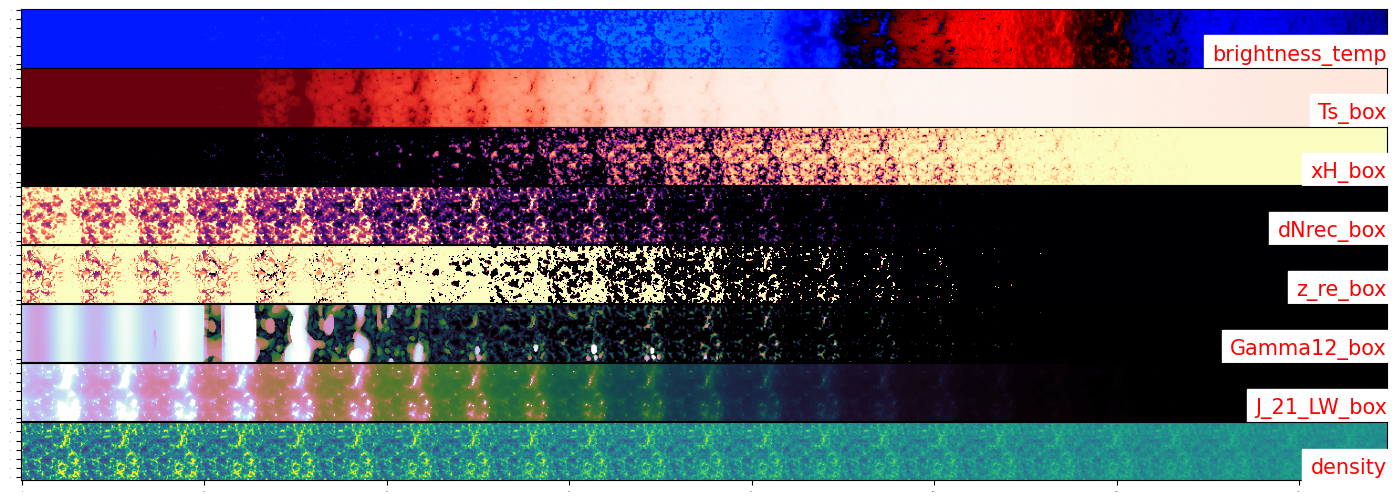

In [10]:
# the lightcones we want to plot later together with their color maps and min/max
lightcone_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'z_re_box','Gamma12_box','J_21_LW_box',"density")
cmaps = [EoR_colour,'Reds','magma','magma','magma','cubehelix','cubehelix','viridis']
vmins = [-300, 1e1, 0, 0, 5, 0, 0, -1]
vmaxs = [  30, 1e3, 1, 2, 9, 1,10,  1]

# set necessary flags for using minihalos and astro parameter
astro_params_fid = {'ALPHA_ESC': 0.0, 
                    'F_ESC10': -1.222, 
                    'F_ESC7_MINI': -1.5, # mini halo ( -2.5,-1.5)
                    'ALPHA_STAR': 0.5,
                    'F_STAR10': -1.25, 
                    'F_STAR7_MINI': -1.5,   #mini halo  por ejemplo, −1.75 o −2.0 menor efifiencia, y −1.25 o −1.5 mayor eficiencia
                    'L_X': 40.5, 
                    'L_X_MINI': 40.5,    # mini halo
                    'NU_X_THRESH': 500.0, 
                    'F_H2_SHIELD': 0.0}  # mini halo


flag_options_fid = {"INHOMO_RECO":True, 'USE_MASS_DEPENDENT_ZETA':True, 'USE_TS_FLUCT':True, 'USE_MINI_HALOS':True}


# lightcone

lightcone_fid = p21c.run_lightcone(
        redshift = 5.5,
        init_box = initial_conditions,
        flag_options = flag_options_fid,
        astro_params = astro_params_fid,
        lightcone_quantities=lightcone_quantities,
        global_quantities=lightcone_quantities,
        random_seed = random_seed,
        direc = output_dir
)

fig, axs = plt.subplots(len(lightcone_quantities),1,
            figsize=(getattr(lightcone_fid, lightcone_quantities[0]).shape[2]*0.01,
                     getattr(lightcone_fid, lightcone_quantities[0]).shape[1]*0.01*len(lightcone_quantities)))
for ii, lightcone_quantity in enumerate(lightcone_quantities):
    axs[ii].imshow(getattr(lightcone_fid, lightcone_quantity)[1],
                   vmin=vmins[ii], vmax=vmaxs[ii],cmap=cmaps[ii])
    axs[ii].text(1, 0.05, lightcone_quantity,horizontalalignment='right',verticalalignment='bottom',
            transform=axs[ii].transAxes,color = 'red',backgroundcolor='white',fontsize = 15)
    axs[ii].xaxis.set_tick_params(labelsize=0)
    axs[ii].yaxis.set_tick_params(labelsize=0)
plt.tight_layout()
fig.subplots_adjust(hspace = 0.01)

plt.savefig('LC.jpg', dpi=300, bbox_inches='tight')

 # varying parameters

let's vary paremeters that describe mini-halos and see the impact to the global signal

We keep other parameters fixed and vary one of following  by a factor of 0.1, 0.5, 2 and 10:

    pow(10, "F_STAR7_MINI")
    pow(10, "F_ESC7_MINI")
    pow(10, "L_X_MINI")
    1 - "F_H2_SHIELD"
    
We also have a NOmini model where mini-halos are not included

In [11]:
#defining those color, linstyle, blabla
linestyles = ['-', '-',':','-.','-.',':']
colors     = ['gray','black','#e41a1c','#377eb8','#e41a1c','#377eb8']
lws        = [1,3,2,2,2,2]

textss   = ['varying '+r'$f_{*,7}^{\rm mol}$',\
            'varying '+r'$f_{\rm esc}^{\rm mol}$',\
            'varying '+r'$L_{\rm x}^{\rm mol}$',\
            'varying '+r'$1-f_{\rm H_2}^{\rm shield}$']
factorss = [[0, 1, 0.5, 1, 5, 10],] * len(textss)
labelss  = [['NOmini', 'reference', 'x0.5', 'x1', 'x5', 'x10'],] * len(textss)

Note that I've run these simulations in parallel before this tutorial. With these setup, each took ~6h to finish. Here, running means read the cached outputs.

## global properties

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWa

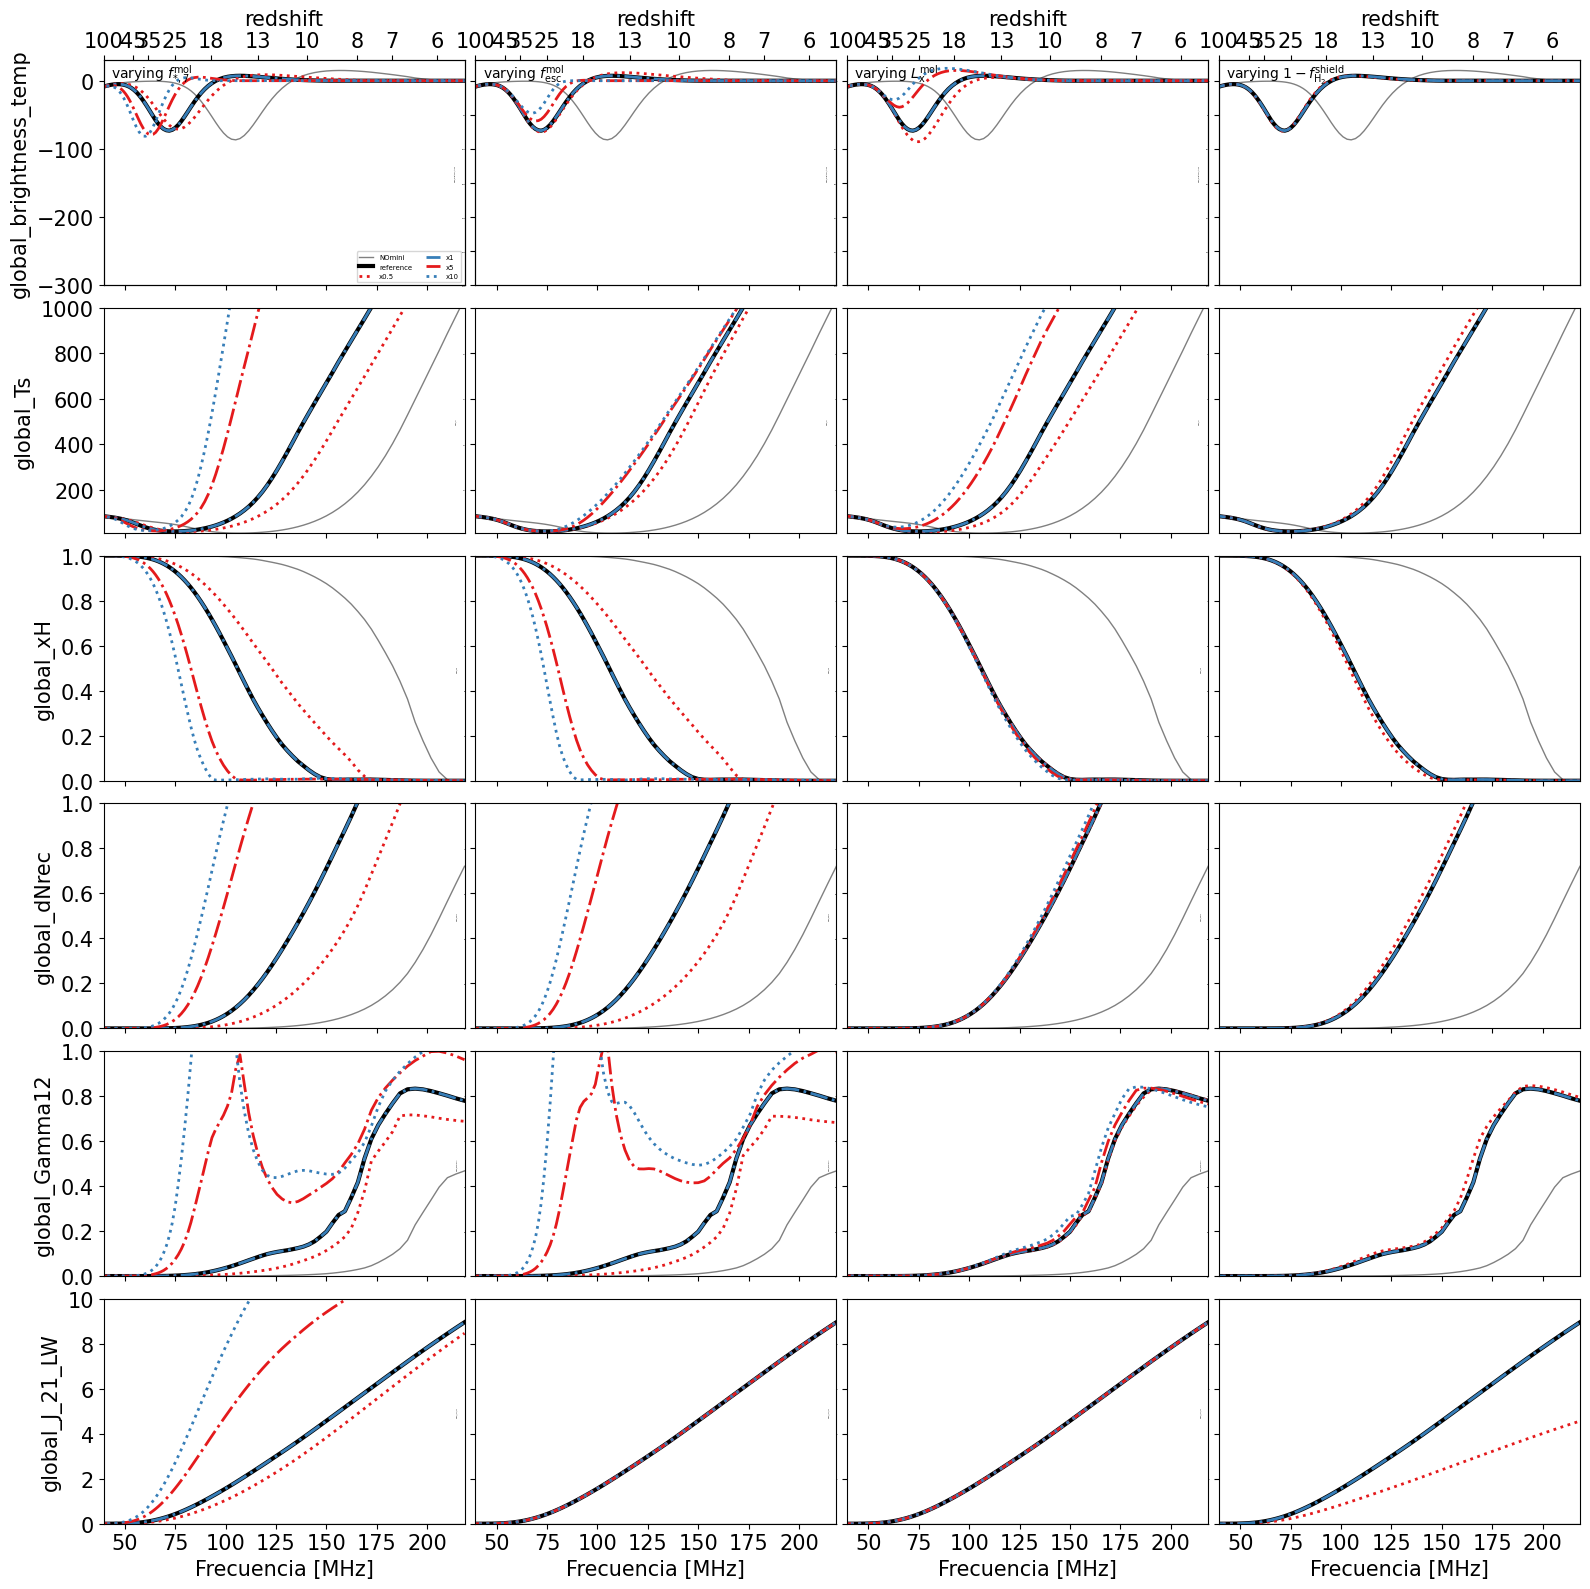

In [12]:
global_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'z_re_box','Gamma12_box','J_21_LW_box',"density")
#choose some to plot...
plot_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'Gamma12_box','J_21_LW_box')
ymins = [-300, 1e1, 0, 0, 0, 0]
ymaxs = [  30, 1e3, 1, 1, 1,10]

fig, axss = plt.subplots(len(plot_quantities), len(labelss),
                         sharex=True,  figsize=(4*len(labelss),2*len(global_quantities)))

for pp, texts in enumerate(textss):
    labels  = labelss[pp]
    factors = factorss[pp] 
    axs     = axss[:,pp]
    for kk, label in enumerate(labels):
        flag_options = flag_options_fid.copy()
        astro_params = astro_params_fid.copy()
        factor = factors[kk]
        if label == 'NOmini':
            flag_options.update({'USE_MINI_HALOS': False})
        else:
            flag_options.update({'USE_MINI_HALOS': True})
            if pp == 0:
                astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI']+np.log10(factor)})
            elif pp == 1:
                astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI']+np.log10(factor)})
            elif pp == 2:
                astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI']+np.log10(factor)})
            else:
                if factor > 1: continue # can't do negative F_H2_SHIELD
                astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})
        if label == 'reference':
            lightcone = lightcone_fid
        else:
            lightcone = p21c.run_lightcone(
                redshift = 5.5,
                init_box = initial_conditions,
                flag_options = flag_options,
                astro_params = astro_params,
                global_quantities=global_quantities,
                random_seed = random_seed,
                direc = output_dir
            )

        freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
        for jj, global_quantity in enumerate(plot_quantities):
            axs[jj].plot(freqs, getattr(lightcone, 'global_%s'%global_quantity.replace('_box','')),
                         color=colors[kk],linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])
            
    axs[0].text(0.02, 0.99, texts,horizontalalignment='left',verticalalignment='top',
                        transform=axs[0].transAxes,fontsize = 10)
    for jj, global_quantity in enumerate(plot_quantities):
        axs[jj].set_ylim(ymins[jj], ymaxs[jj])
    axs[-1].set_xlabel('Frecuencia [MHz]',fontsize=15)
    axs[-1].xaxis.set_tick_params(labelsize=15)

    axs[0].set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
    zlabels = np.array([ 6,  7,  8,  10, 13, 18, 25, 35])
    ax2 = axs[0].twiny()
    ax2.set_xlim(axs[0].get_xlim())
    ax2.set_xticks(1420.4 / (zlabels + 1.)) 
    ax2.set_xticklabels([str(label) for label in zlabels])
    ax2.set_xlabel("redshift",fontsize=15)
    ax2.xaxis.set_tick_params(labelsize=15)
    ax2.grid(False)
    
    if pp == 0:
        axs[0].legend(loc='lower right', ncol=2,fontsize=5,fancybox=True,frameon=True)
        for jj, global_quantity in enumerate(plot_quantities):
            axs[jj].set_ylabel('global_%s'%global_quantity.replace('_box',''),fontsize=15)
            axs[jj].yaxis.set_tick_params(labelsize=15)
    else:
        for jj, global_quantity in enumerate(plot_quantities):
            axs[jj].set_ylabel('global_%s'%global_quantity.replace('_box',''),fontsize=0)
            axs[jj].yaxis.set_tick_params(labelsize=0)

plt.tight_layout()


fig.subplots_adjust(hspace = 0.1,wspace=0.03)
plt.savefig('Parametros.jpg', dpi=300, bbox_inches='tight')



In [ ]:
lightcone

# CADA plot por separado

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

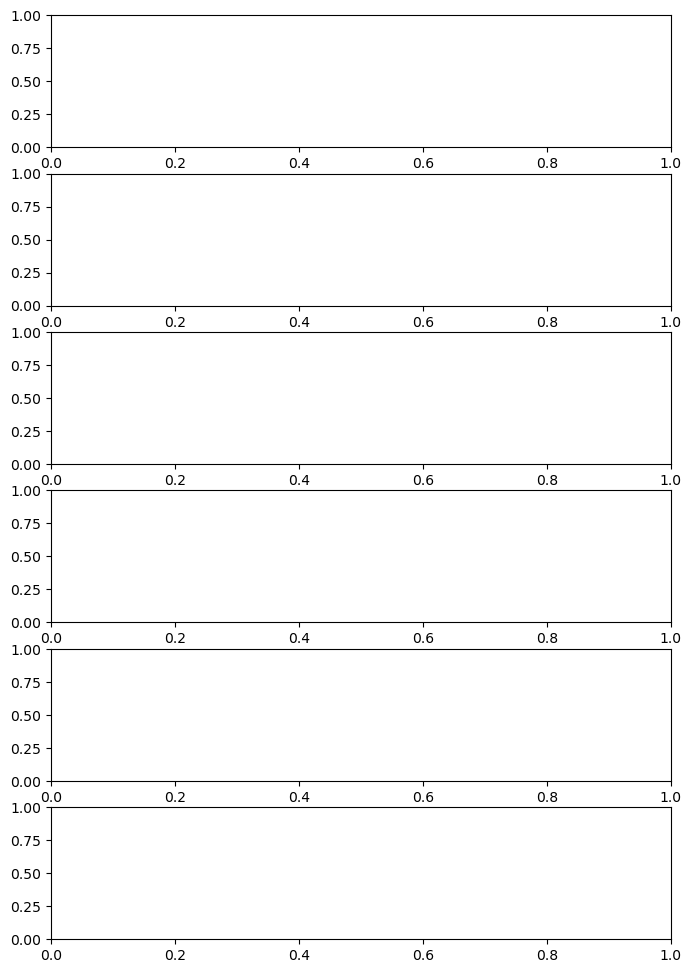

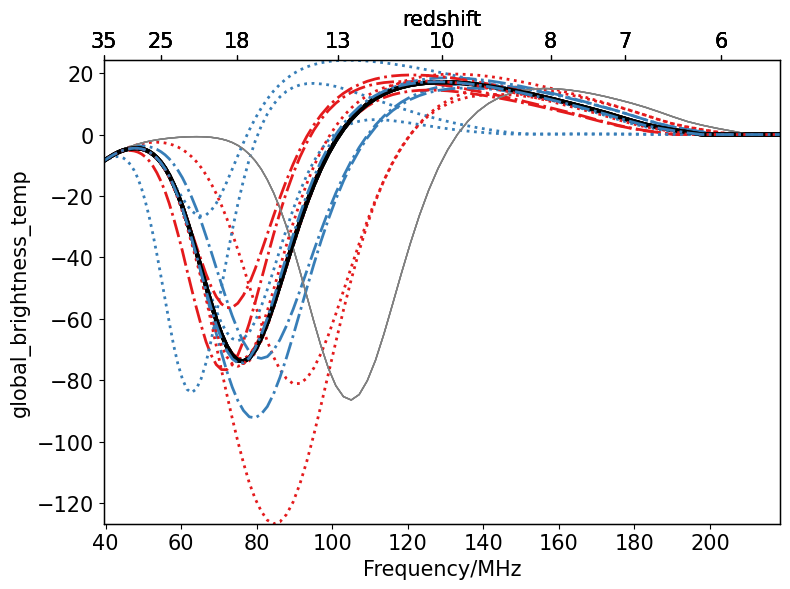

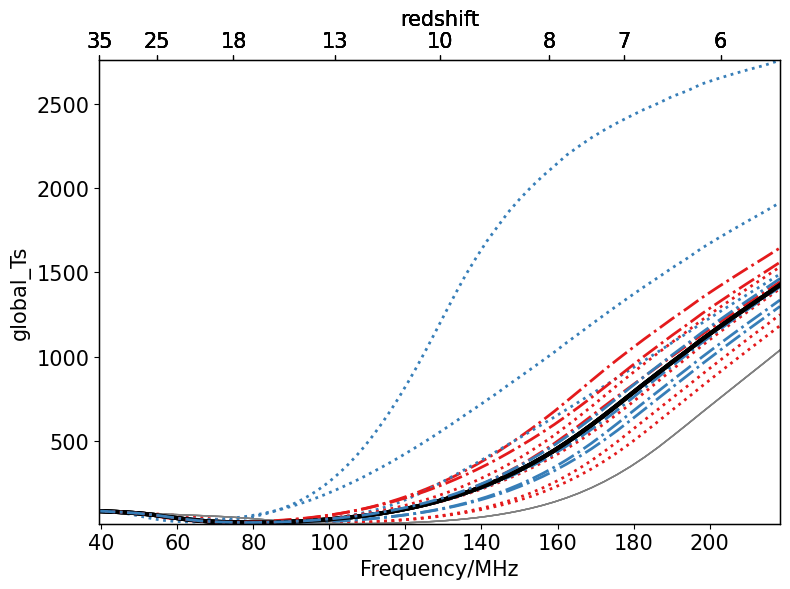

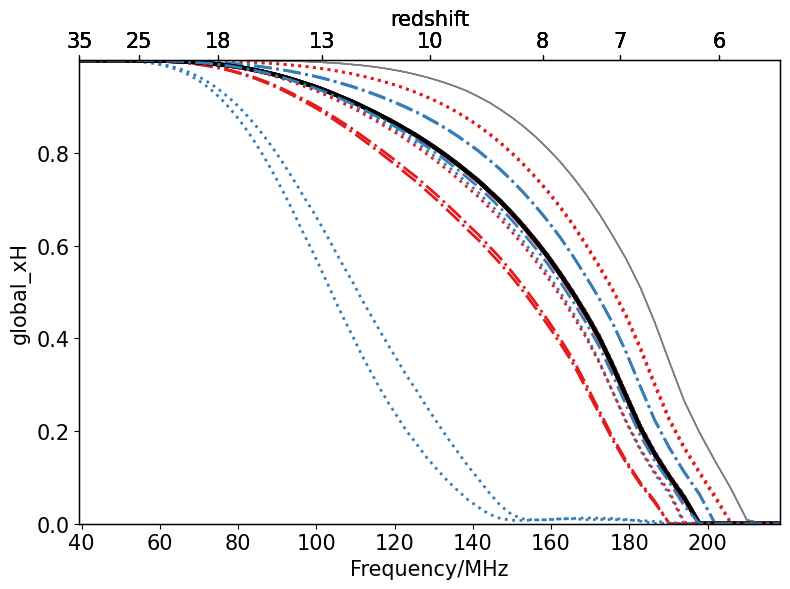

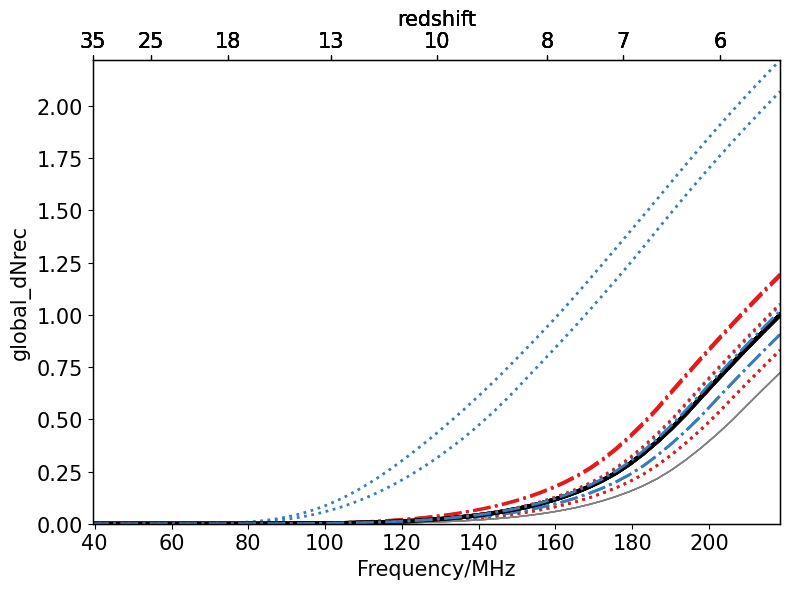

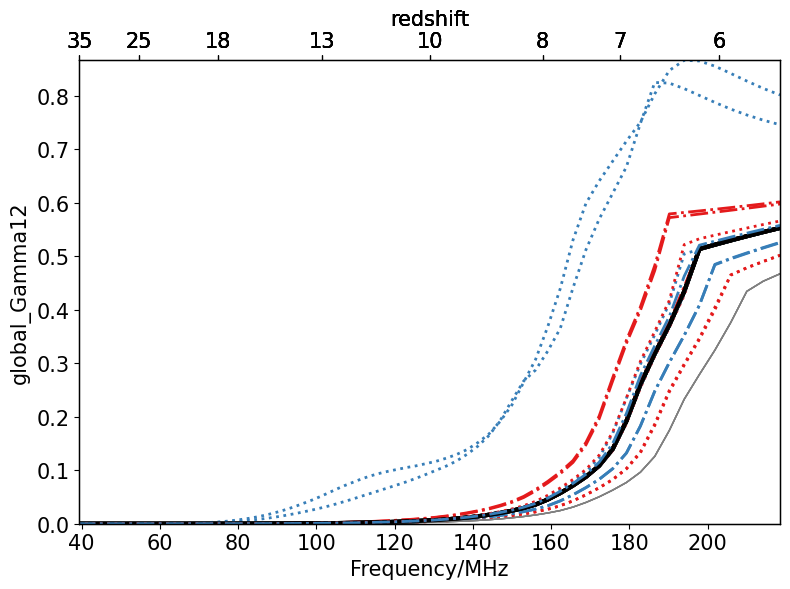

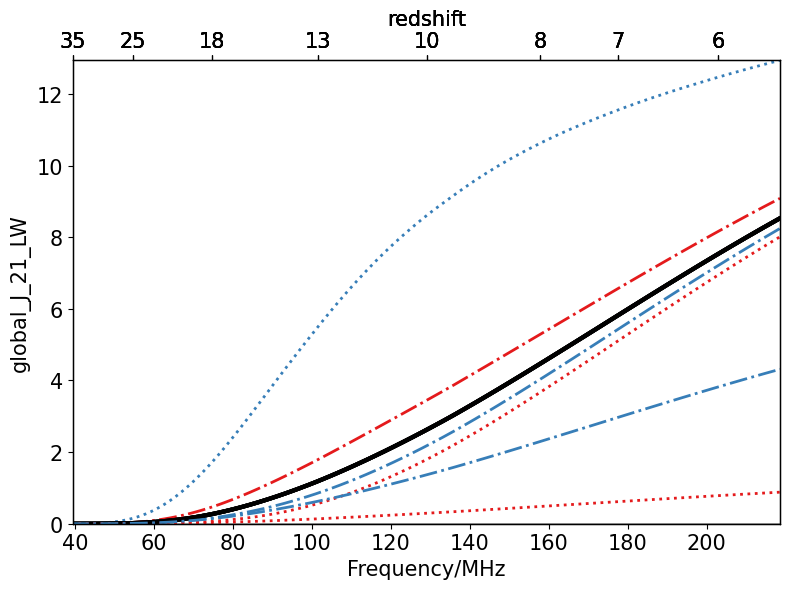

In [15]:
import matplotlib.pyplot as plt
import numpy as np

global_quantities = ('brightness_temp', 'Ts_box', 'xH_box', "dNrec_box", 'Gamma12_box', 'J_21_LW_box', "density")
plot_quantities = ('brightness_temp', 'Ts_box', 'xH_box', "dNrec_box", 'Gamma12_box', 'J_21_LW_box')
ymins = [-120, 1e1, 0, 0, 0, 0]
ymaxs = [30, 1e3, 1, 1, 1, 10]

fig, axss = plt.subplots(len(plot_quantities), 1, figsize=(8, 2*len(plot_quantities)))

for jj, global_quantity in enumerate(plot_quantities):
    fig, axs = plt.subplots(1, 1, figsize=(8, 6))
    min_y = float('inf')
    max_y = float('-inf')
    for pp, texts in enumerate(textss):
        labels = labelss[pp]
        factors = factorss[pp]
        for kk, label in enumerate(labels):
            flag_options = flag_options_fid.copy()
            astro_params = astro_params_fid.copy()
            factor = factors[kk]
            if label == 'NOmini':
                flag_options.update({'USE_MINI_HALOS': False})
            else:
                flag_options.update({'USE_MINI_HALOS': True})
                if pp == 0:
                    astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})
                elif pp == 1:
                    astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI'] + np.log10(factor)})
                elif pp == 2:
                    astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI'] + np.log10(factor)})
                else:
                    if factor > 1: continue
                    astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})
            if label == 'reference':
                lightcone = lightcone_fid
            else:
                lightcone = p21c.run_lightcone(
                    redshift=5.5,
                    init_box=initial_conditions,
                    flag_options=flag_options,
                    astro_params=astro_params,
                    global_quantities=global_quantities,
                    random_seed=random_seed,
                    direc=output_dir
                )
            freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
            axs.plot(freqs, getattr(lightcone, 'global_%s' % global_quantity.replace('_box', '')),
                     color=colors[kk], linestyle=linestyles[kk], label=labels[kk], lw=lws[kk])
            # Calcula los valores mínimos y máximos de los datos ploteados
            min_y_temp = np.min(getattr(lightcone, 'global_%s' % global_quantity.replace('_box', '')))
            max_y_temp = np.max(getattr(lightcone, 'global_%s' % global_quantity.replace('_box', '')))
            # Actualiza los valores mínimos y máximos si es necesario
            min_y = min(min_y, min_y_temp)
            max_y = max(max_y, max_y_temp)
        #axs.text(0.9, 0.5, texts, horizontalalignment='left', verticalalignment='top',
        #         transform=axs.transAxes, fontsize=13)
        axs.set_ylim(min_y, max_y)  
        axs.set_xlabel('Frecuencia [MHz]', fontsize=15)
        axs.set_ylabel('global_%s' % global_quantity.replace('_box', ''), fontsize=15)
        axs.xaxis.set_tick_params(labelsize=15)
        axs.yaxis.set_tick_params(labelsize=15)  
        axs.set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
        zlabels = np.array([6, 7, 8, 10, 13, 18, 25, 35])
        ax2 = axs.twiny()
        ax2.set_xlim(axs.get_xlim())
        ax2.set_xticks(1420.4 / (zlabels + 1.))
        ax2.set_xticklabels([str(label) for label in zlabels])
        ax2.set_xlabel("redshift", fontsize=15)
        ax2.xaxis.set_tick_params(labelsize=15)
        ax2.grid(False)
        #if pp == 0:
        #    axs.legend(loc='lower right', ncol=2, fontsize=13, fancybox=True, frameon=True)
    plt.tight_layout()
    plt.savefig(f'{global_quantity}_plot.jpg', dpi=300, bbox_inches='tight')

plt.show()


# ESTE CODIGO NOS DA POTS POR PLOTS (color rojo)
## o sea, de cada ajuste


In [16]:

import matplotlib.pyplot as plt
import numpy as np
import os

# Define las cantidades globales y las cantidades a graficar
global_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'z_re_box','Gamma12_box','J_21_LW_box',"density")

plot_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'Gamma12_box','J_21_LW_box')
#plot_quantities = 'brightness_temp'


ymins = [-120, 1e1, 0, 0, 0, 0]
ymaxs = [  30, 1e3, 1, 1, 1,10]

# Crea una carpeta para los plots si no existe
output_folder = "plots"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Itera sobre las etiquetas, factores y textos
for pp, texts in enumerate(textss):
    labels  = labelss[pp]
    factors = factorss[pp]
    for kk, label in enumerate(labels):
        flag_options = flag_options_fid.copy()
        astro_params = astro_params_fid.copy()
        factor = factors[kk]
        if label == 'NOmini':
            flag_options.update({'USE_MINI_HALOS': False})
        else:
            flag_options.update({'USE_MINI_HALOS': True})
            if pp == 0:
                astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI']+np.log10(factor)})
            elif pp == 1:
                astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI']+np.log10(factor)})
            elif pp == 2:
                astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI']+np.log10(factor)})
            else:
                if factor > 1: continue # no se puede hacer F_H2_SHIELD negativo
                astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})
        if label == 'reference':
            lightcone = lightcone_fid
        else:
            lightcone = p21c.run_lightcone(
                redshift = 5.5,
                init_box = initial_conditions,
                flag_options = flag_options,
                astro_params = astro_params,
                global_quantities=global_quantities,
                random_seed = random_seed,
                direc = output_dir
            )

        freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
        for jj, global_quantity in enumerate(plot_quantities):
            plt.figure()
            plt.plot(freqs, getattr(lightcone, 'global_%s'%global_quantity.replace('_box','')),
                     color='r', linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])
            plt.xlabel('Frecuencia [MHz]',fontsize=15)
            plt.ylabel('global_%s'%global_quantity.replace('_box',''),fontsize=15)
            plt.ylim(ymins[jj], ymaxs[jj])
            plt.xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
            plt.title(texts, fontsize=15)
            zlabels = np.array([ 6,  7,  8,  10, 13, 18, 25, 35])
            ax2 = plt.twiny()
            ax2.set_xlim(plt.xlim())
            ax2.set_xticks(1420.4 / (zlabels + 1.))
            ax2.set_xticklabels([str(label) for label in zlabels])
            ax2.set_xlabel("redshift",fontsize=15)
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
            plt.grid(True)
            plt.legend(loc='lower left', ncol=2,fontsize=8,fancybox=True,frameon=True)
            plt.tight_layout()
            plt.savefig(os.path.join(output_folder, '{}_{}_{}.jpg'.format(label, pp, jj)), dpi=300, bbox_inches='tight')
            plt.close()


/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

# Temperatura de brillo con mini Halos y sin mini Halos

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWa

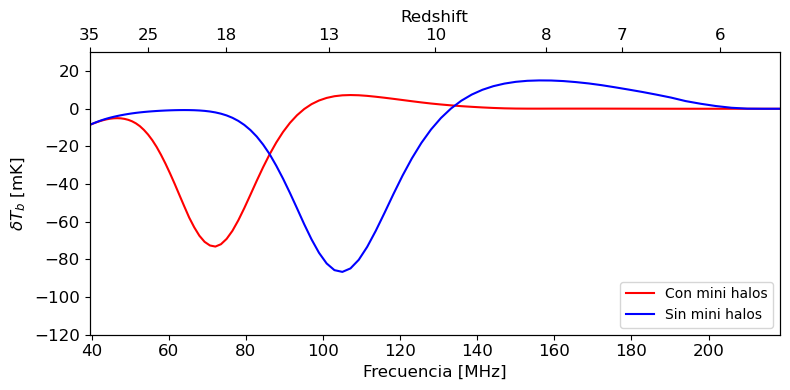

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c

# Definir las cantidades globales y las cantidades a trazar
global_quantities = ('brightness_temp', 'Ts_box', 'xH_box', "dNrec_box", 'z_re_box', 'Gamma12_box', 'J_21_LW_box', "density")
plot_quantities = ('brightness_temp',)

# Parámetros específicos para cada caso (con y sin mini halos)
flag_options_with_minihalos = flag_options_fid.copy()
flag_options_without_minihalos = flag_options_fid.copy()
flag_options_without_minihalos.update({'USE_MINI_HALOS': False})

# Definir límites de los ejes y el tamaño de la figura
ymins = [-120]
ymaxs = [30]
figsize = (8, 4)

# Crear la figura y los subplots
fig, axs = plt.subplots(len(plot_quantities), 1, figsize=figsize, sharex=True)

for pp, texts in enumerate(['Brightness Temperature']):
    axs.set_ylim(ymins[pp], ymaxs[pp])
    axs.set_xlabel('Frecuencia [MHz]', fontsize=12)
    axs.xaxis.set_tick_params(labelsize=12)
    axs.set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
    #axs.set_ylabel('Global Brightness Temp', fontsize=12)
    axs.set_ylabel('$\delta T_{b} $ [mK] ', fontsize=12)
    axs.yaxis.set_tick_params(labelsize=12)

    # Ejecutar la simulación con mini halos
    lightcone_with_minihalos = p21c.run_lightcone(
        redshift=5.5,
        init_box=initial_conditions,
        flag_options=flag_options_with_minihalos,
        astro_params=astro_params_fid,
        global_quantities=global_quantities,
        random_seed=random_seed,
        direc=output_dir
    )

    # Ejecutar la simulación sin mini halos
    lightcone_without_minihalos = p21c.run_lightcone(
        redshift=5.5,
        init_box=initial_conditions,
        flag_options=flag_options_without_minihalos,
        astro_params=astro_params_fid,
        global_quantities=global_quantities,
        random_seed=random_seed,
        direc=output_dir
    )

    freqs_with_minihalos = 1420.4 / (np.array(lightcone_with_minihalos.node_redshifts) + 1.)
    freqs_without_minihalos = 1420.4 / (np.array(lightcone_without_minihalos.node_redshifts) + 1.)

    axs.plot(freqs_with_minihalos, getattr(lightcone_with_minihalos, 'global_brightness_temp'), label='Con mini halos', color='r', linestyle='-')
    axs.plot(freqs_without_minihalos, getattr(lightcone_without_minihalos, 'global_brightness_temp'), label='Sin mini halos', color='b', linestyle='-')

    #axs.text(0.01, 0.99, texts, horizontalalignment='left', verticalalignment='top',
    #          transform=axs.transAxes, fontsize=12)

    zlabels = np.array([6, 7, 8, 10, 13, 18, 25, 35])
    ax2 = axs.twiny()
    ax2.set_xlim(axs.get_xlim())
    ax2.set_xticks(1420.4 / (zlabels + 1.))
    #ax2.set_xticklabels(zlabels.astype(np.str))
    ax2.set_xticklabels([str(label) for label in zlabels])
    ax2.set_xlabel("Redshift", fontsize=12)
    ax2.xaxis.set_tick_params(labelsize=12)
    ax2.grid(False)

    axs.legend(loc='lower right', fontsize=10)

plt.tight_layout()

# Guardar 
plt.savefig('Temperatura_de_brillo_con_vs_sin_minihalos.jpg', dpi=300, bbox_inches='tight')

plt.show()


In [14]:
print(freqs_with_minihalos)

[ 33.96893451  34.64831255  35.34127814  36.04810303  36.7690644
  37.50444499  38.25453318  39.01962311  39.80001483  40.59601437
  41.40793388  42.23609177  43.0808128   43.94242823  44.82127596
  45.71770062  46.63205376  47.56469395  48.51598692  49.48630573
  50.4760309   51.48555056  52.51526059  53.5655648   54.63687507
  55.72961153  56.8442027   57.98108567  59.14070628  60.32351927
  61.52998851  62.7605871   64.01579765  65.29611238  66.60203338
  67.93407278  69.29275294  70.67860668  72.09217746  73.53401964
  75.00469863  76.50479117  78.03488553  79.59558176  81.18749187
  82.81124016  84.46746339  86.15681104  87.87994562  89.63754286
  91.430292    93.2588961   95.12407224  97.02655187  98.96708106
 100.94642079 102.96534728 105.02465227 107.12514331 109.26764413
 111.45299493 113.6820527  115.95569159 118.27480321 120.64029702
 123.05310066 125.51416032 128.02444113 130.58492752 133.19662358
 135.86055351 138.57776198 141.34931458 144.17629818 147.05982139
 150.001015

In [15]:
lightcone_with_minihalos.global_brightness_temp

array([-1.49281816e+01, -1.40696039e+01, -1.31329412e+01, -1.22157774e+01,
       -1.13381882e+01, -1.05108519e+01, -9.73677635e+00, -9.01329708e+00,
       -8.33174896e+00, -7.68364525e+00, -7.06965542e+00, -6.50391245e+00,
       -6.00526524e+00, -5.58887100e+00, -5.26964569e+00, -5.06278706e+00,
       -4.99217749e+00, -5.08480406e+00, -5.37134457e+00, -5.86897755e+00,
       -6.64519310e+00, -7.75785208e+00, -9.25697422e+00, -1.12548580e+01,
       -1.36993504e+01, -1.66891479e+01, -2.02506790e+01, -2.44290237e+01,
       -2.91197090e+01, -3.42977295e+01, -3.98662338e+01, -4.57999344e+01,
       -5.17957840e+01, -5.77871399e+01, -6.29484253e+01, -6.74074478e+01,
       -7.06736603e+01, -7.26034317e+01, -7.31781769e+01, -7.19355392e+01,
       -6.91009979e+01, -6.48365860e+01, -5.92524529e+01, -5.27285728e+01,
       -4.56144714e+01, -3.82634583e+01, -3.10443707e+01, -2.41889610e+01,
       -1.79193134e+01, -1.23204212e+01, -7.48989773e+00, -3.44370770e+00,
       -1.43335581e-01,  

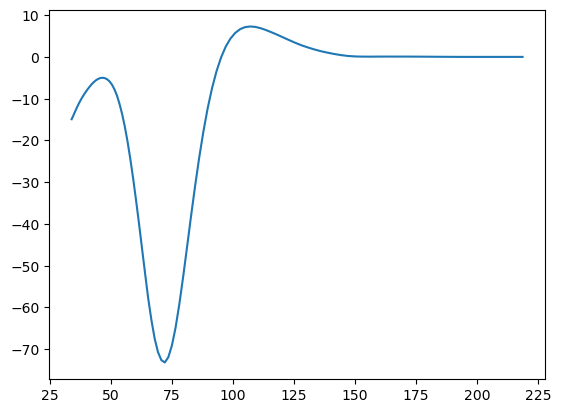

In [20]:
plt.plot(freqs_with_minihalos,lightcone_with_minihalos.global_brightness_temp)

figsize = (10, 4)

plt.show()

In [17]:
 zlabels

array([ 6,  7,  8, 10, 13, 18, 25, 35])

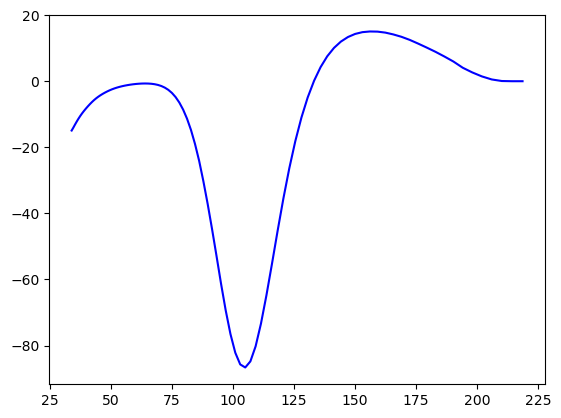

<Figure size 800x400 with 0 Axes>

In [18]:
    plt.plot(freqs_without_minihalos, getattr(lightcone_without_minihalos, 'global_brightness_temp'), label='Sin mini halos', color='b', linestyle='-')
    plt.figure(figsize=(8, 4)) 
    
    plt.show()

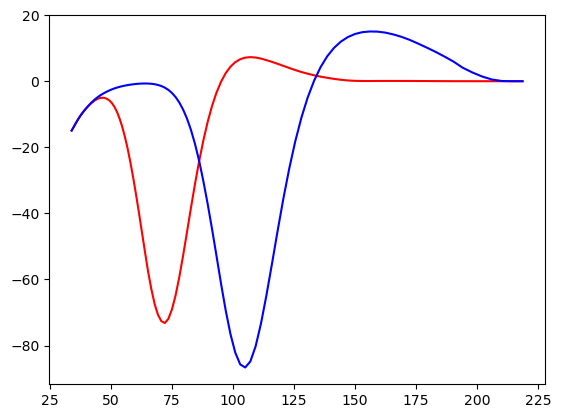

<Figure size 800x400 with 0 Axes>

In [19]:
    plt.plot(freqs_with_minihalos, getattr(lightcone_with_minihalos, 'global_brightness_temp'), label='Con mini halos', color='r', linestyle='-')  
    plt.plot(freqs_without_minihalos, getattr(lightcone_without_minihalos, 'global_brightness_temp'), label='Sin mini halos', color='b', linestyle='-')

    plt.figure(figsize=(8, 4)) 
    
    plt.show()

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

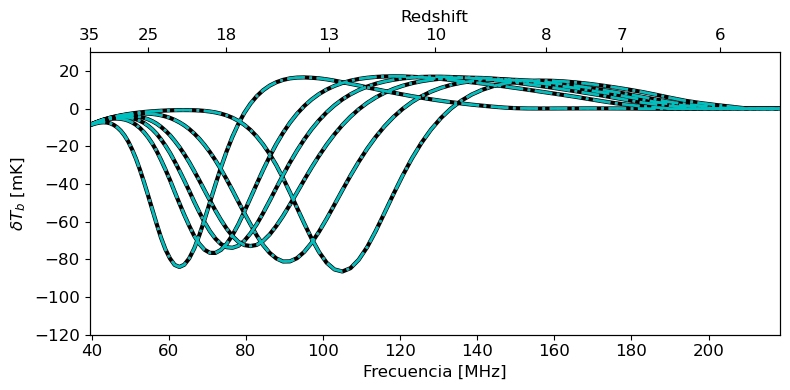

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c

# Definir las cantidades globales y las cantidades a trazar
global_quantities = ('brightness_temp', 'Ts_box', 'xH_box', "dNrec_box", 'z_re_box', 'Gamma12_box', 'J_21_LW_box', "density")
plot_quantities = ('brightness_temp',)

# Definir los ajustes de estilo
linestyles = ['-', '-', ':', '-.', '-.', ':']
colors = ['gray', 'black', 'r', 'c', 'magenta', 'cyan']

lws = [1, 3, 2, 2, 2, 2]

textss = ['varying '+r'$f_{*,7}^{\rm mol}$',\
          'varying '+r'$f_{\rm esc}^{\rm mol}$',\
          'varying '+r'$L_{\rm x}^{\rm mol}$',\
          'varying '+r'$1-f_{\rm H_2}^{\rm shield}$']
factorss = [[0, 1, 0.1, 0.5, 2, 10],] * len(textss)
labelss = [['NOmini', 'reference', 'x0.1', 'x0.5', 'x2', 'x10'],] * len(textss)

# Parámetros específicos para cada caso (con y sin mini halos)
flag_options_with_minihalos = flag_options_fid.copy()
flag_options_without_minihalos = flag_options_fid.copy()
flag_options_without_minihalos.update({'USE_MINI_HALOS': False})

# Definir límites de los ejes y el tamaño de la figura
ymins = [-120]
ymaxs = [30]
figsize = (8, 4)

# Crear la figura y los subplots
fig, axs = plt.subplots(len(plot_quantities), 1, figsize=figsize, sharex=True)

for pp, texts in enumerate(['Brightness Temperature']):
    axs.set_ylim(ymins[pp], ymaxs[pp])
    axs.set_xlabel('Frecuencia [MHz]', fontsize=12)
    axs.xaxis.set_tick_params(labelsize=12)
    axs.set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
    axs.set_ylabel('$\delta T_{b} $ [mK]', fontsize=12)
    axs.yaxis.set_tick_params(labelsize=12)

    for kk, labels in enumerate(labelss):
        factors = factorss[kk]
        astro_params = astro_params_fid.copy()

        for label, factor in zip(labels, factors):
            if label == 'NOmini':
                flag_options = flag_options_without_minihalos
            else:
                flag_options = flag_options_with_minihalos
                if pp == 0:
                    astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})
                elif pp == 1:
                    astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI'] + np.log10(factor)})
                elif pp == 2:
                    astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI'] + np.log10(factor)})
                else:
                    if factor > 1:
                        continue  # can't do negative F_H2_SHIELD
                    astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})

            lightcone = p21c.run_lightcone(
                redshift=5.5,
                init_box=initial_conditions,
                flag_options=flag_options,
                astro_params=astro_params,
                global_quantities=global_quantities,
                random_seed=random_seed,
                direc=output_dir
            )

            freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
            axs.plot(freqs, getattr(lightcone, 'global_brightness_temp'),
                     color=colors[kk], linestyle=linestyles[kk], label=label, lw=lws[kk])

    zlabels = np.array([6, 7, 8, 10, 13, 18, 25, 35])
    ax2 = axs.twiny()
    ax2.set_xlim(axs.get_xlim())
    ax2.set_xticks(1420.4 / (zlabels + 1.))
    ax2.set_xticklabels([str(label) for label in zlabels])
    ax2.set_xlabel("Redshift", fontsize=12)
    ax2.xaxis.set_tick_params(labelsize=12)
    ax2.grid(False)

    #axs.legend(loc='lower right', fontsize=10)

plt.tight_layout()

# Guardar 
plt.savefig('Temperatura_de_brillo_con_vs_sin_minihalos_con_ajustes.jpg', dpi=300, bbox_inches='tight')

plt.show()


/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

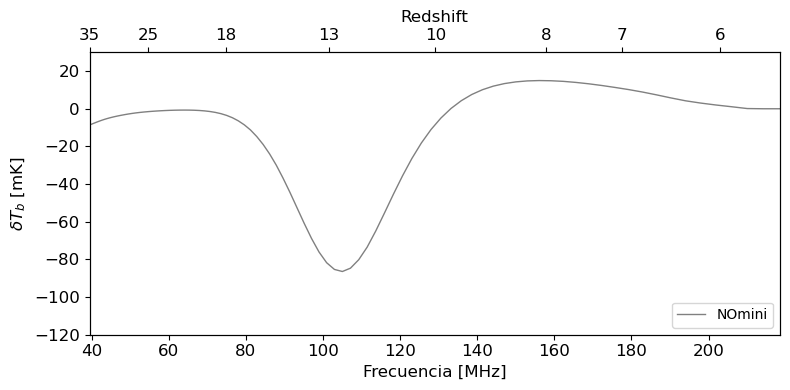

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

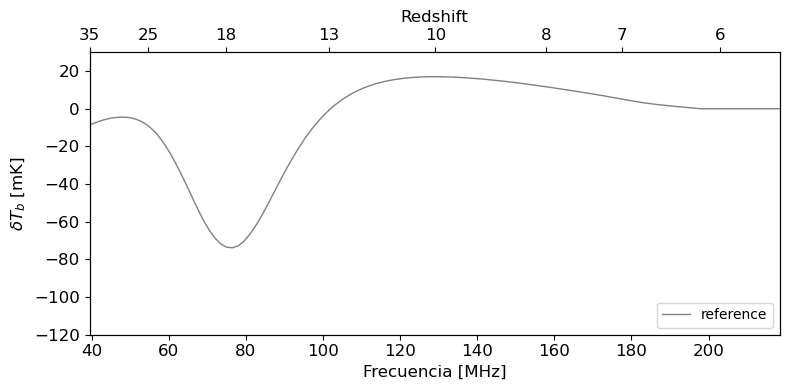

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

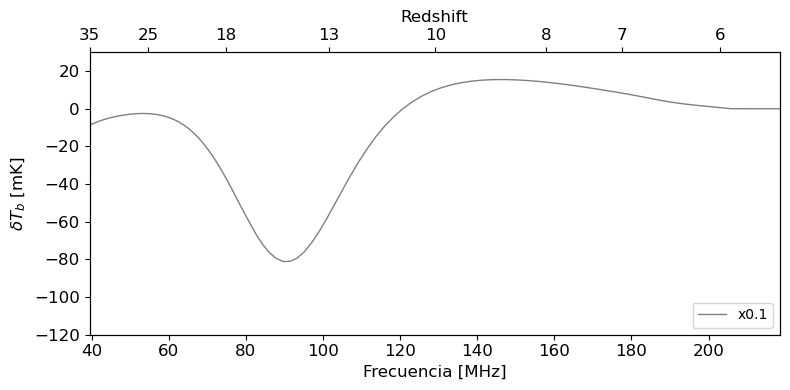

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

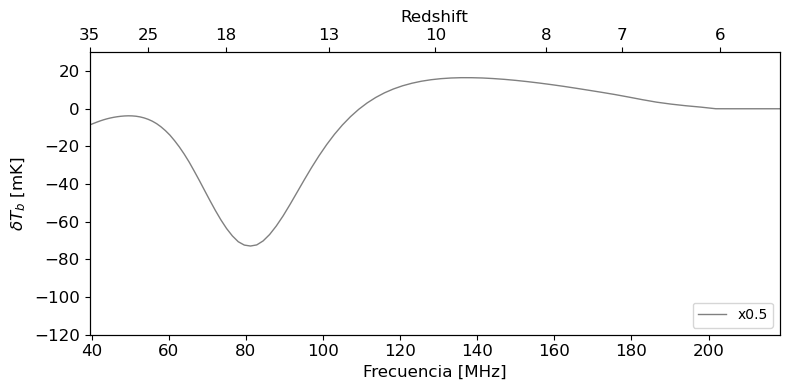

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

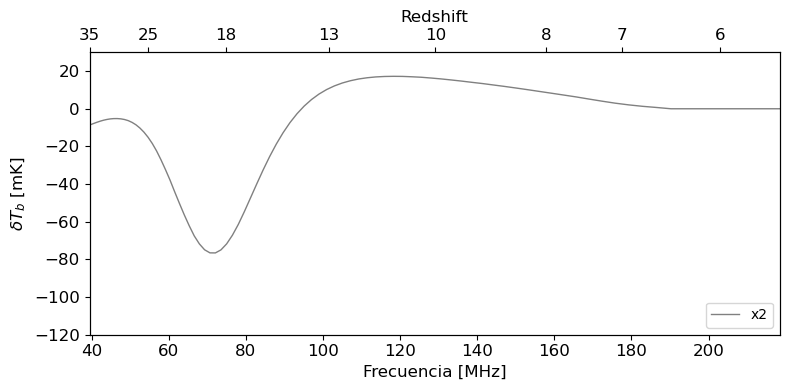

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

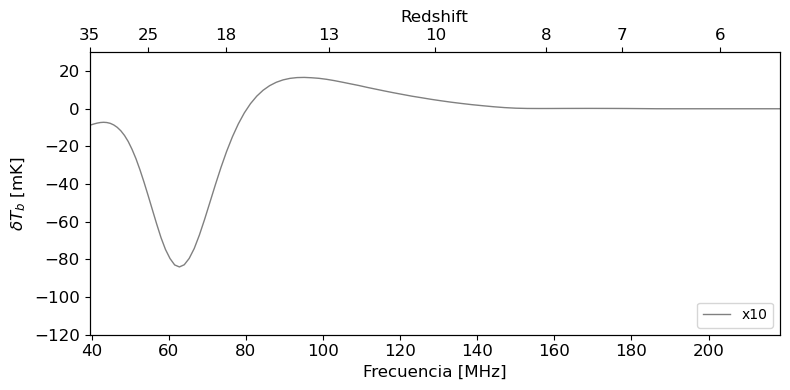

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

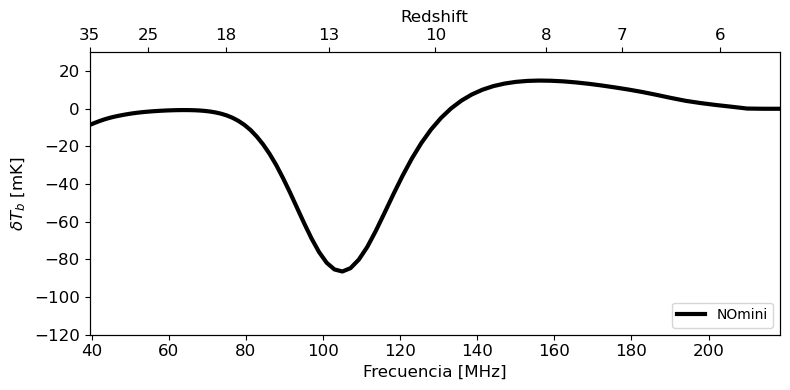

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

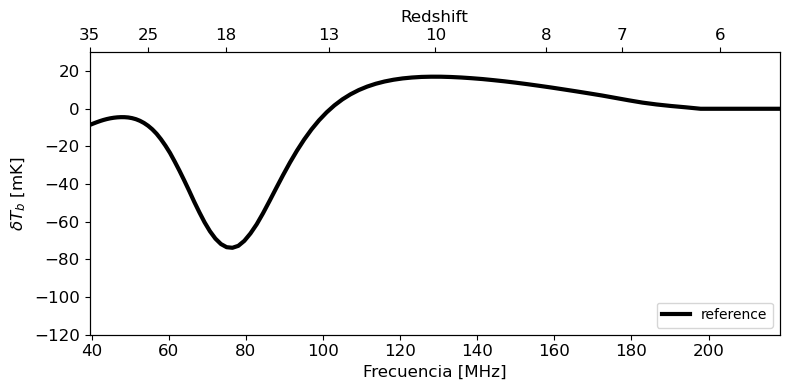

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

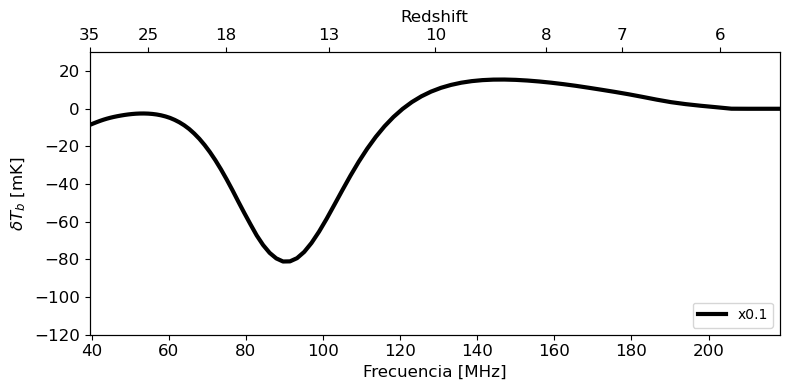

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

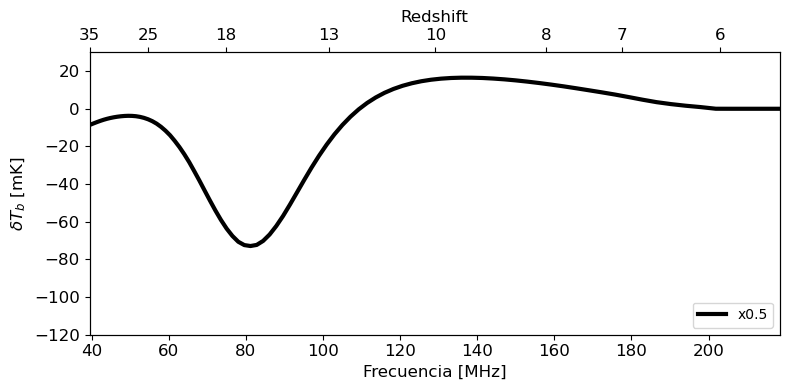

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

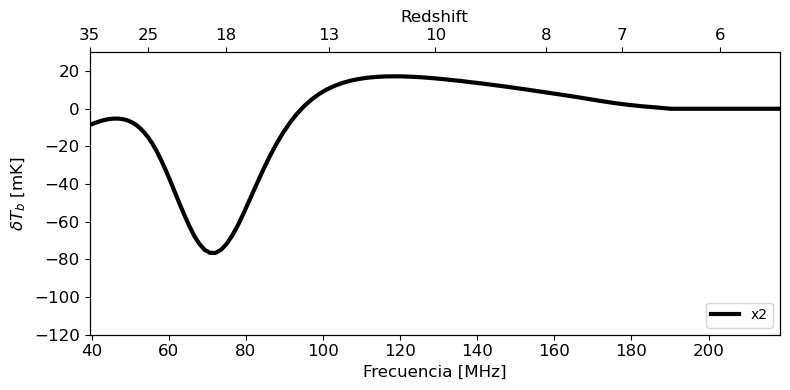

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

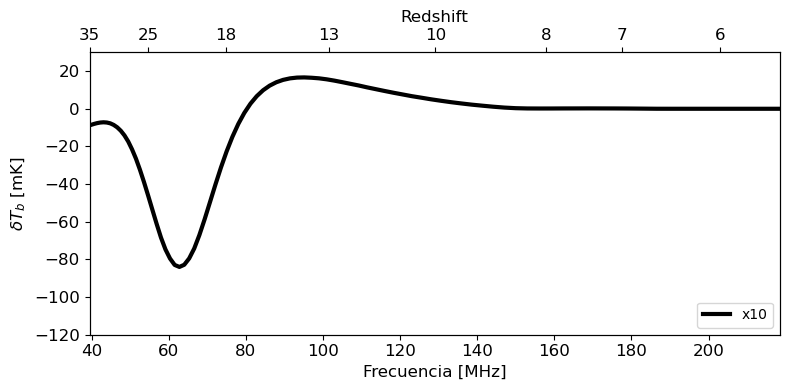

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

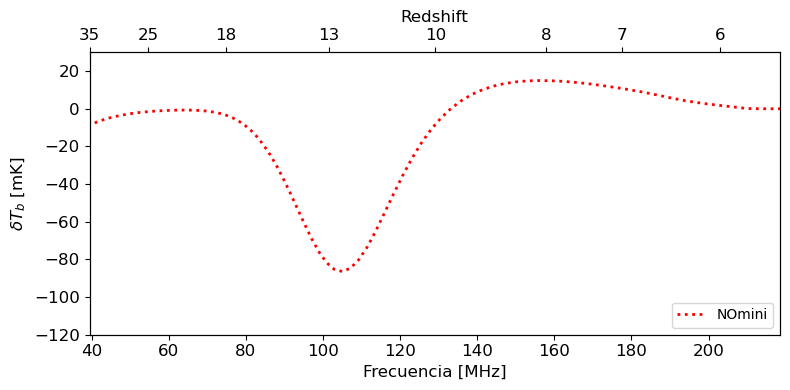

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

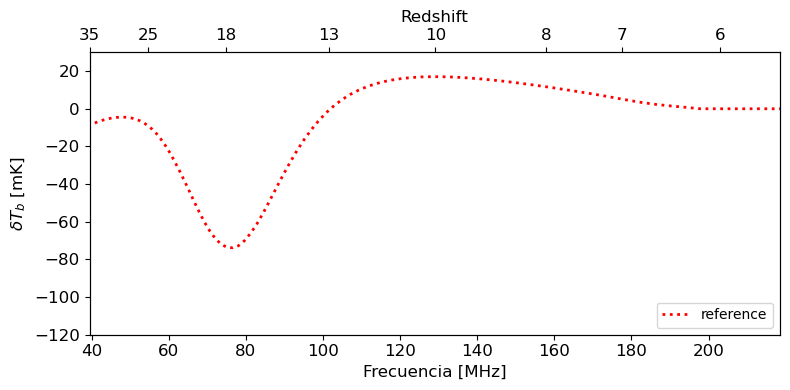

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

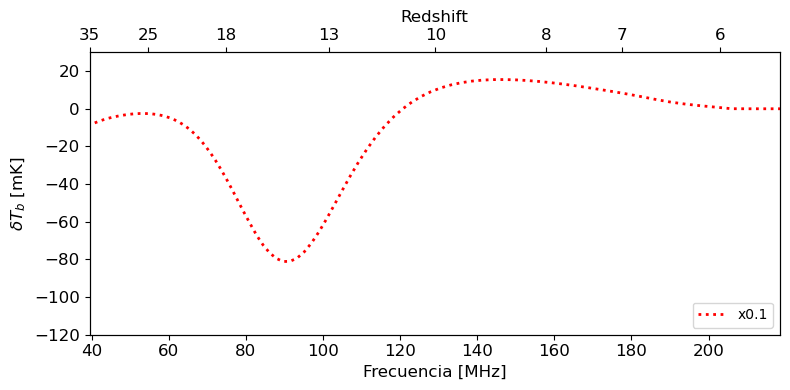

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

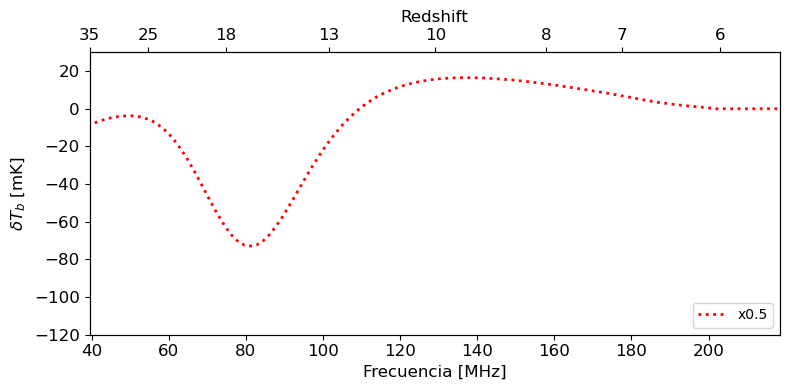

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

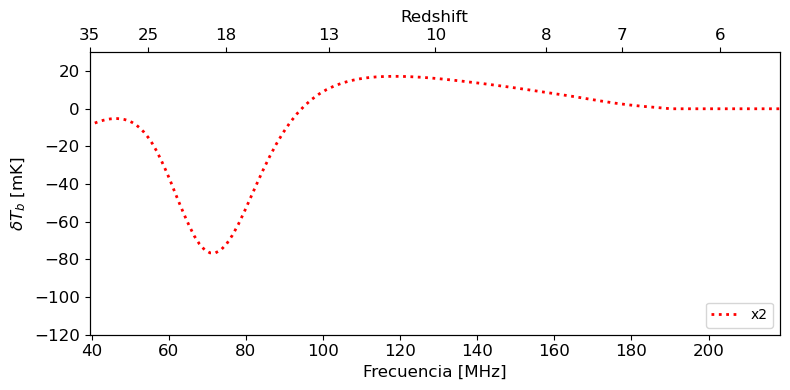

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

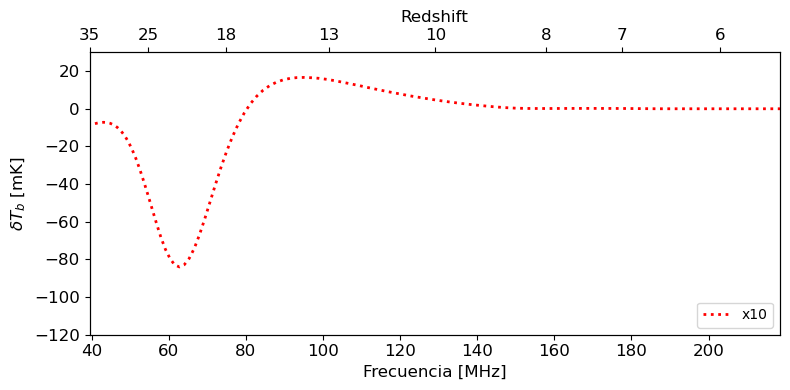

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

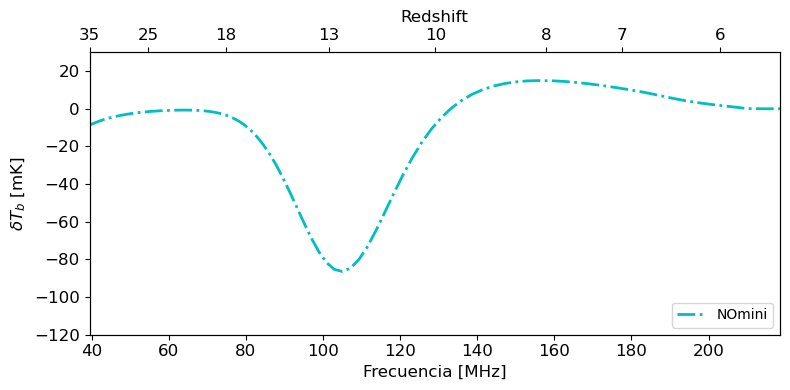

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

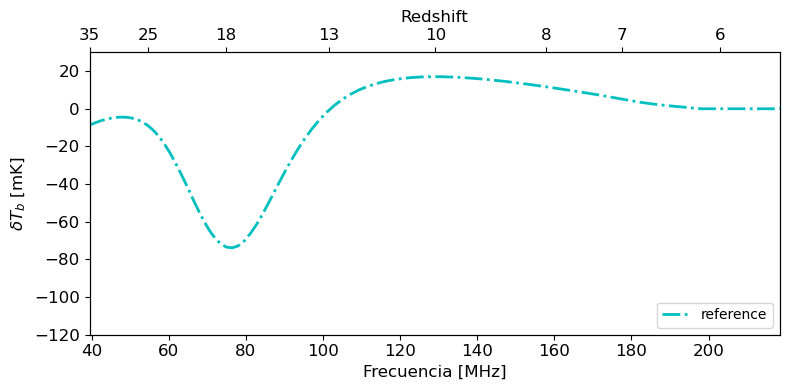

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

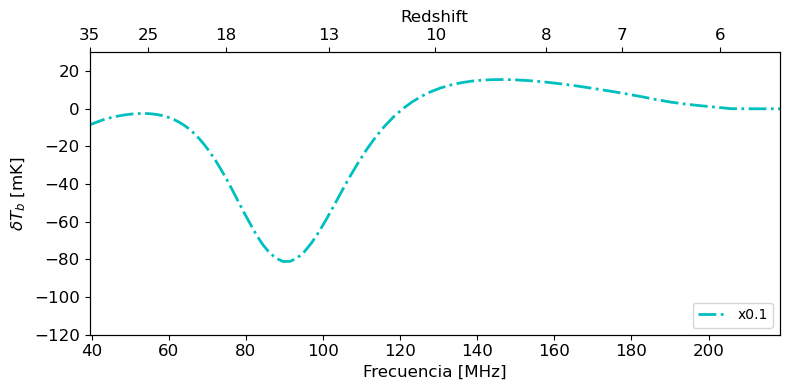

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

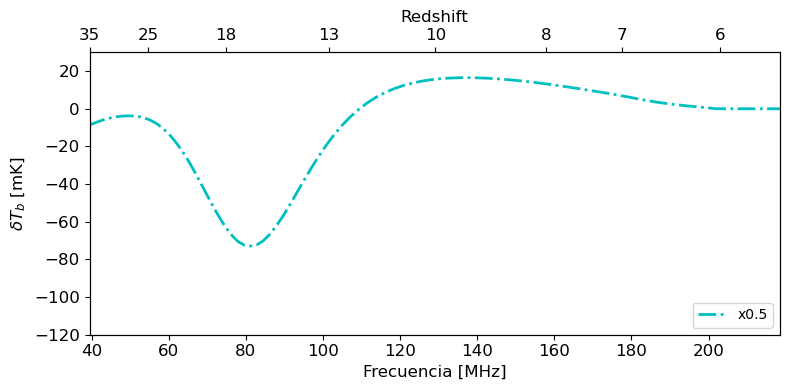

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

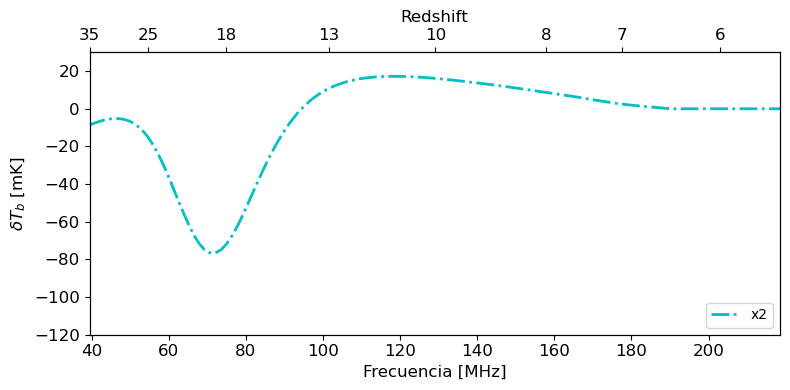

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

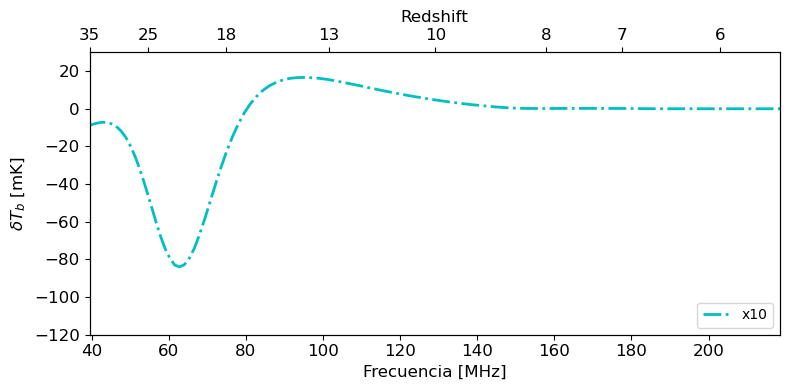

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c

# Definir los parámetros globales, ajustes de estilo, etc.

for kk, labels in enumerate(labelss):
    factors = factorss[kk]
    astro_params = astro_params_fid.copy()

    for label, factor in zip(labels, factors):
        fig, ax = plt.subplots(figsize=(8, 4))

        if label == 'NOmini':
            flag_options = flag_options_without_minihalos
        else:
            flag_options = flag_options_with_minihalos
            if pp == 0:
                astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})
            elif pp == 1:
                astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI'] + np.log10(factor)})
            elif pp == 2:
                astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI'] + np.log10(factor)})
            else:
                if factor > 1:
                    continue
                astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})

        lightcone = p21c.run_lightcone(
            redshift=5.5,
            init_box=initial_conditions,
            flag_options=flag_options,
            astro_params=astro_params,
            global_quantities=global_quantities,
            random_seed=random_seed,
            direc=output_dir
        )

        freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
        ax.plot(freqs, getattr(lightcone, 'global_brightness_temp'),
                color=colors[kk], linestyle=linestyles[kk], label=label, lw=lws[kk])

        ax.set_xlabel('Frecuencia [MHz]', fontsize=12)
        ax.set_ylabel('$\delta T_{b} $ [mK]', fontsize=12)
        ax.set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
        ax.set_ylim(ymins[0], ymaxs[0])  # Ajusta según el índice correspondiente
        ax.xaxis.set_tick_params(labelsize=12)
        ax.yaxis.set_tick_params(labelsize=12)

        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(1420.4 / (zlabels + 1.))
        ax2.set_xticklabels([str(label) for label in zlabels])
        ax2.set_xlabel("Redshift", fontsize=12)
        ax2.xaxis.set_tick_params(labelsize=12)
        ax2.grid(False)

        ax.legend(loc='lower right', fontsize=10)

        plt.tight_layout()

        # Guardar cada figura con un nombre de archivo único
        filename = f'Temperatura_de_brillo_{label}_con_ajustes.jpg'
        plt.savefig(filename, dpi=300, bbox_inches='tight')

        plt.show()


/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

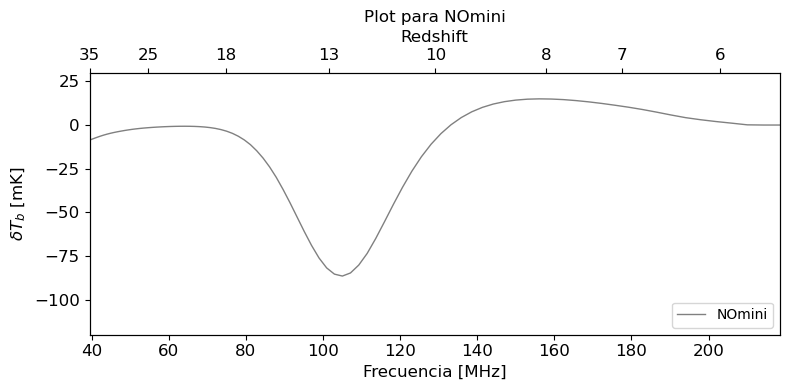

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

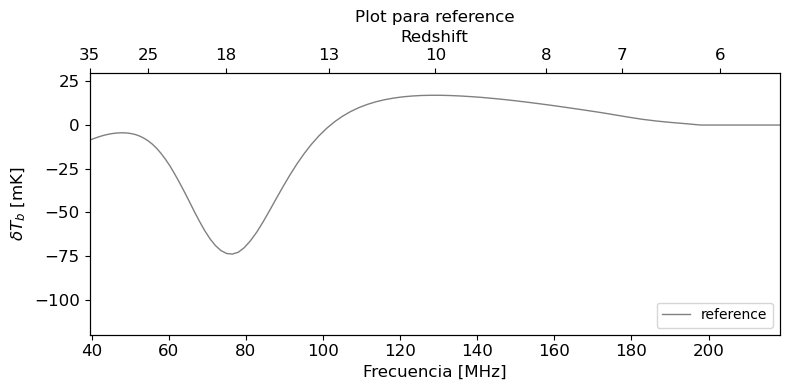

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

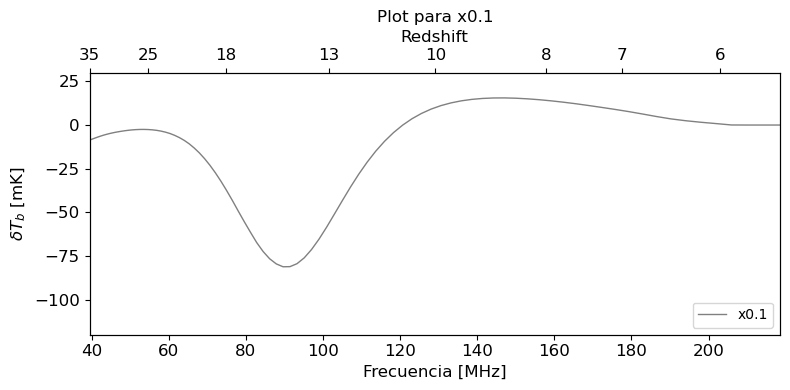

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

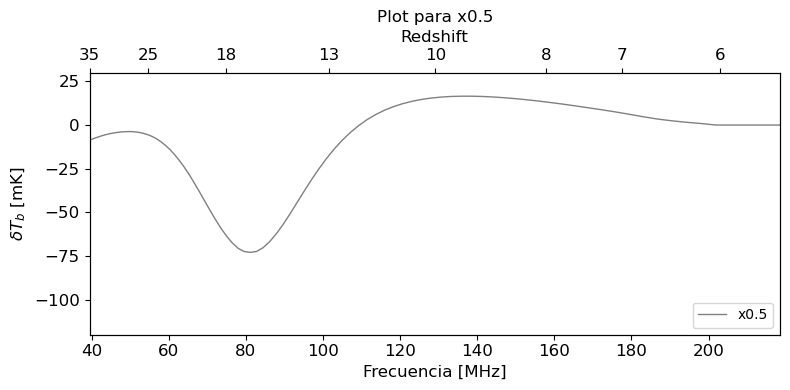

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

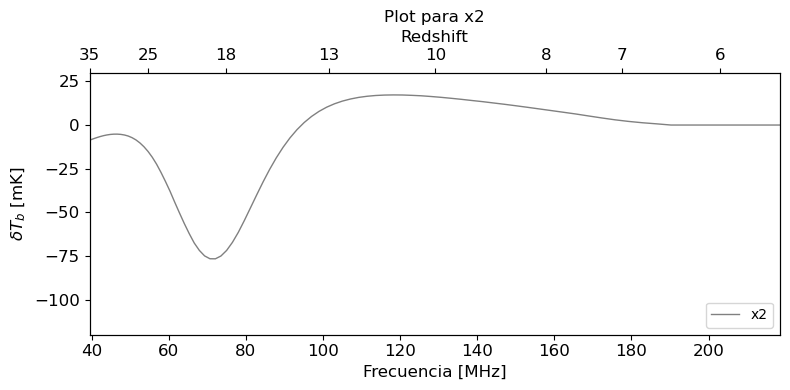

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

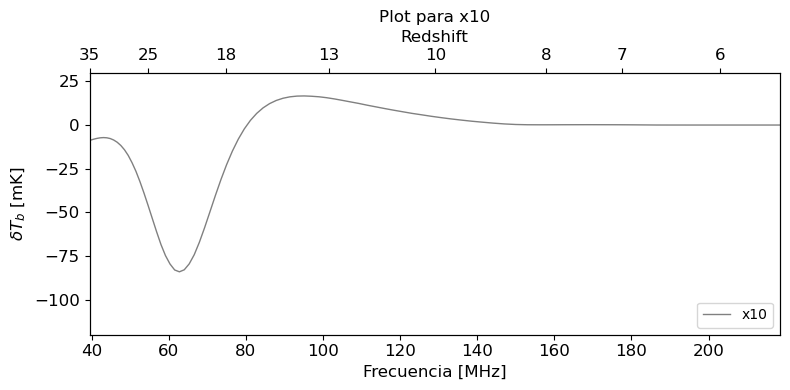

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

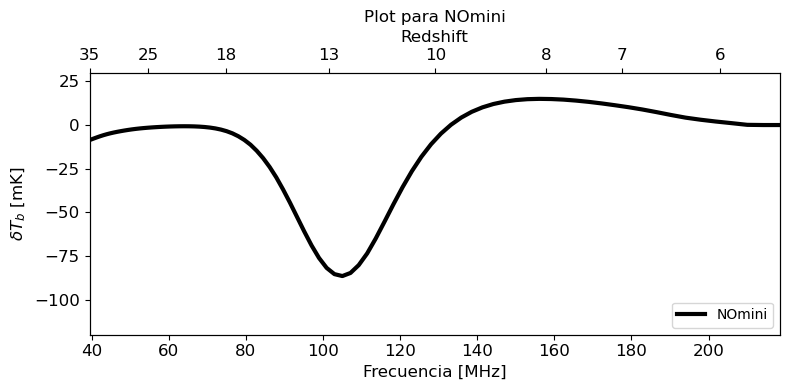

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

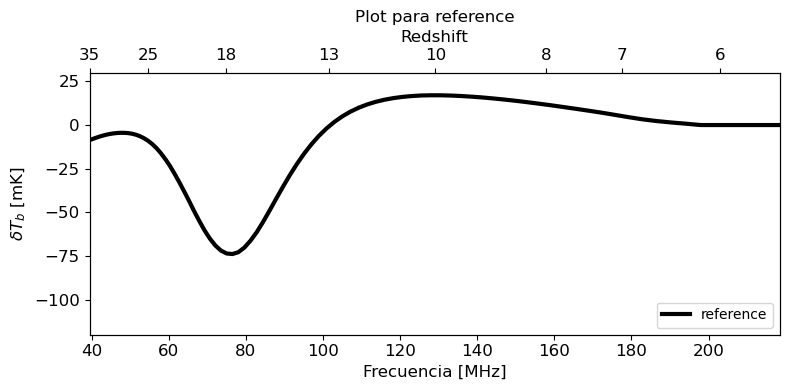

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

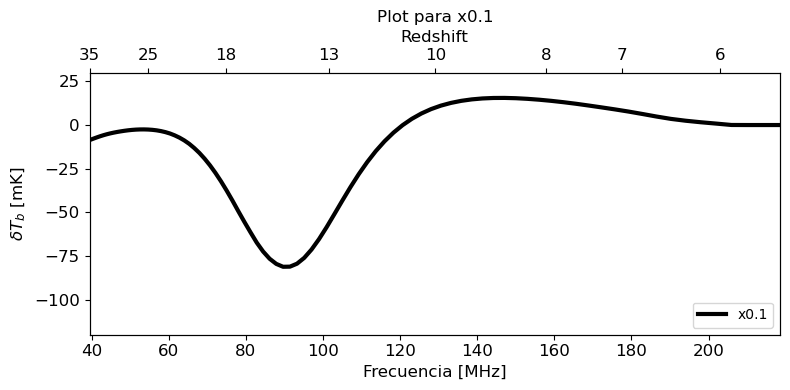

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

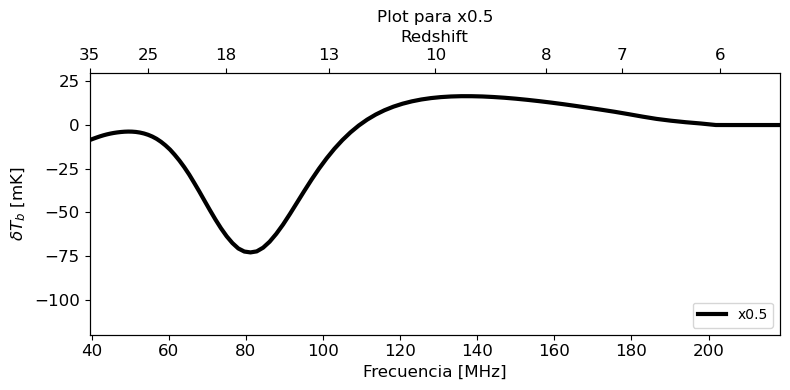

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

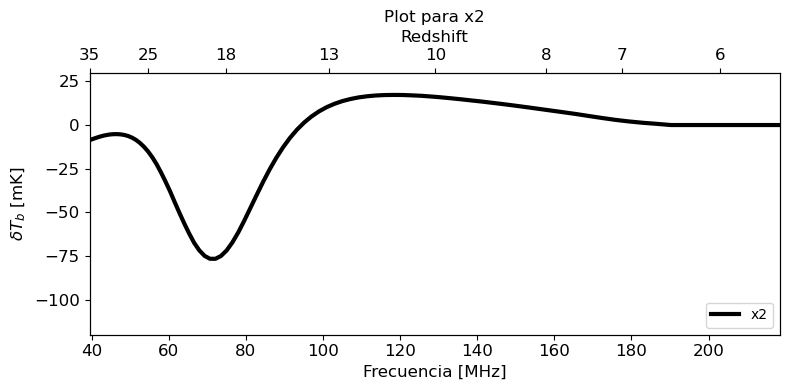

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

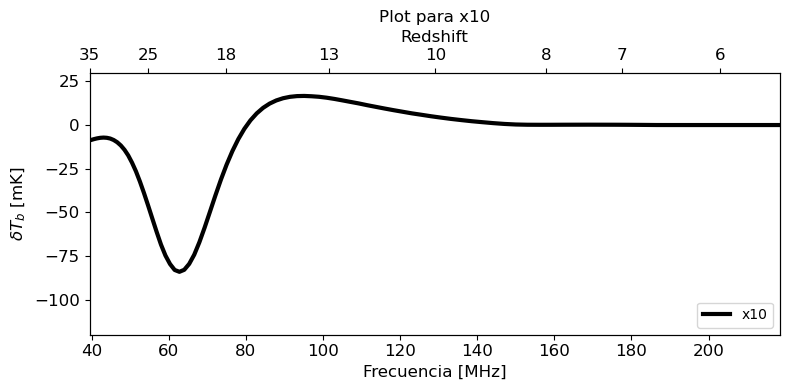

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

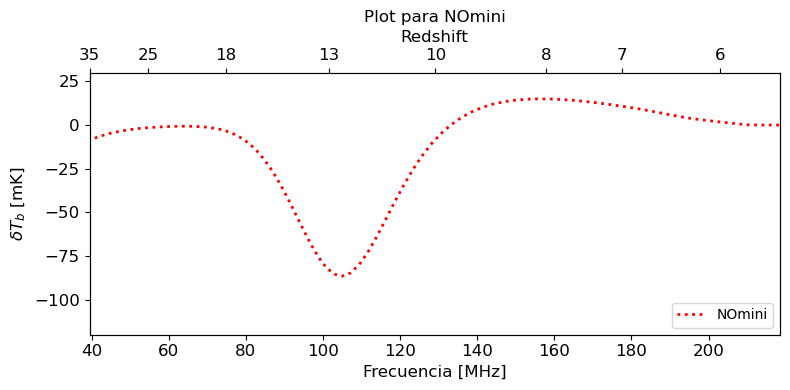

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

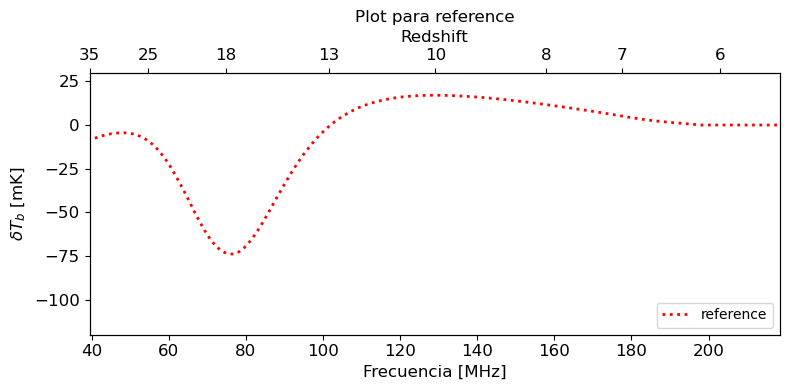

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

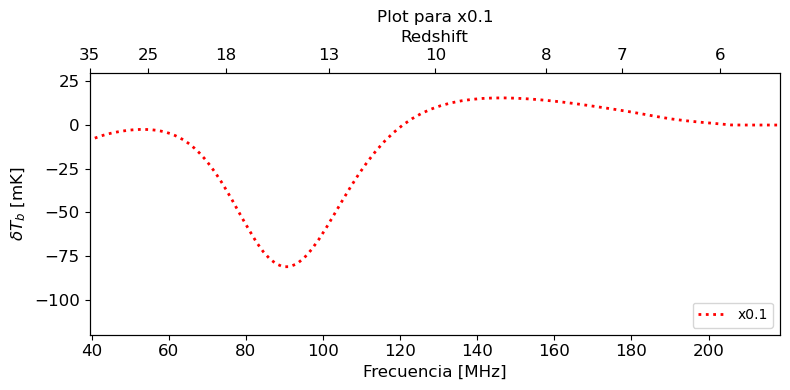

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

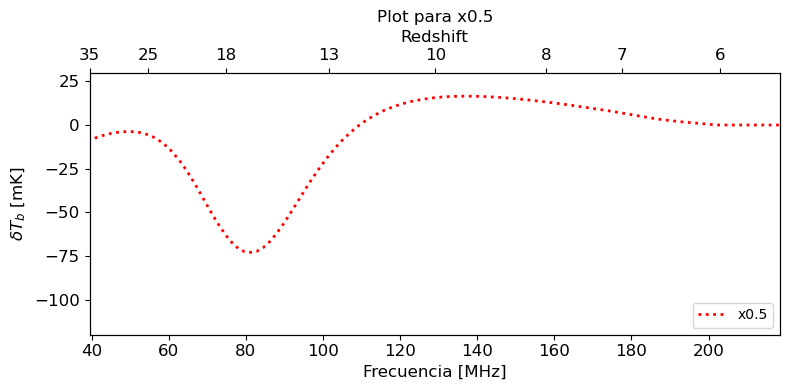

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

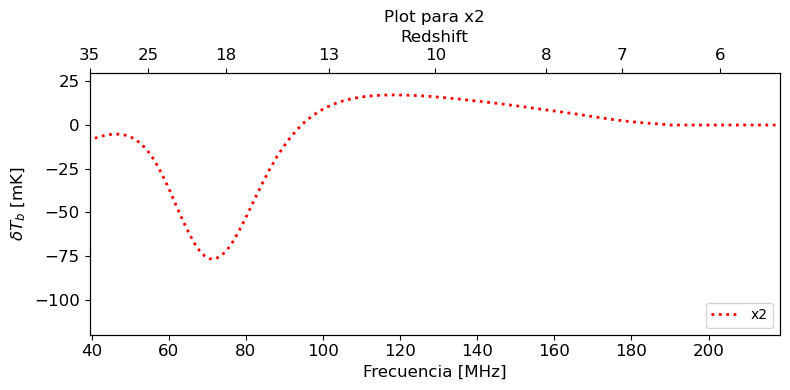

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

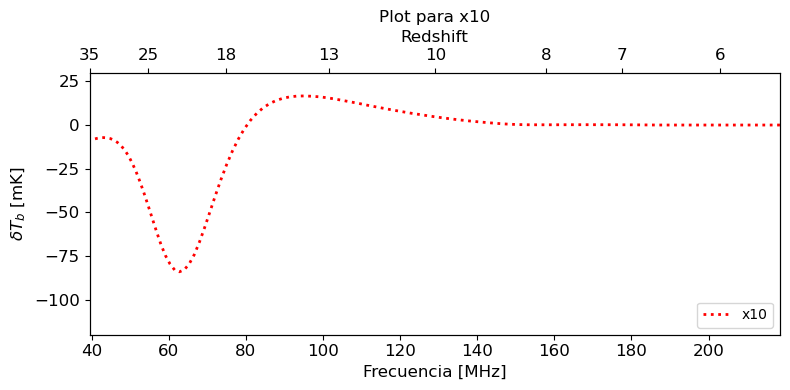

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

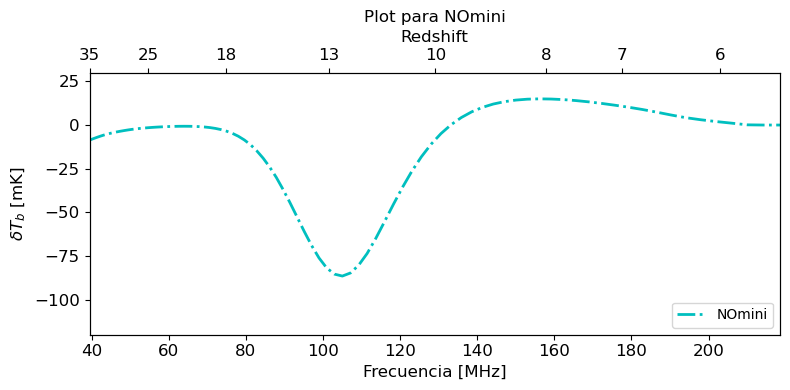

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

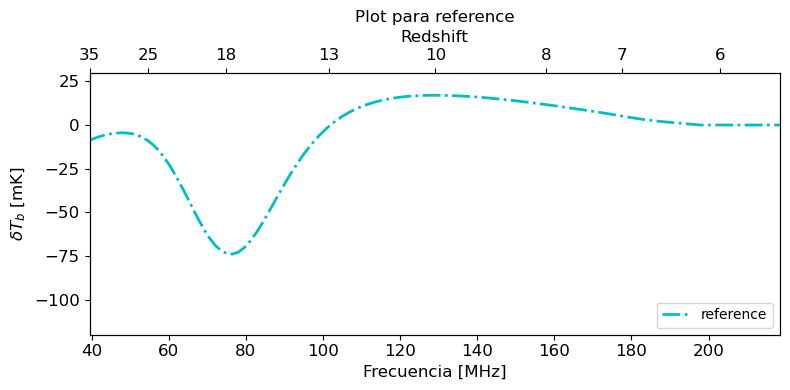

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

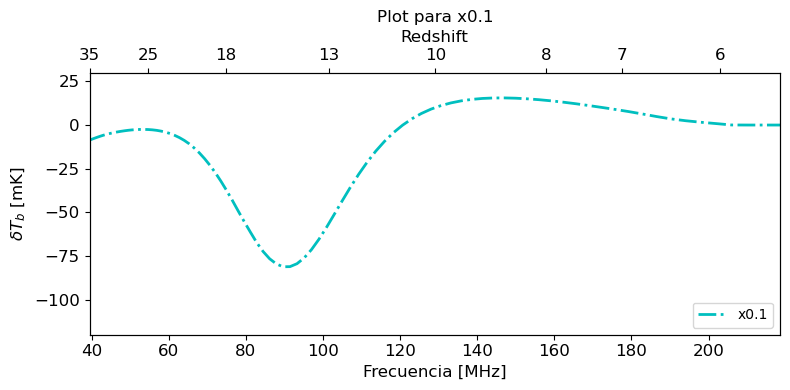

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

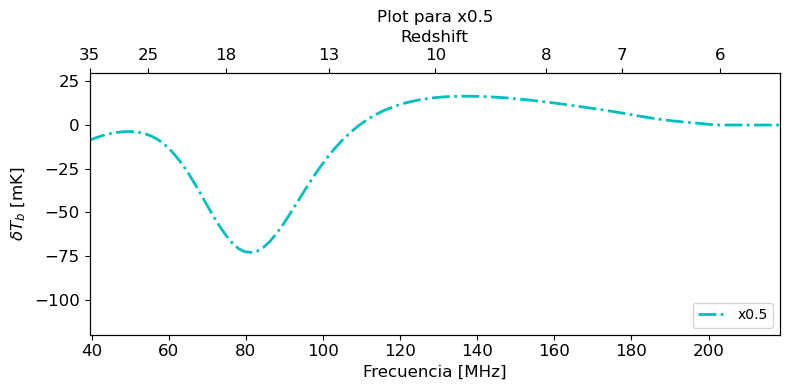

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

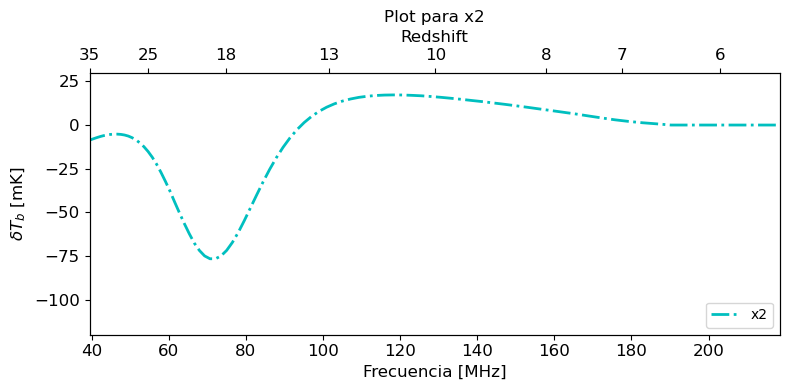

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

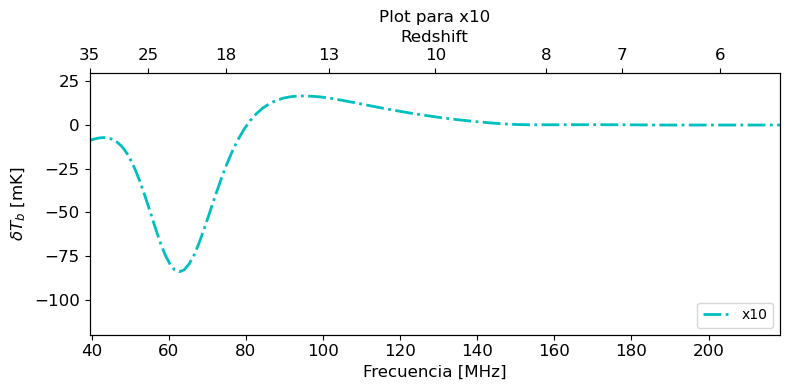

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c

# Definir los parámetros globales, ajustes de estilo, etc.

for kk, labels in enumerate(labelss):
    factors = factorss[kk]
    astro_params = astro_params_fid.copy()

    for label, factor in zip(labels, factors):
        fig, ax = plt.subplots(figsize=(8, 4))

        if label == 'NOmini':
            flag_options = flag_options_without_minihalos
        else:
            flag_options = flag_options_with_minihalos
            if pp == 0:
                astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})
            elif pp == 1:
                astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI'] + np.log10(factor)})
            elif pp == 2:
                astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI'] + np.log10(factor)})
            else:
                if factor > 1:
                    continue
                astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})

        lightcone = p21c.run_lightcone(
            redshift=5.5,
            init_box=initial_conditions,
            flag_options=flag_options,
            astro_params=astro_params,
            global_quantities=global_quantities,
            random_seed=random_seed,
            direc=output_dir
        )

        freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
        ax.plot(freqs, getattr(lightcone, 'global_brightness_temp'),
                color=colors[kk], linestyle=linestyles[kk], label=label, lw=lws[kk])

        ax.set_xlabel('Frecuencia [MHz]', fontsize=12)
        ax.set_ylabel('$\delta T_{b} $ [mK]', fontsize=12)
        ax.set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
        ax.set_ylim(ymins[0], ymaxs[0])  # Ajusta según el índice correspondiente
        ax.xaxis.set_tick_params(labelsize=12)
        ax.yaxis.set_tick_params(labelsize=12)

        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(1420.4 / (zlabels + 1.))
        ax2.set_xticklabels([str(label) for label in zlabels])
        ax2.set_xlabel("Redshift", fontsize=12)
        ax2.xaxis.set_tick_params(labelsize=12)
        ax2.grid(False)

        ax.legend(loc='lower right', fontsize=10)

        ax.set_title(f'Plot para {label}')  # Nombre del plot

        plt.tight_layout()

        # Guardar cada figura con un nombre de archivo único
        filename = f'Temperatura_de_brillo_{label}_con_ajustes.jpg'
        plt.savefig(filename, dpi=300, bbox_inches='tight')

        plt.show()


In [12]:
freqs

array([ 39.01962311,  39.80001483,  40.59601437,  41.40793388,
        42.23609177,  43.0808128 ,  43.94242823,  44.82127596,
        45.71770062,  46.63205376,  47.56469395,  48.51598692,
        49.48630573,  50.4760309 ,  51.48555056,  52.51526059,
        53.5655648 ,  54.63687507,  55.72961153,  56.8442027 ,
        57.98108567,  59.14070628,  60.32351927,  61.52998851,
        62.7605871 ,  64.01579765,  65.29611238,  66.60203338,
        67.93407278,  69.29275294,  70.67860668,  72.09217746,
        73.53401964,  75.00469863,  76.50479117,  78.03488553,
        79.59558176,  81.18749187,  82.81124016,  84.46746339,
        86.15681104,  87.87994562,  89.63754286,  91.430292  ,
        93.2588961 ,  95.12407224,  97.02655187,  98.96708106,
       100.94642079, 102.96534728, 105.02465227, 107.12514331,
       109.26764413, 111.45299493, 113.6820527 , 115.95569159,
       118.27480321, 120.64029702, 123.05310066, 125.51416032,
       128.02444113, 130.58492752, 133.19662358, 135.86

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

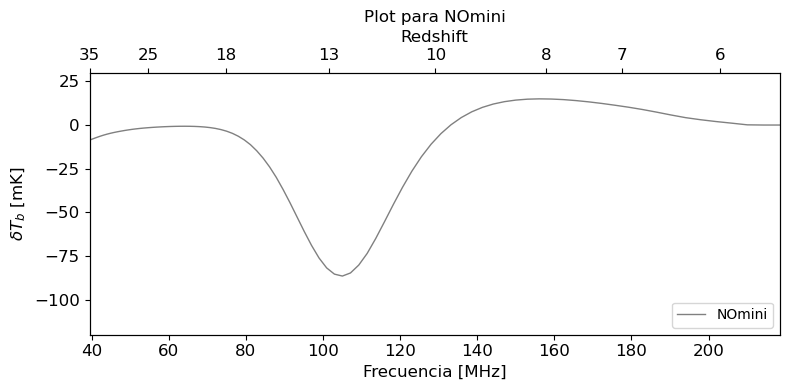

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

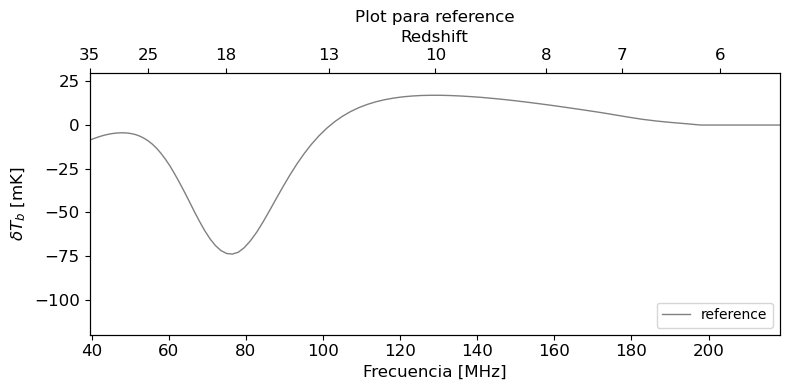

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

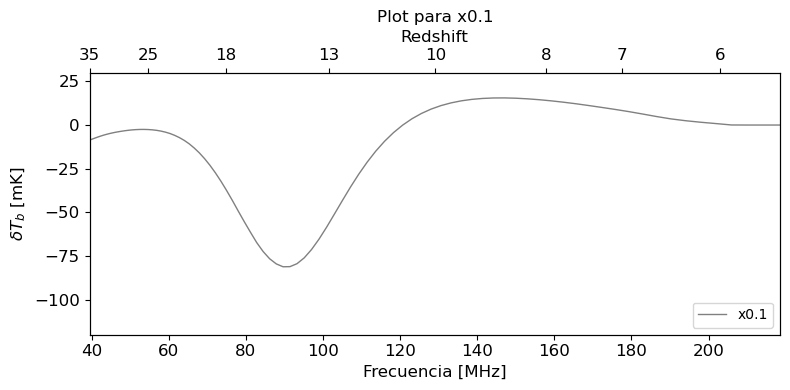

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

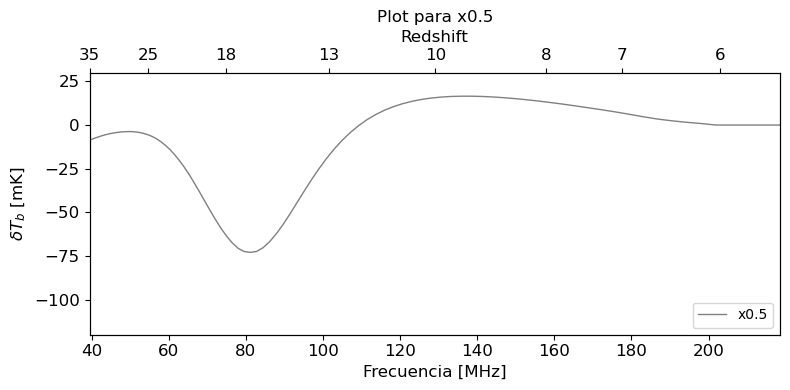

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

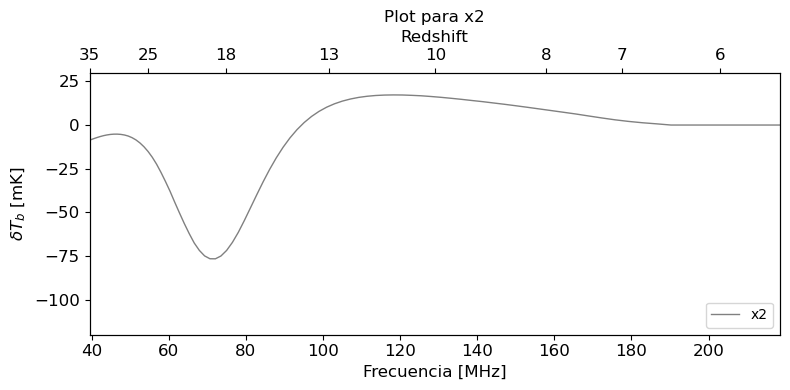

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

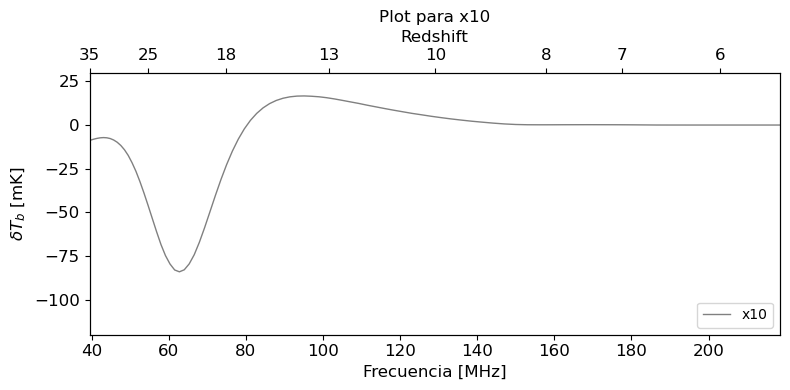

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

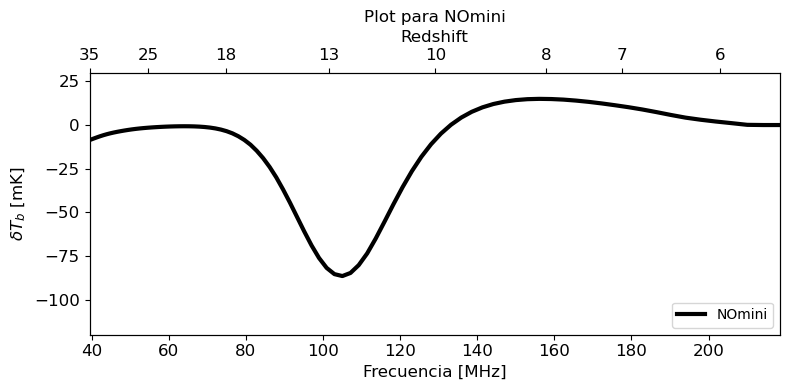

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

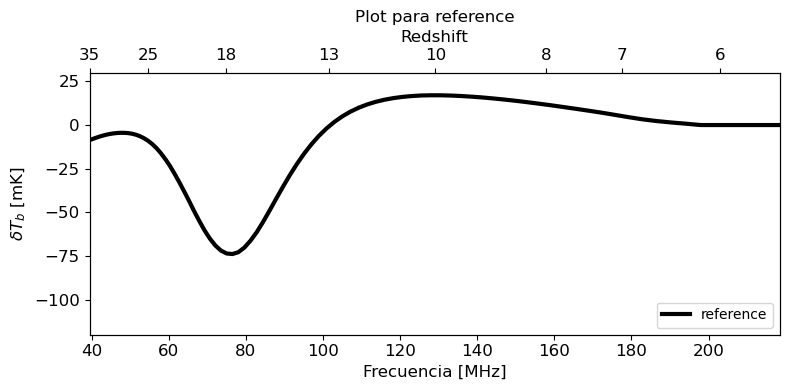

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

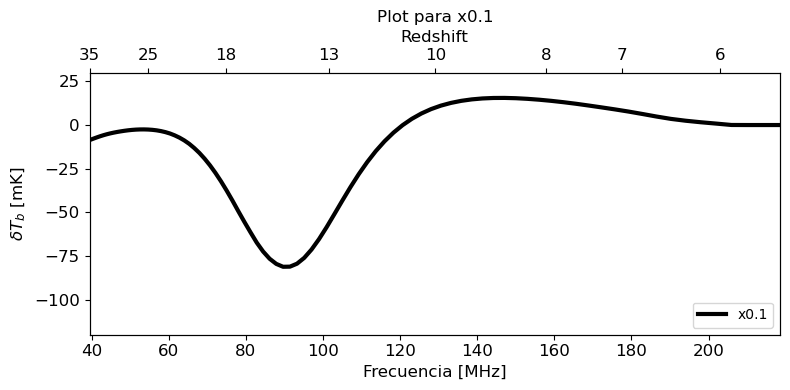

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

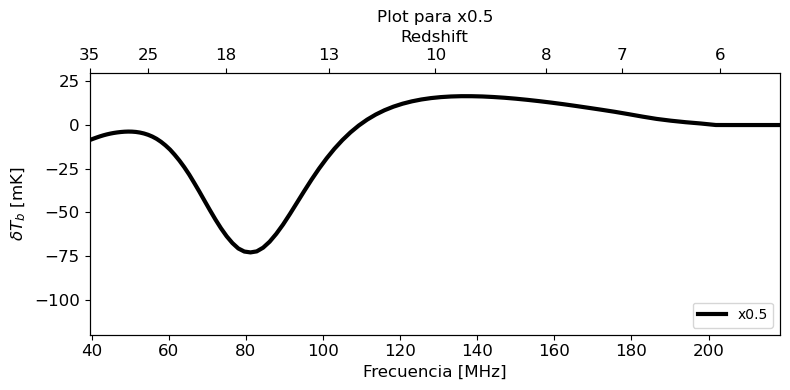

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

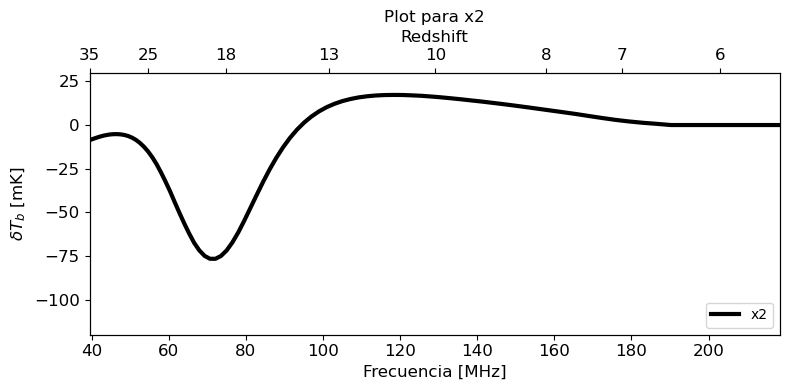

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

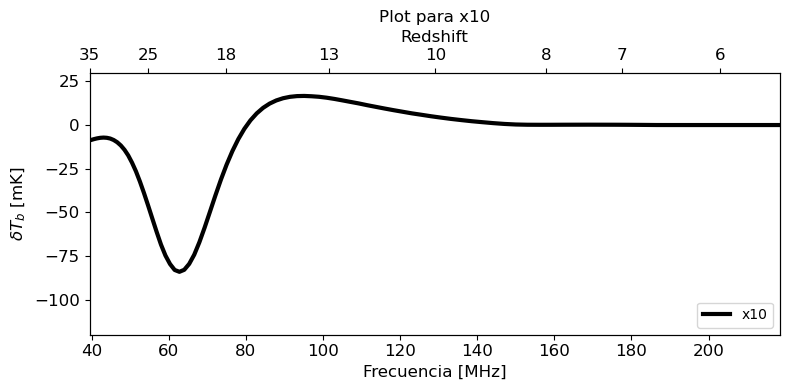

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

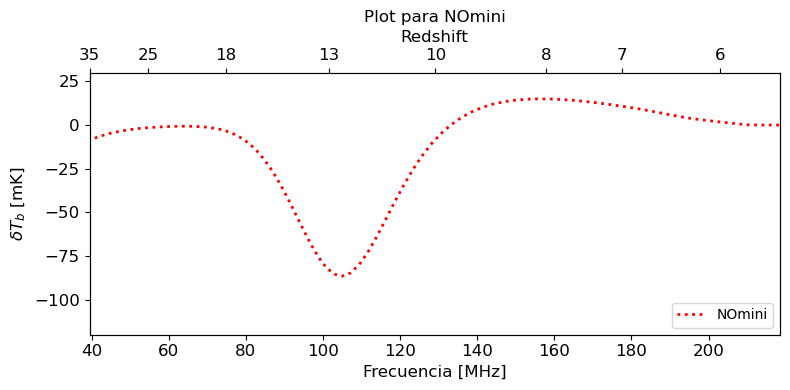

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

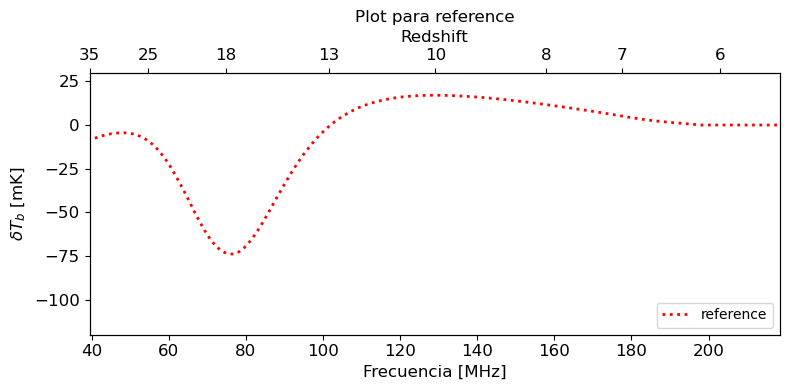

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

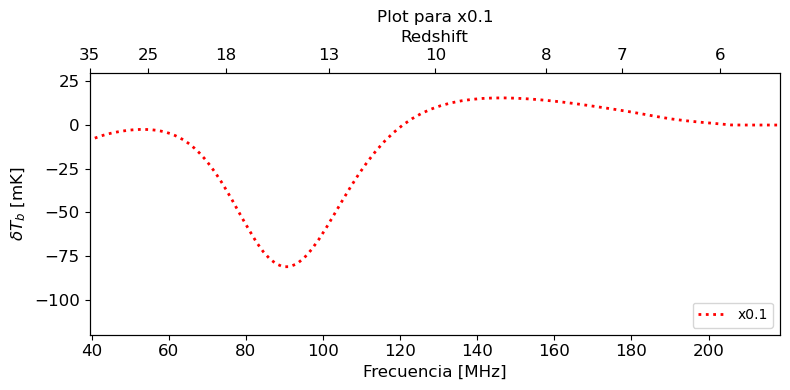

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

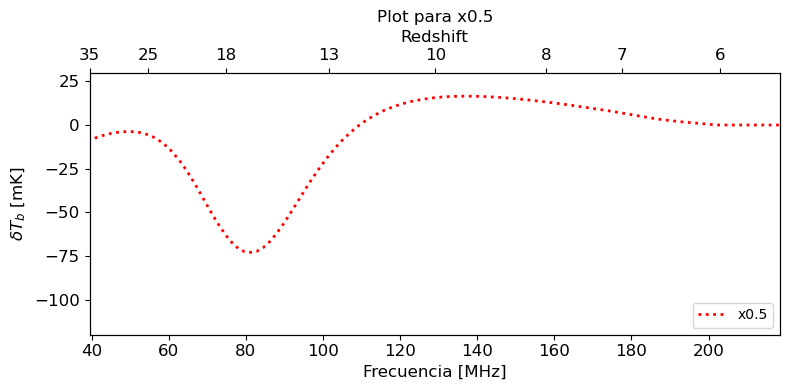

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

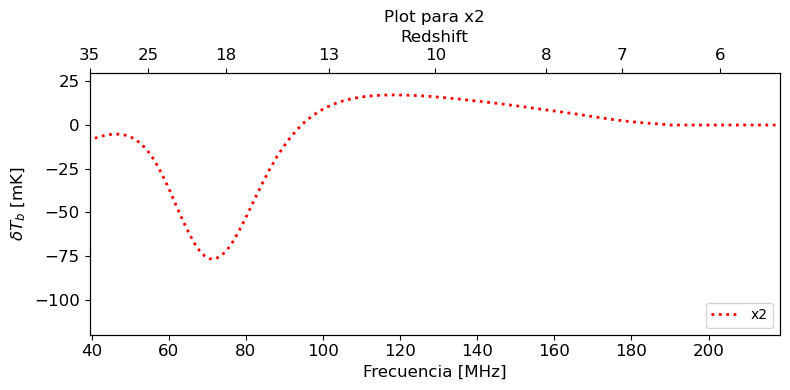

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

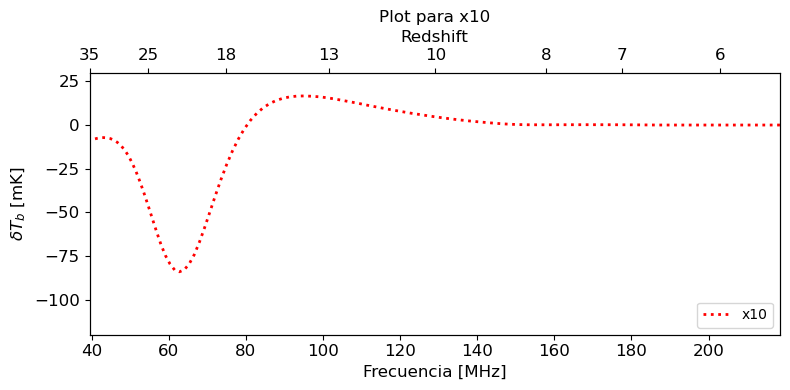

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

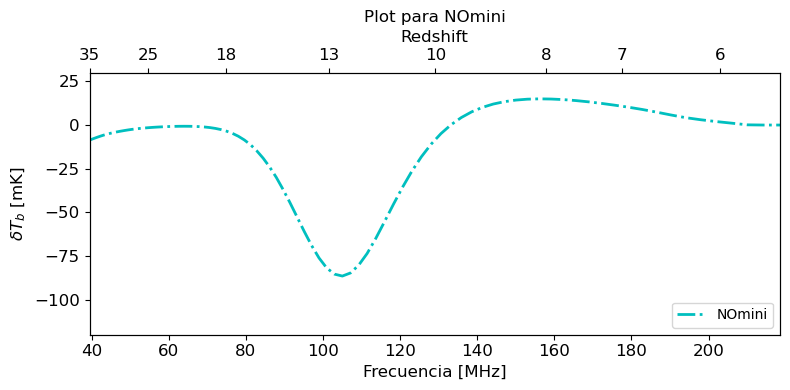

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

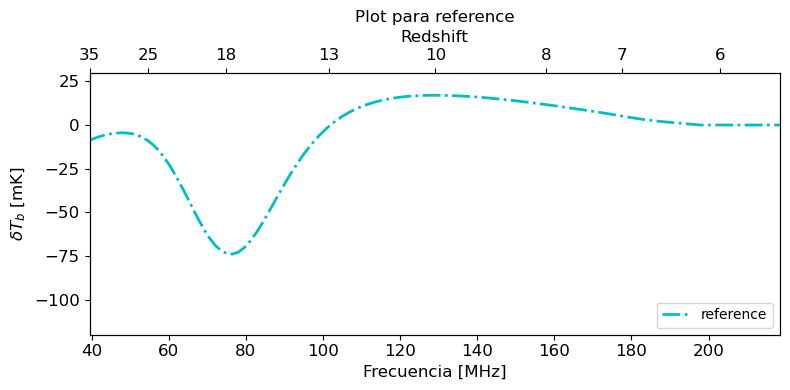

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

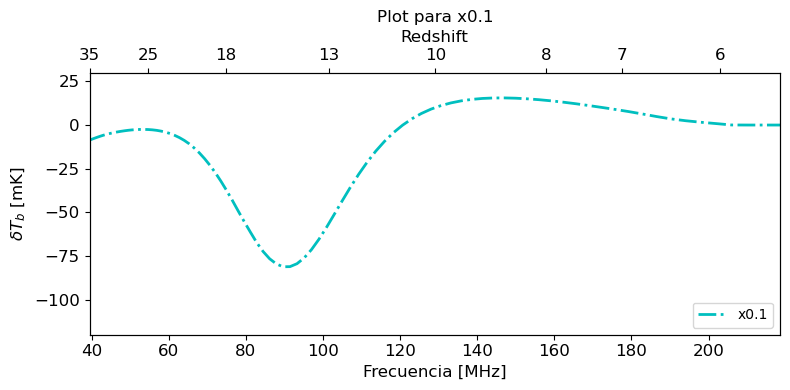

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

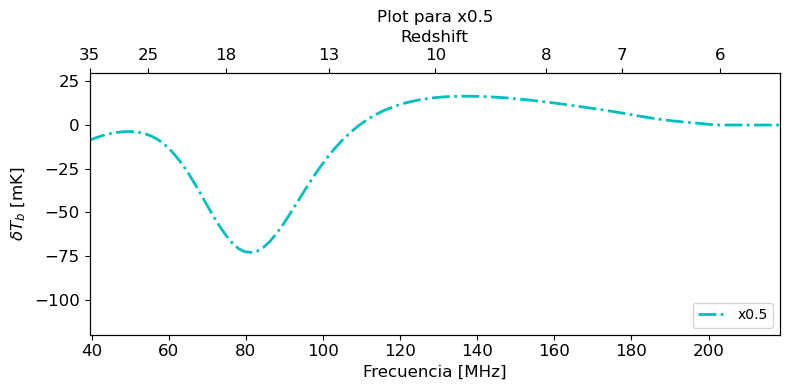

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

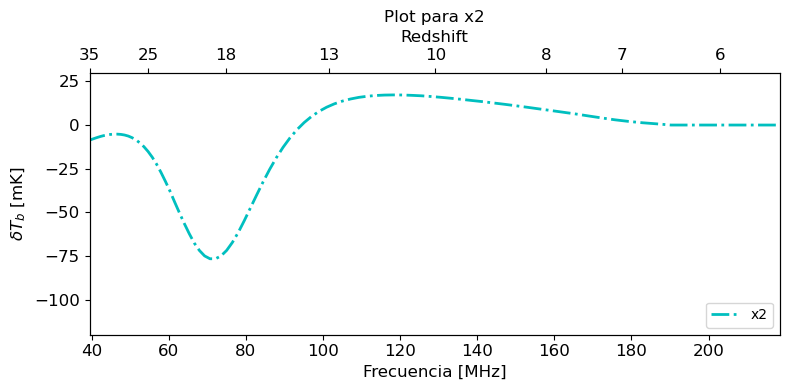

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

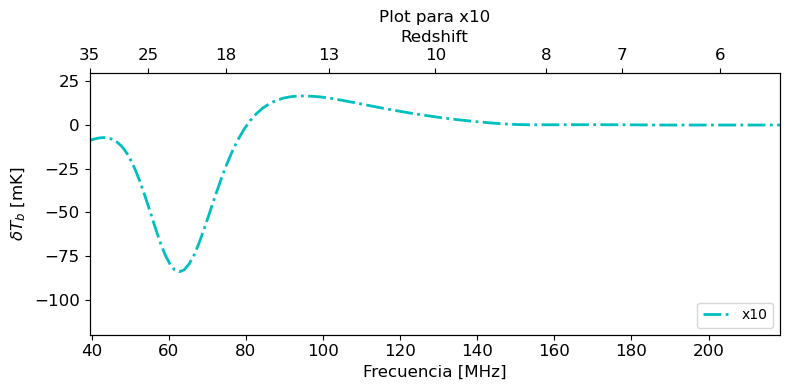

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c

# Definir los parámetros globales, ajustes de estilo, etc.

for kk, labels in enumerate(labelss):
    factors = factorss[kk]
    astro_params = astro_params_fid.copy()

    for label, factor in zip(labels, factors):
        fig, ax = plt.subplots(figsize=(8, 4))

        if label == 'NOmini':
            flag_options = flag_options_without_minihalos
        else:
            flag_options = flag_options_with_minihalos
            if pp == 0:
                astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})
            elif pp == 1:
                astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI'] + np.log10(factor)})
            elif pp == 2:
                astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI'] + np.log10(factor)})
            else:
                if factor > 1:
                    continue
                astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})

        lightcone = p21c.run_lightcone(
            redshift=5.5,
            init_box=initial_conditions,
            flag_options=flag_options,
            astro_params=astro_params,
            global_quantities=global_quantities,
            random_seed=random_seed,
            direc=output_dir
        )

        freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
        ax.plot(freqs, getattr(lightcone, 'global_brightness_temp'),
                color=colors[kk], linestyle=linestyles[kk], label=label, lw=lws[kk])

        ax.set_xlabel('Frecuencia [MHz]', fontsize=12)
        ax.set_ylabel('$\delta T_{b} $ [mK]', fontsize=12)
        ax.set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
        ax.set_ylim(ymins[0], ymaxs[0])  # Ajusta según el índice correspondiente
        ax.xaxis.set_tick_params(labelsize=12)
        ax.yaxis.set_tick_params(labelsize=12)

        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(1420.4 / (zlabels + 1.))
        ax2.set_xticklabels([str(label) for label in zlabels])
        ax2.set_xlabel("Redshift", fontsize=12)
        ax2.xaxis.set_tick_params(labelsize=12)
        ax2.grid(False)

        ax.legend(loc='lower right', fontsize=10)

        ax.set_title(f'Plot para {label}')  # Nombre del plot

        plt.tight_layout()

        # Guardar cada figura con un nombre de archivo único
        filename = f'Temperatura_de_brillo_{label}_con_ajustes.jpg'
        plt.savefig(filename, dpi=300, bbox_inches='tight')

        # Mostrar la figura
        plt.show()

        # Imprimir los valores de las funciones
        print(f'Valores de la función para {label}:')
        for f, tb in zip(freqs, getattr(lightcone, 'global_brightness_temp')):
            print(f'Frecuencia: {f:.2f} MHz, Temperatura de brillo: {tb:.2f} mK')
        print()


/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

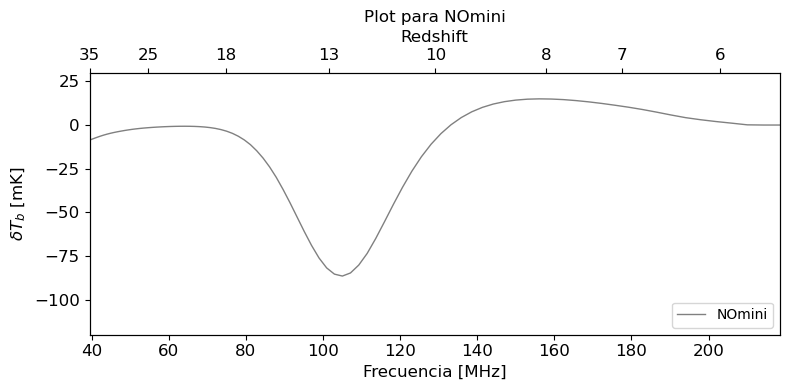

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

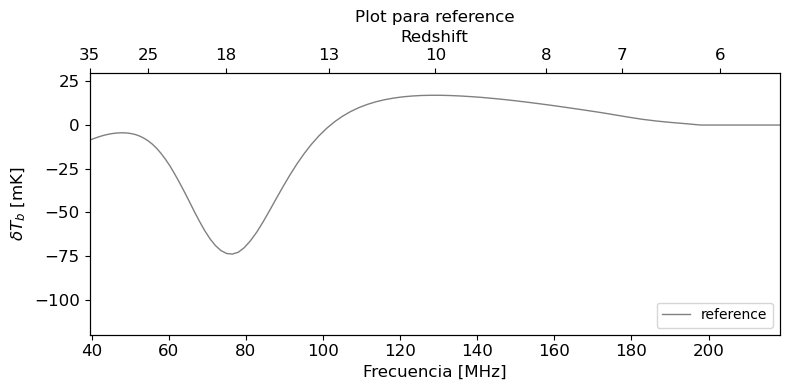

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

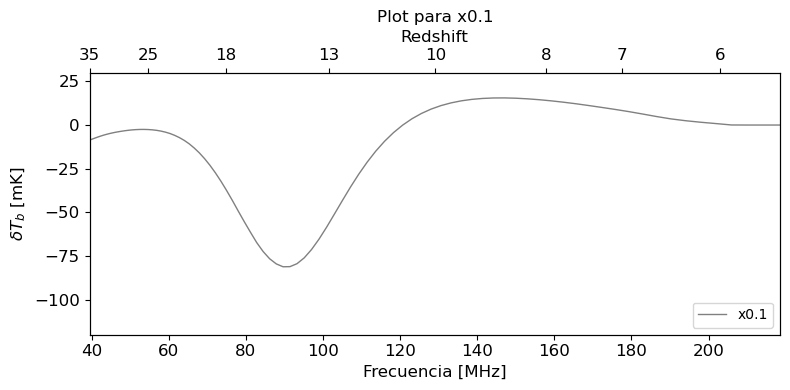

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

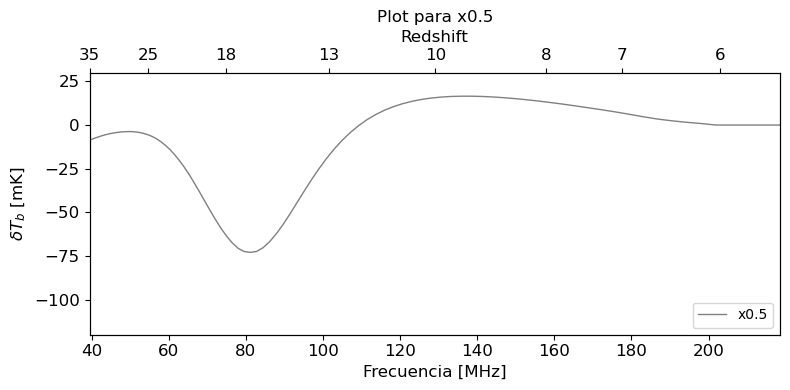

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

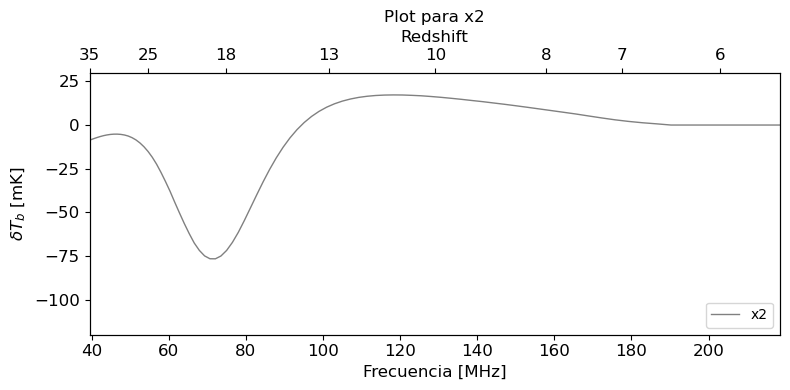

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

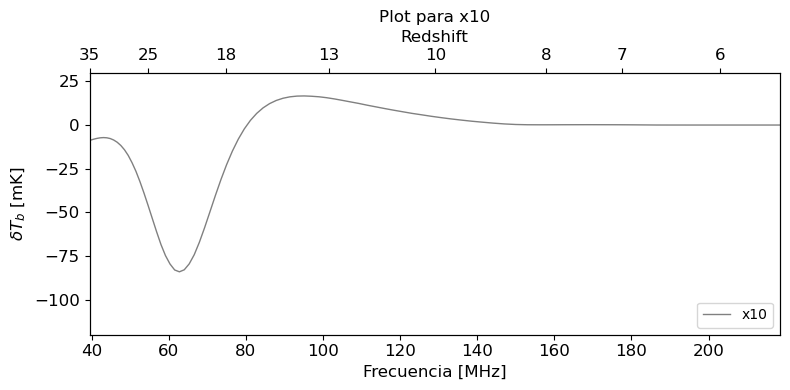

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

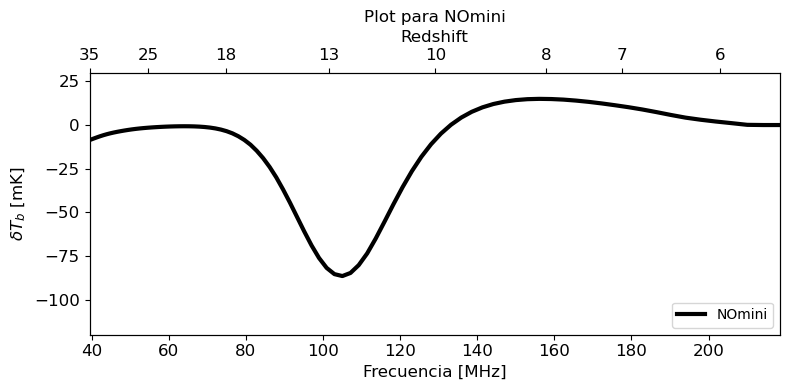

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

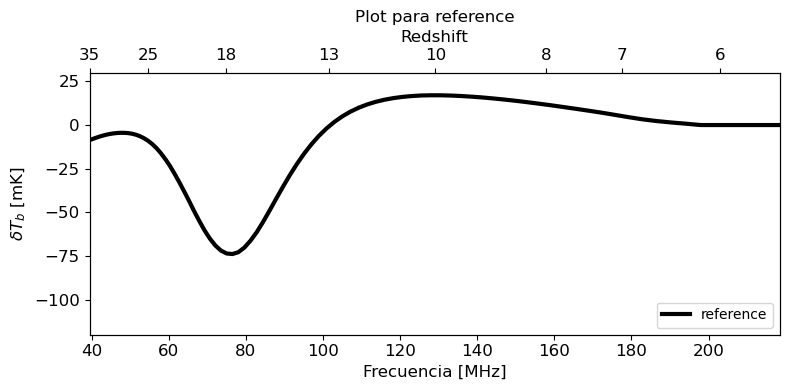

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

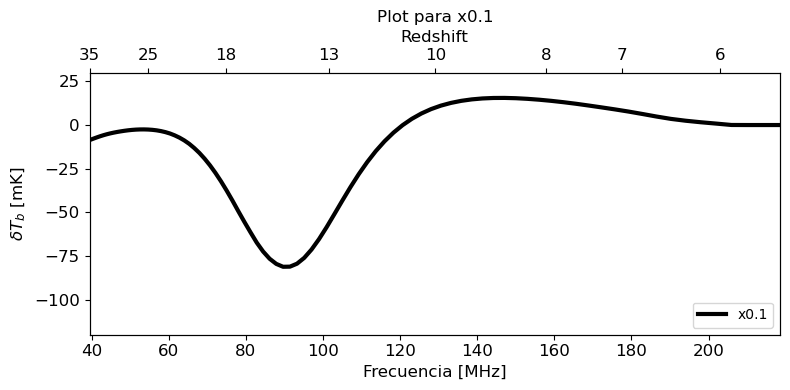

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

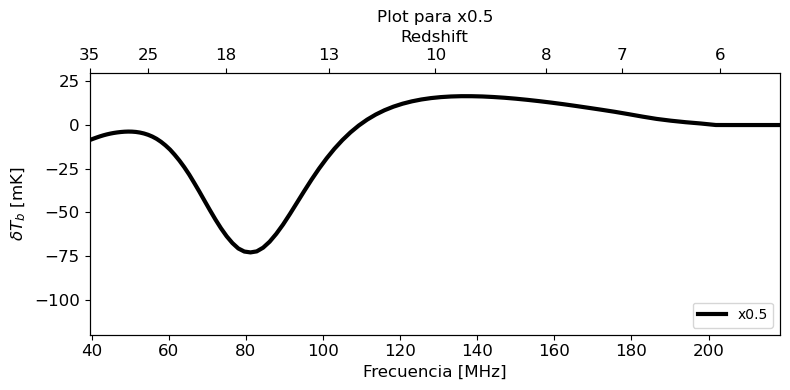

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

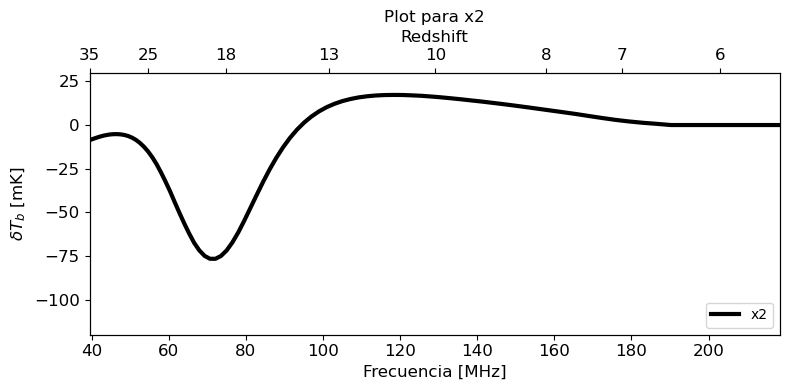

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

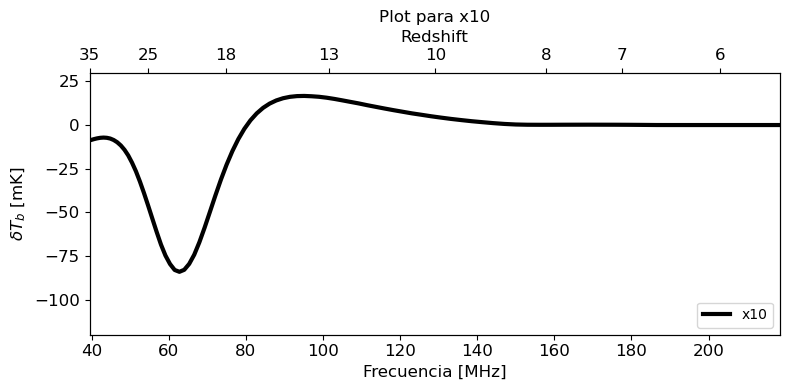

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

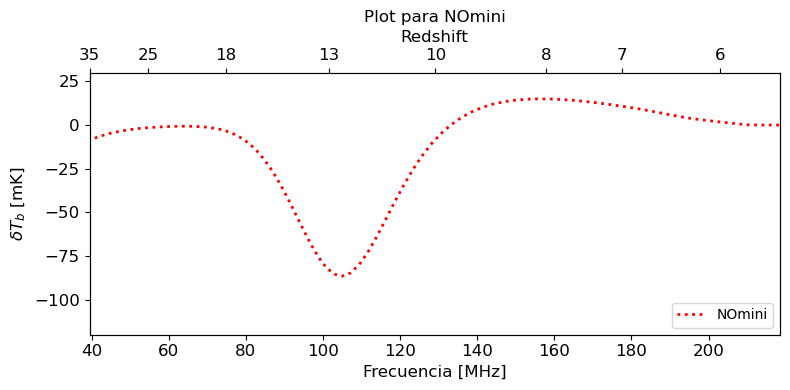

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

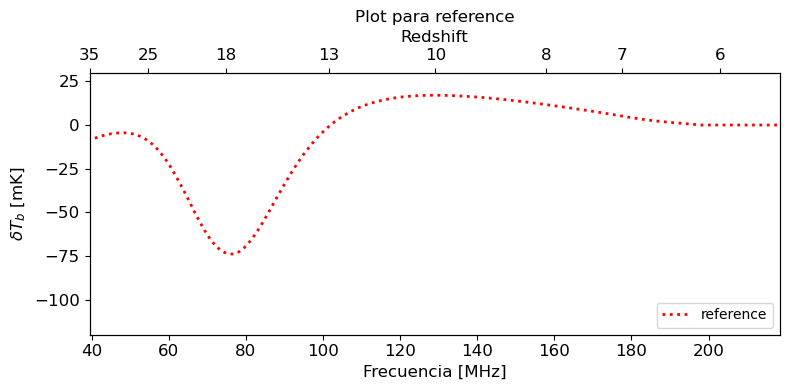

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

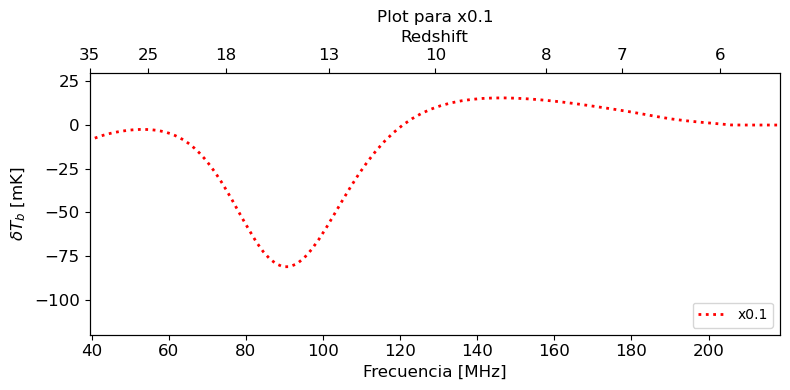

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

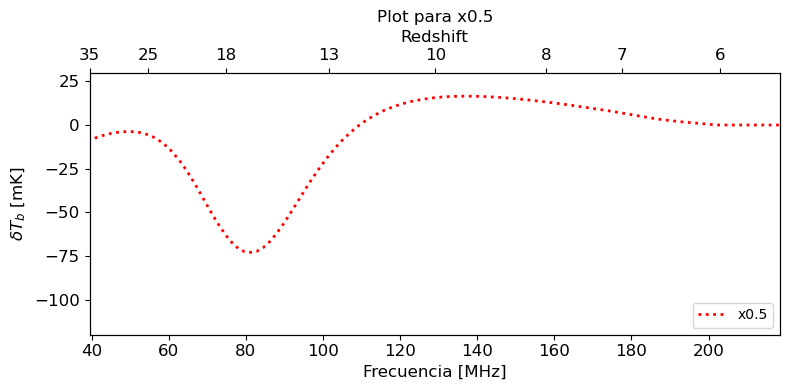

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

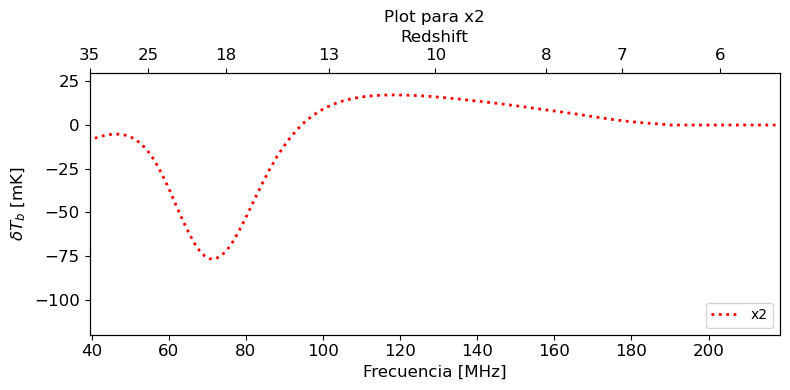

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

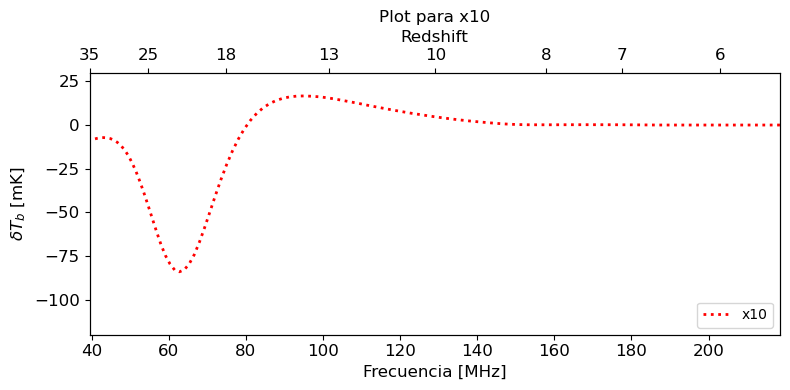

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

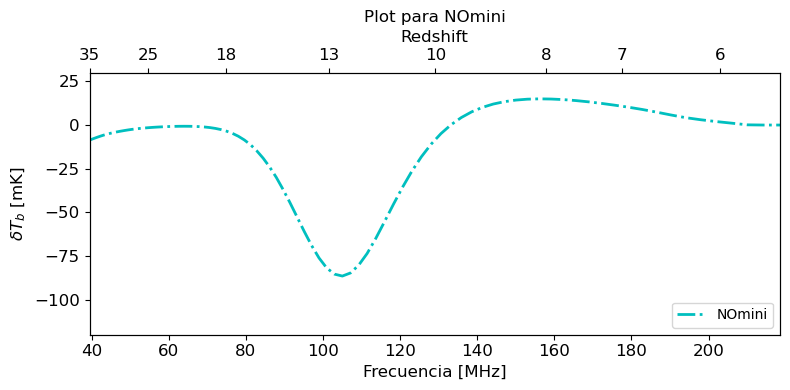

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

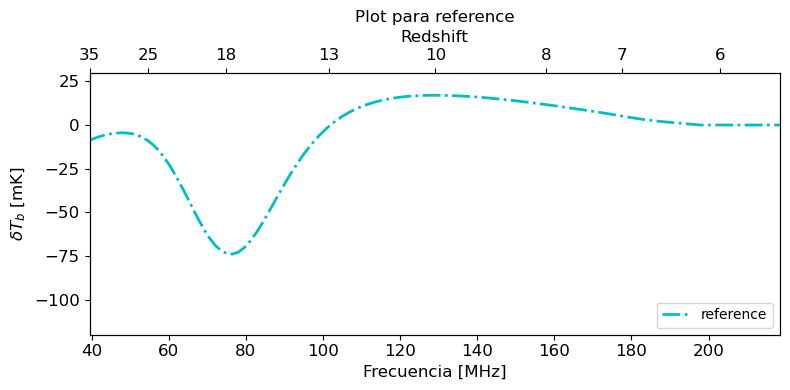

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

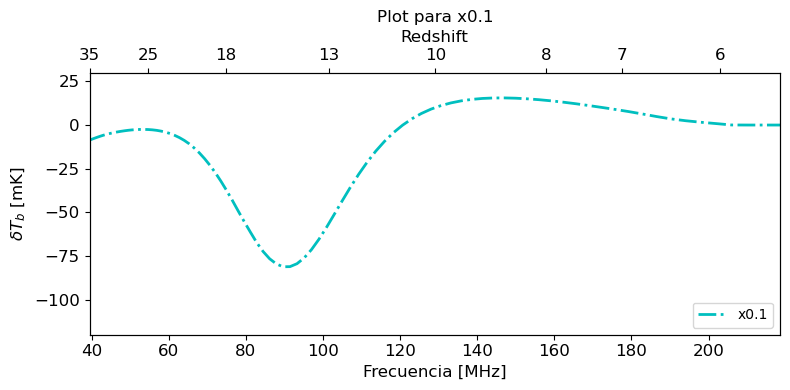

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

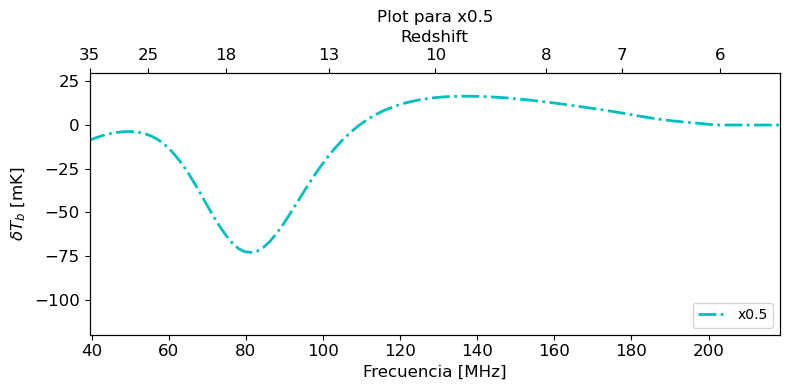

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

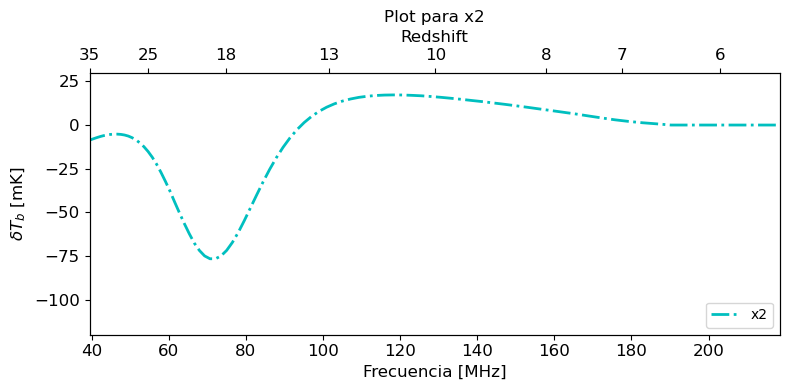

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

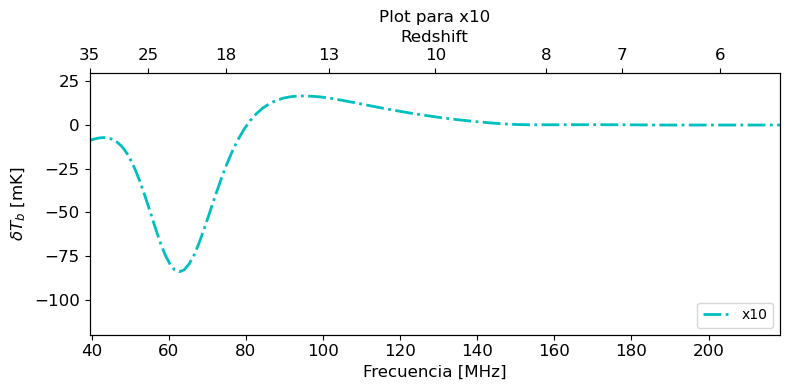

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c

# Definir los parámetros globales, ajustes de estilo, etc.

for kk, labels in enumerate(labelss):
    factors = factorss[kk]
    astro_params = astro_params_fid.copy()

    for label, factor in zip(labels, factors):
        fig, ax = plt.subplots(figsize=(8, 4))

        if label == 'NOmini':
            flag_options = flag_options_without_minihalos
        else:
            flag_options = flag_options_with_minihalos
            if pp == 0:
                astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})
            elif pp == 1:
                astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI'] + np.log10(factor)})
            elif pp == 2:
                astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI'] + np.log10(factor)})
            else:
                if factor > 1:
                    continue
                astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})

        lightcone = p21c.run_lightcone(
            redshift=5.5,
            init_box=initial_conditions,
            flag_options=flag_options,
            astro_params=astro_params,
            global_quantities=global_quantities,
            random_seed=random_seed,
            direc=output_dir
        )

        freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
        ax.plot(freqs, getattr(lightcone, 'global_brightness_temp'),
                color=colors[kk], linestyle=linestyles[kk], label=label, lw=lws[kk])

        ax.set_xlabel('Frecuencia [MHz]', fontsize=12)
        ax.set_ylabel('$\delta T_{b} $ [mK]', fontsize=12)
        ax.set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
        ax.set_ylim(ymins[0], ymaxs[0])  # Ajusta según el índice correspondiente
        ax.xaxis.set_tick_params(labelsize=12)
        ax.yaxis.set_tick_params(labelsize=12)

        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(1420.4 / (zlabels + 1.))
        ax2.set_xticklabels([str(label) for label in zlabels])
        ax2.set_xlabel("Redshift", fontsize=12)
        ax2.xaxis.set_tick_params(labelsize=12)
        ax2.grid(False)

        ax.legend(loc='lower right', fontsize=10)

        ax.set_title(f'Plot para {label}')  # Nombre del plot

        plt.tight_layout()

        # Guardar cada figura con un nombre de archivo único
        filename = f'Temperatura_de_brillo_{label}_con_ajustes.jpg'
        plt.savefig(filename, dpi=300, bbox_inches='tight')

        # Mostrar la figura
        plt.show()

        # Imprimir los valores de las funciones
        print(f'Valores de la función para {label}:')
        for f, tb in zip(freqs, getattr(lightcone, 'global_brightness_temp')):
            print(f'Frecuencia: {f:.2f} MHz, Temperatura de brillo: {tb:.2f} mK')
        print()


In [47]:
print(f'Valores de la función para {label}:')
for f, tb in zip(freqs, getattr(lightcone, 'global_brightness_temp')):
            #print(f'Temperatura de brillo: {tb:.2f} mK')
    print(f' {tb:.2f} mK')

print()

Valores de la función para x10:
 -8.92 mK
 -8.58 mK
 -8.07 mK
 -7.63 mK
 -7.32 mK
 -7.18 mK
 -7.31 mK
 -7.73 mK
 -8.58 mK
 -9.86 mK
 -11.69 mK
 -14.17 mK
 -17.40 mK
 -21.56 mK
 -26.48 mK
 -32.33 mK
 -38.88 mK
 -46.01 mK
 -53.49 mK
 -61.07 mK
 -68.41 mK
 -74.70 mK
 -79.53 mK
 -82.94 mK
 -84.00 mK
 -82.85 mK
 -79.48 mK
 -74.22 mK
 -67.10 mK
 -58.74 mK
 -49.64 mK
 -40.31 mK
 -31.19 mK
 -22.64 mK
 -14.89 mK
 -8.06 mK
 -2.19 mK
 2.70 mK
 6.68 mK
 9.84 mK
 12.27 mK
 14.07 mK
 15.33 mK
 16.14 mK
 16.56 mK
 16.65 mK
 16.47 mK
 16.17 mK
 15.64 mK
 14.94 mK
 14.11 mK
 13.24 mK
 12.36 mK
 11.36 mK
 10.41 mK
 9.45 mK
 8.51 mK
 7.61 mK
 6.68 mK
 5.88 mK
 5.02 mK
 4.25 mK
 3.50 mK
 2.83 mK
 2.19 mK
 1.63 mK
 1.09 mK
 0.63 mK
 0.31 mK
 0.16 mK
 0.14 mK
 0.14 mK
 0.17 mK
 0.18 mK
 0.20 mK
 0.18 mK
 0.17 mK
 0.13 mK
 0.08 mK
 0.01 mK
 0.00 mK
 0.00 mK
 0.00 mK
 0.00 mK
 0.00 mK
 0.00 mK
 0.00 mK
 0.00 mK



 0.00 mK


/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

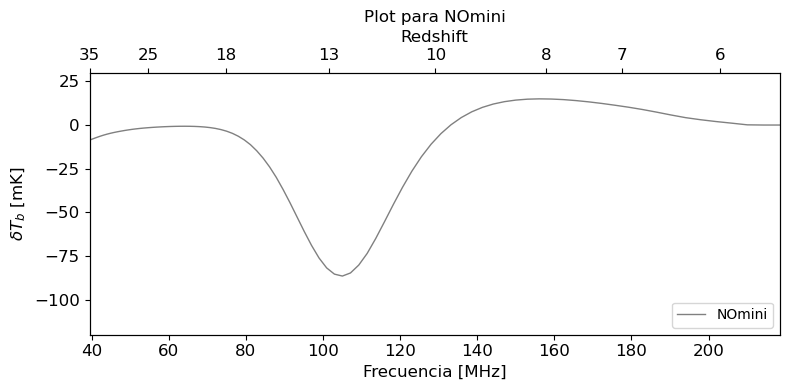

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

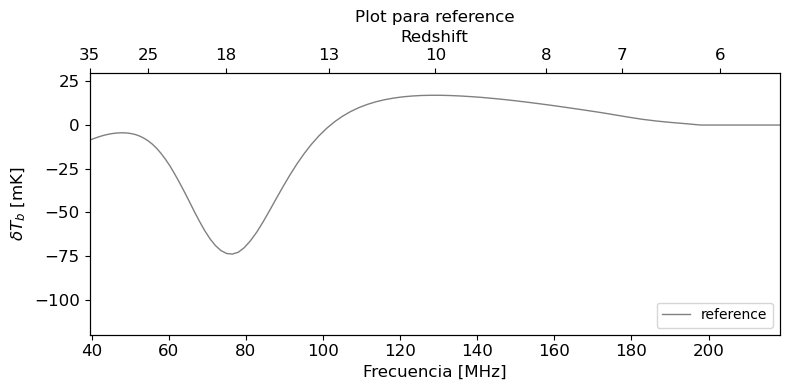

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

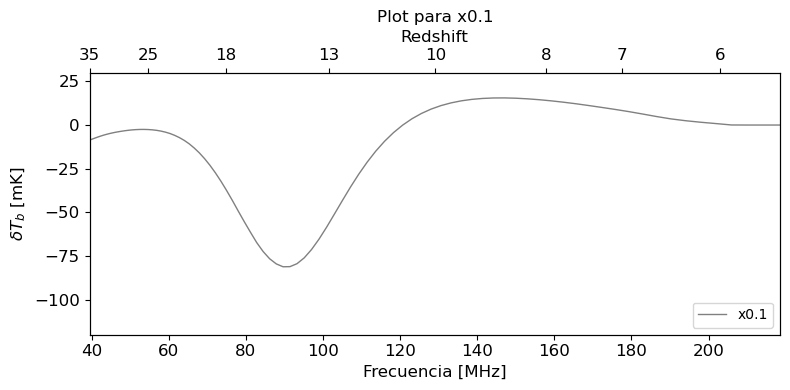

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

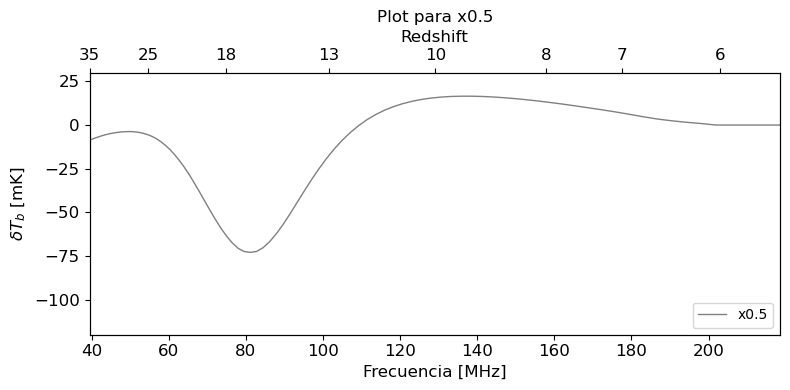

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

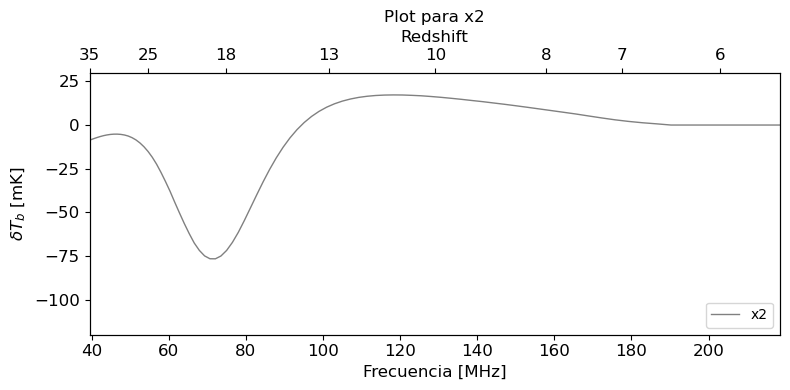

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

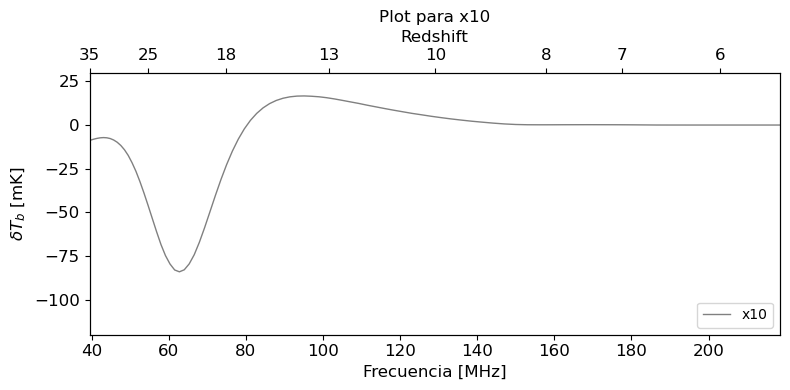

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

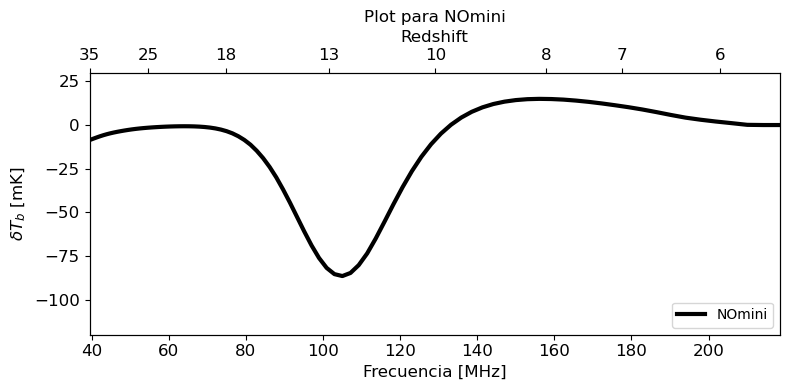

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

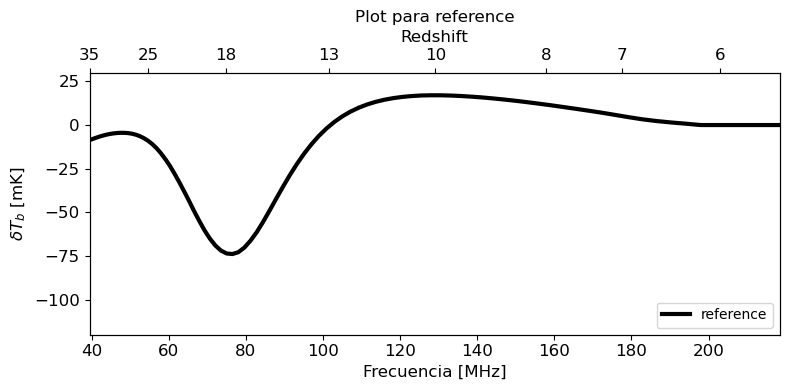

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

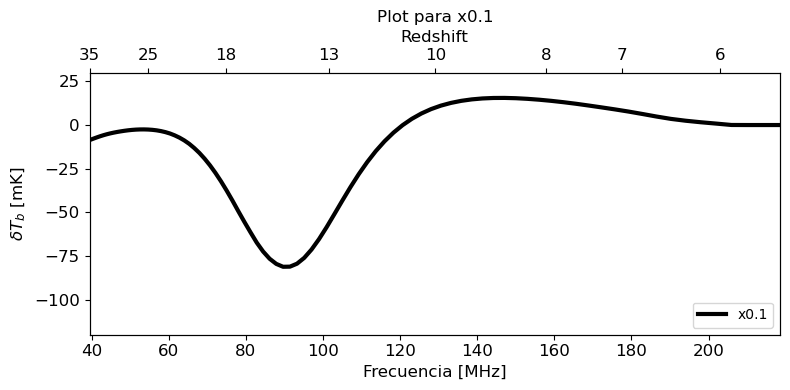

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

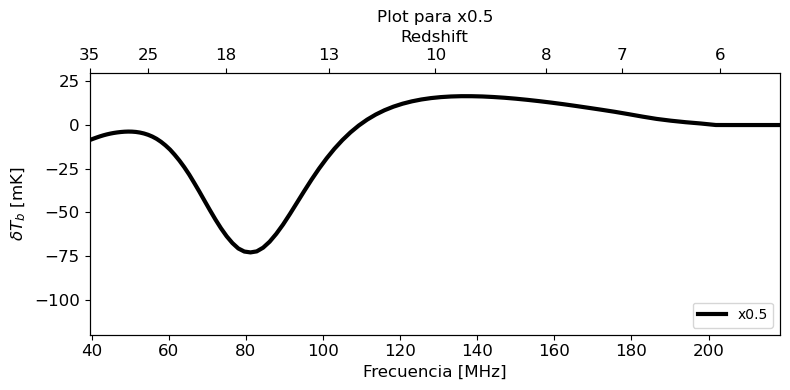

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

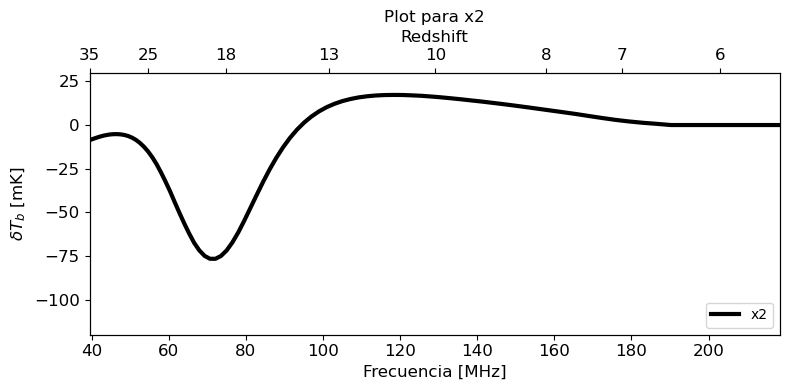

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

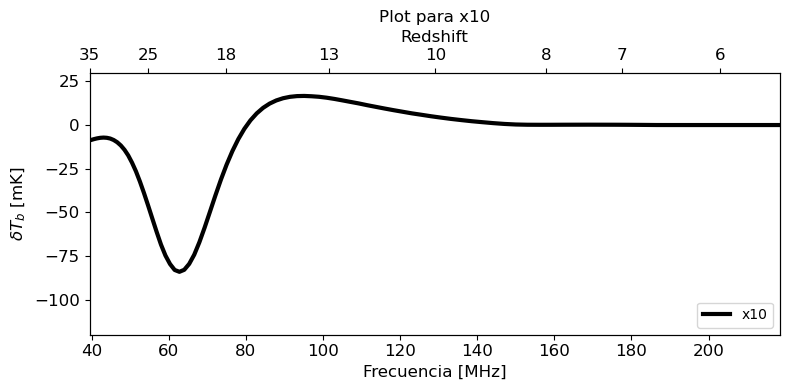

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

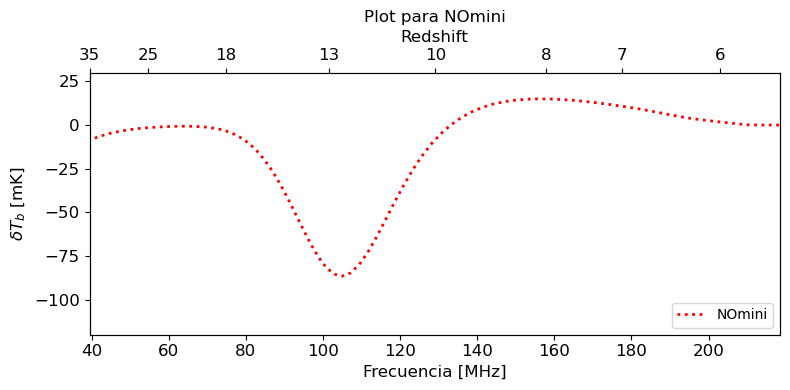

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

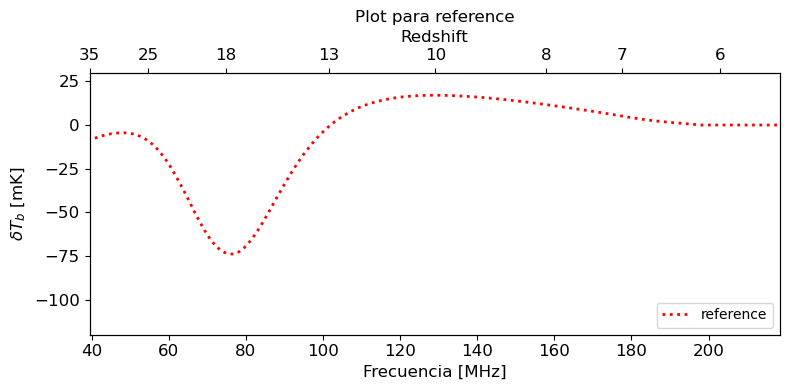

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

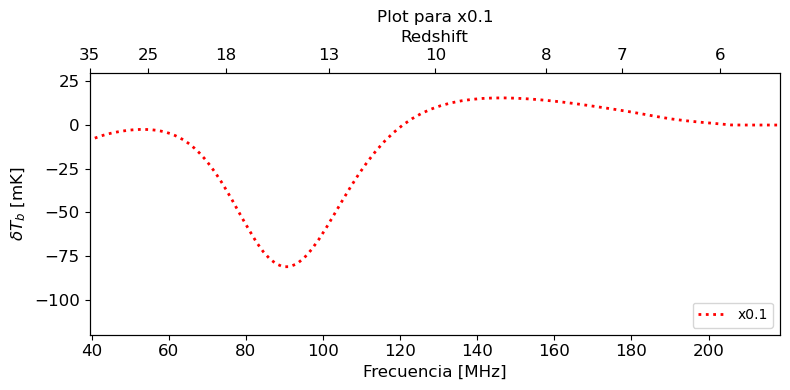

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

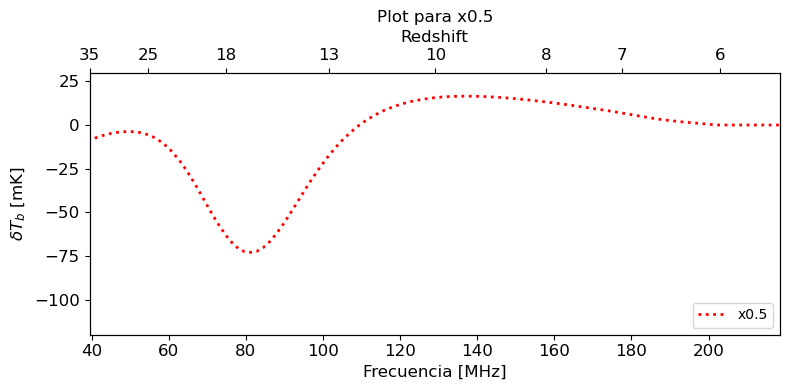

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

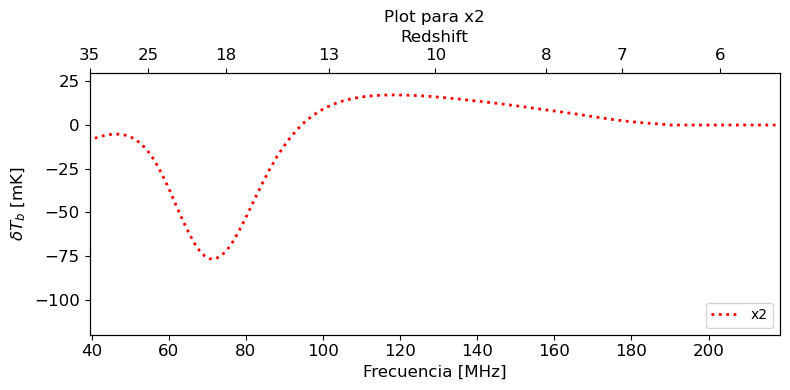

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

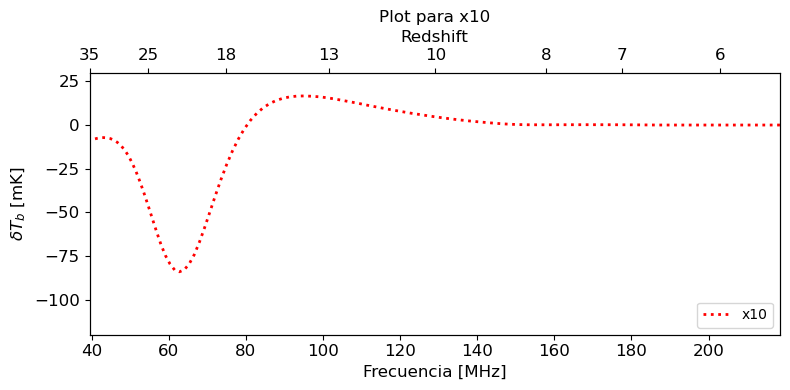

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

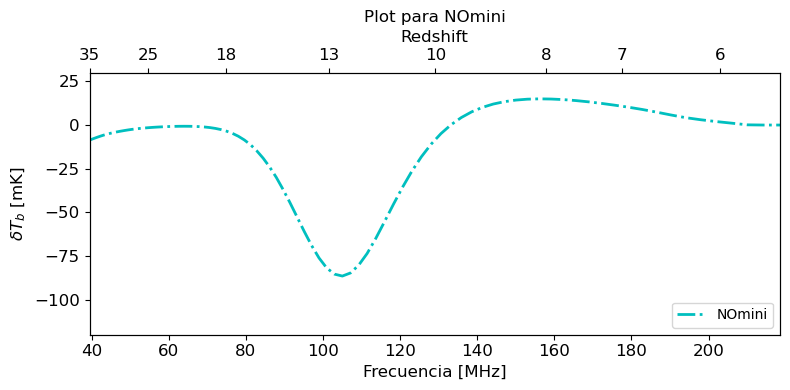

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

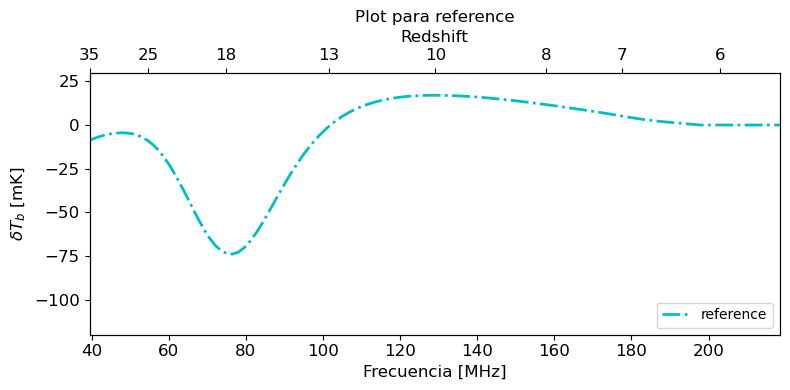

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

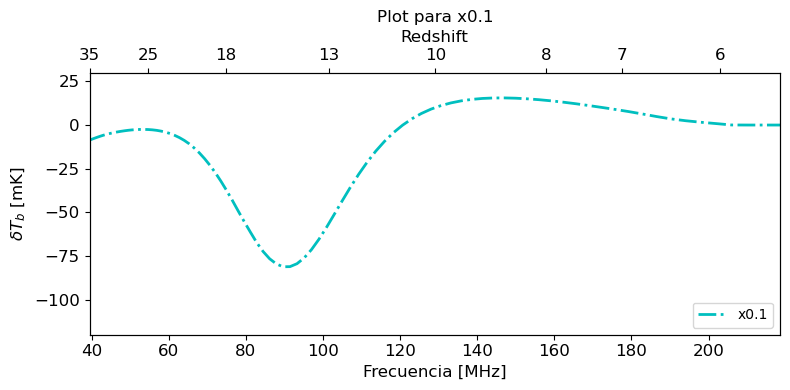

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

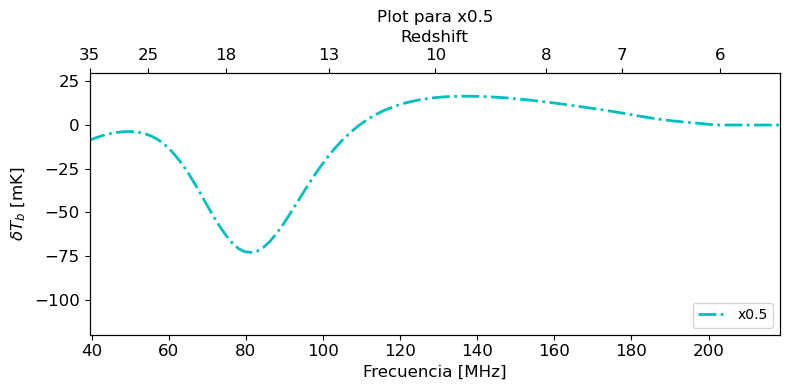

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

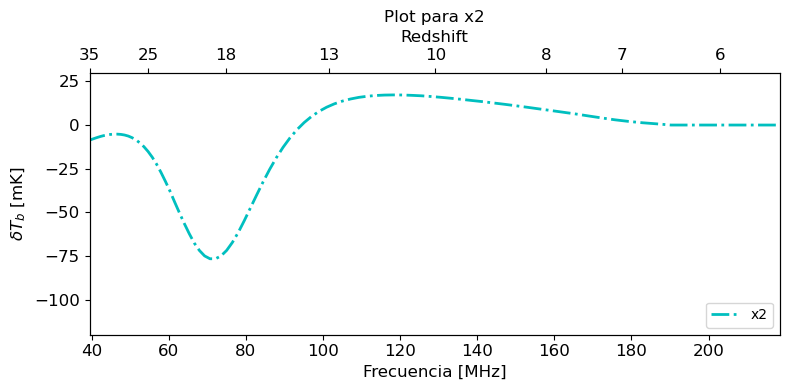

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

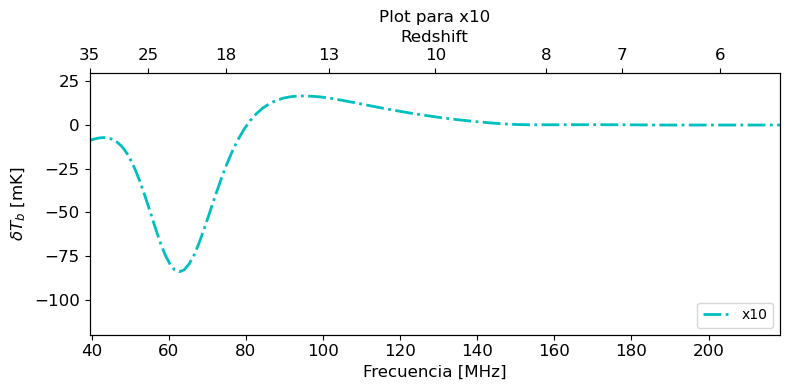

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c

# Definir los parámetros globales, ajustes de estilo, etc.

for kk, labels in enumerate(labelss):
    factors = factorss[kk]
    astro_params = astro_params_fid.copy()

    for label, factor in zip(labels, factors):
        fig, ax = plt.subplots(figsize=(8, 4))

        if label == 'NOmini':
            flag_options = flag_options_without_minihalos
        else:
            flag_options = flag_options_with_minihalos
            if pp == 0:
                astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})
            elif pp == 1:
                astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI'] + np.log10(factor)})
            elif pp == 2:
                astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI'] + np.log10(factor)})
            else:
                if factor > 1:
                    continue
                astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})

        lightcone = p21c.run_lightcone(
            redshift=5.5,
            init_box=initial_conditions,
            flag_options=flag_options,
            astro_params=astro_params,
            global_quantities=global_quantities,
            random_seed=random_seed,
            direc=output_dir
        )

        freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
        ax.plot(freqs, getattr(lightcone, 'global_brightness_temp'),
                color=colors[kk], linestyle=linestyles[kk], label=label, lw=lws[kk])

        ax.set_xlabel('Frecuencia [MHz]', fontsize=12)
        ax.set_ylabel('$\delta T_{b} $ [mK]', fontsize=12)
        ax.set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
        ax.set_ylim(ymins[0], ymaxs[0])  # Ajusta según el índice correspondiente
        ax.xaxis.set_tick_params(labelsize=12)
        ax.yaxis.set_tick_params(labelsize=12)

        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(1420.4 / (zlabels + 1.))
        ax2.set_xticklabels([str(label) for label in zlabels])
        ax2.set_xlabel("Redshift", fontsize=12)
        ax2.xaxis.set_tick_params(labelsize=12)
        ax2.grid(False)

        ax.legend(loc='lower right', fontsize=10)

        ax.set_title(f'Plot para {label}')  # Nombre del plot

        plt.tight_layout()

        # Guardar cada figura con un nombre de archivo único
        filename = f'Temperatura_de_brillo_{label}_con_ajustes.jpg'
        plt.savefig(filename, dpi=300, bbox_inches='tight')

        # Mostrar la figura
        plt.show()

        # Imprimir los valores de las funciones
        print(f'Valores de la función para {label}:')
        for f, tb in zip(freqs, getattr(lightcone, 'global_brightness_temp')):
            print(f'Frecuencia: {f:.2f} MHz, Temperatura de brillo: {tb:.2f} mK')

        print()  # Agrega una línea en blanco entre cada iteración del bucle externo


/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

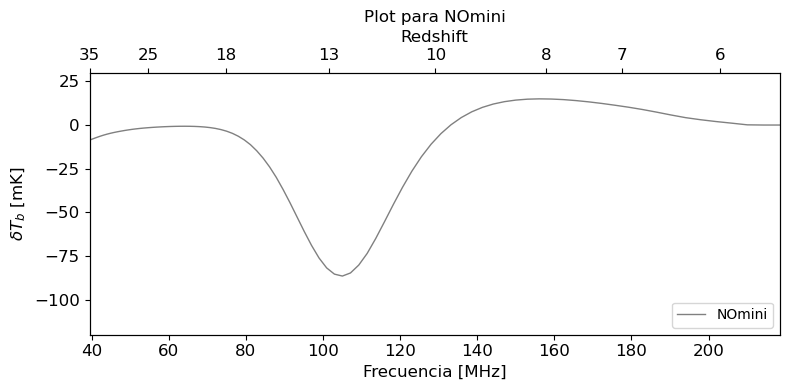

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

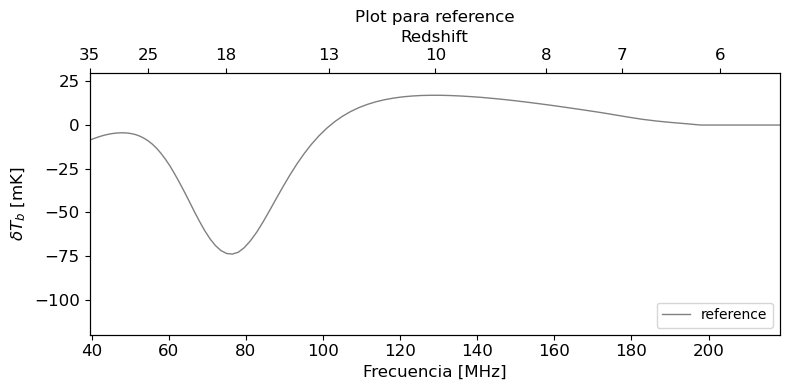

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

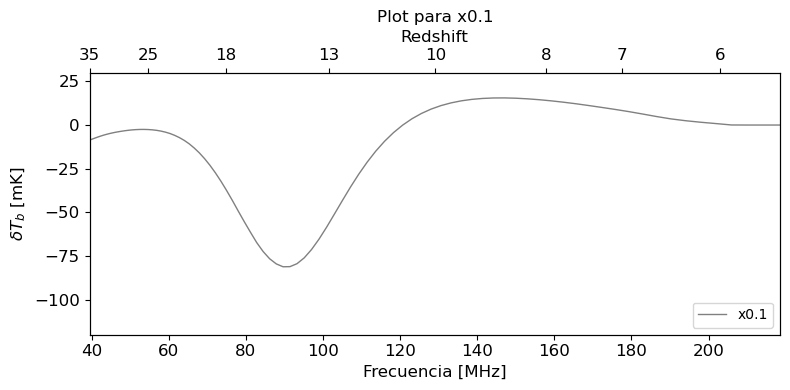

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

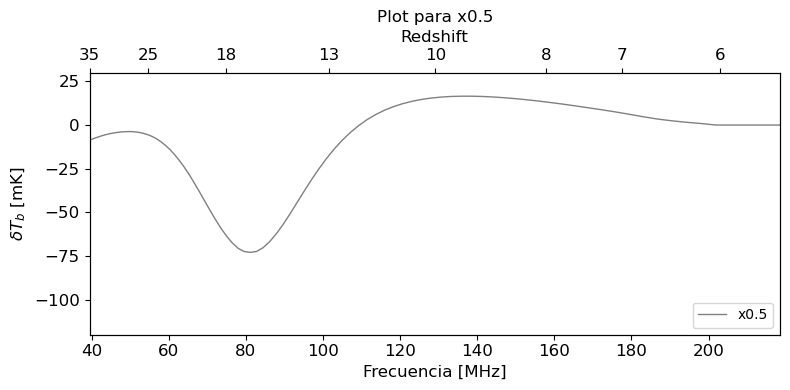

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

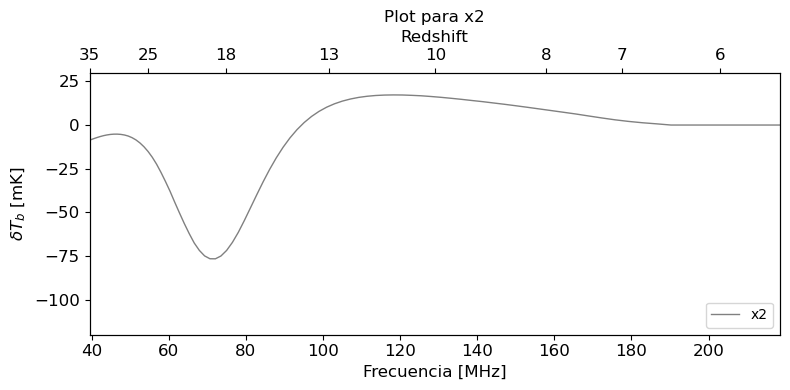

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

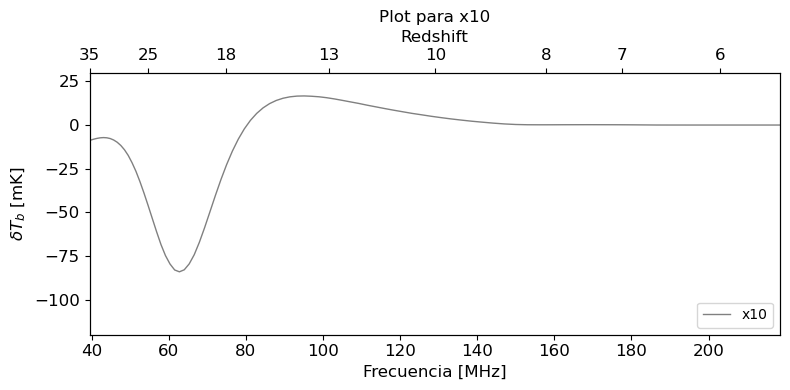

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

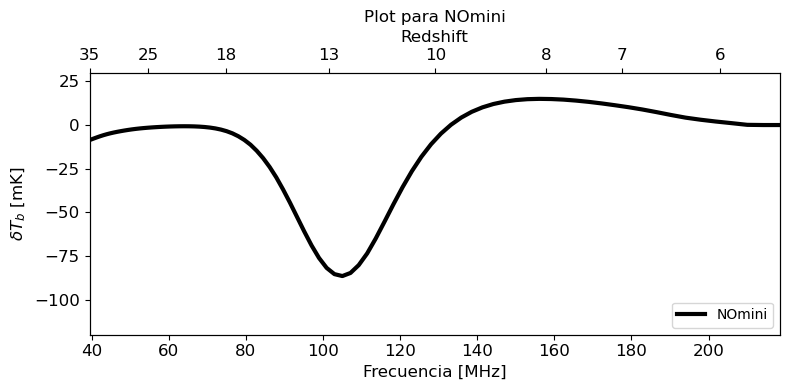

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

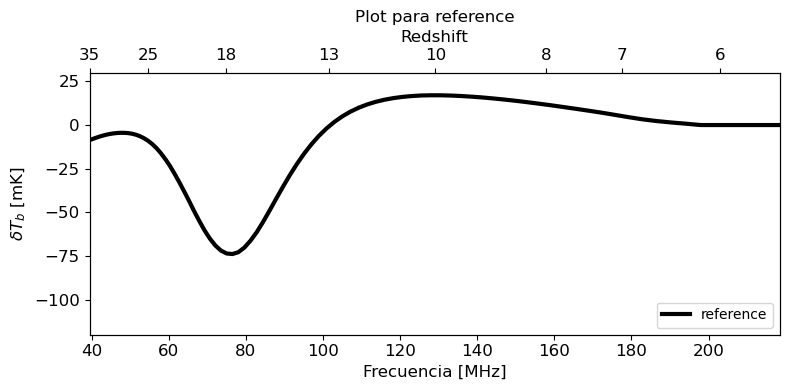

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

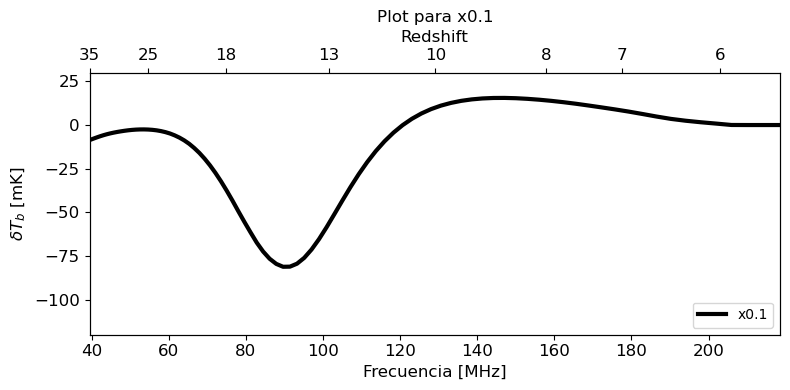

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

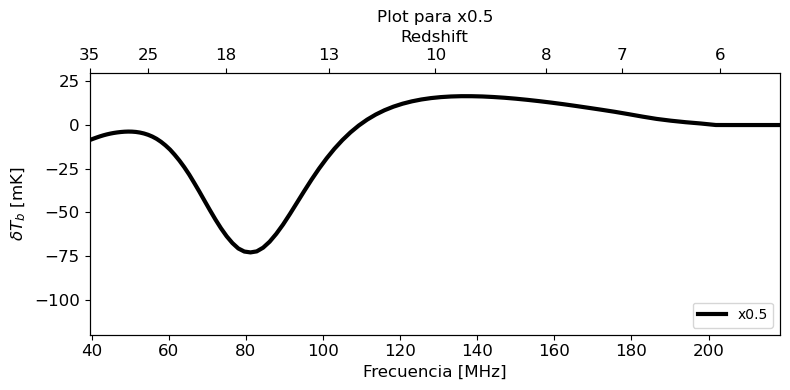

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

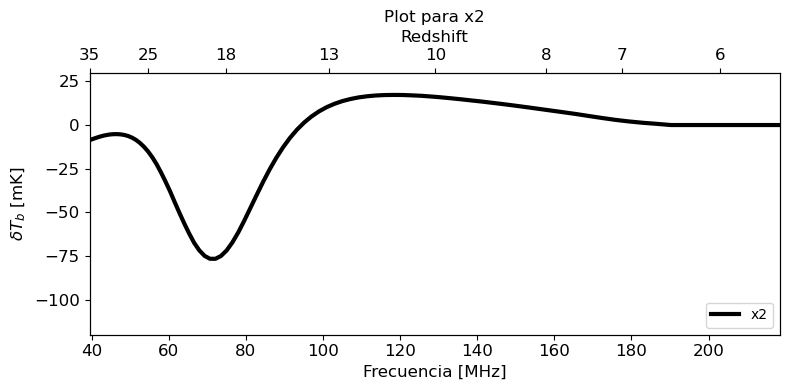

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

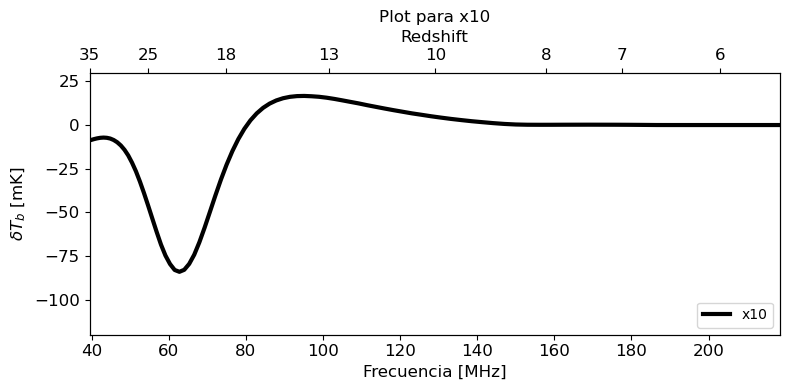

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

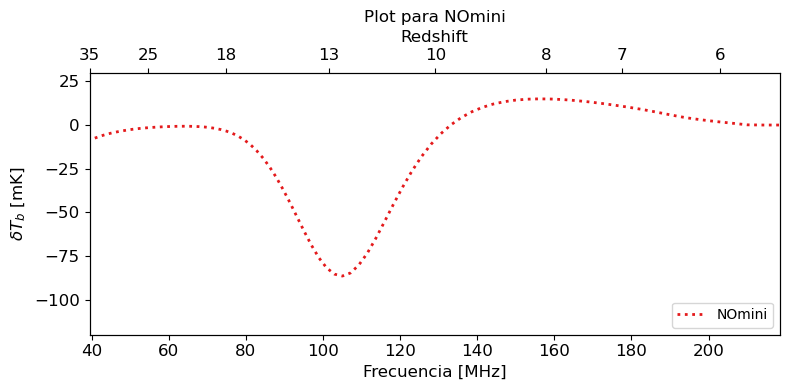

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

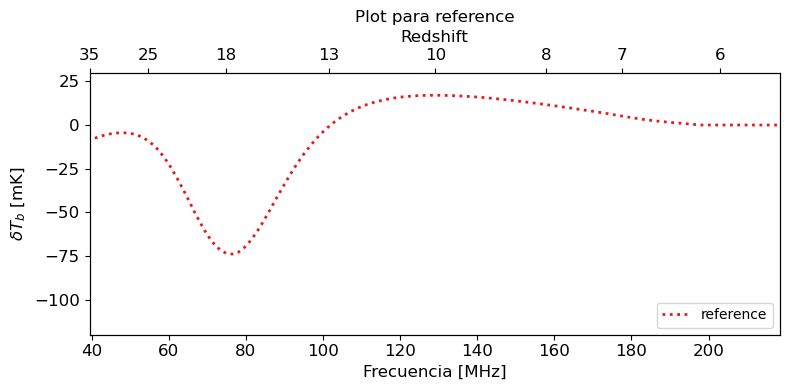

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

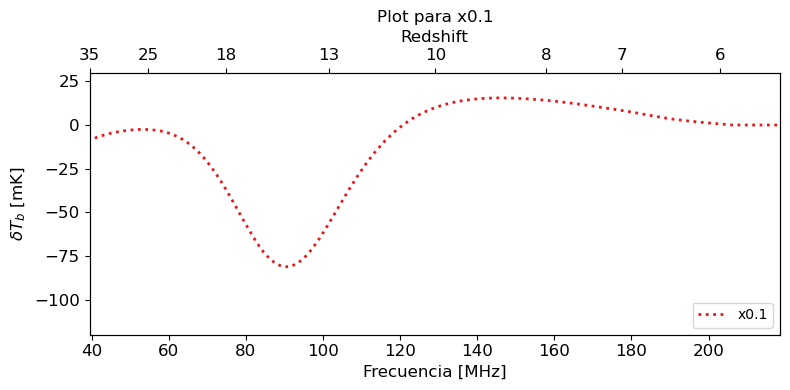

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

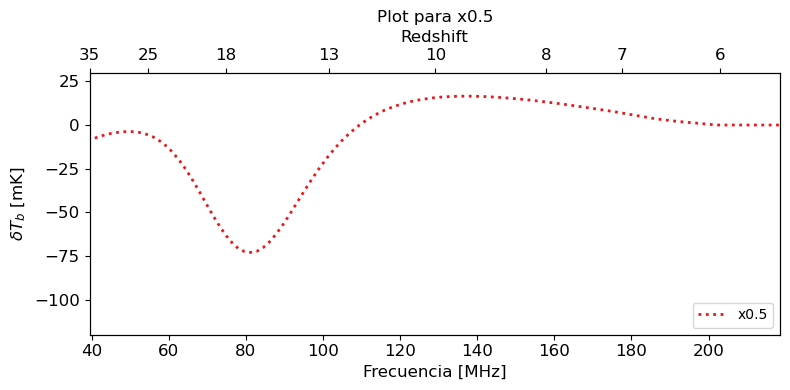

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

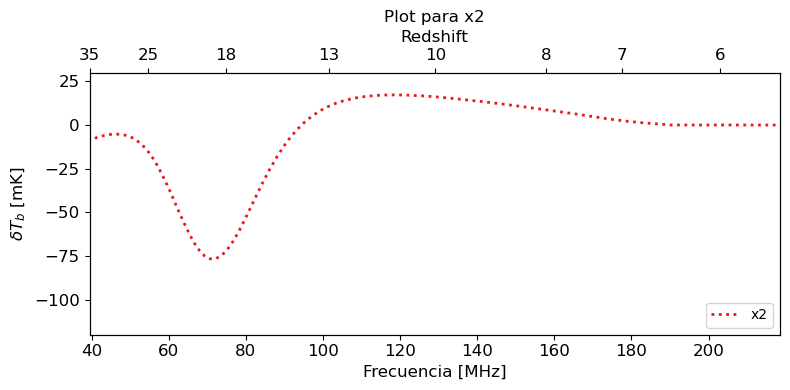

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

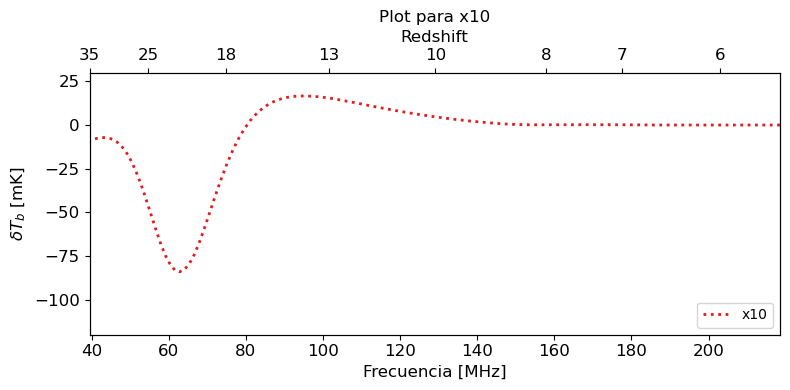

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

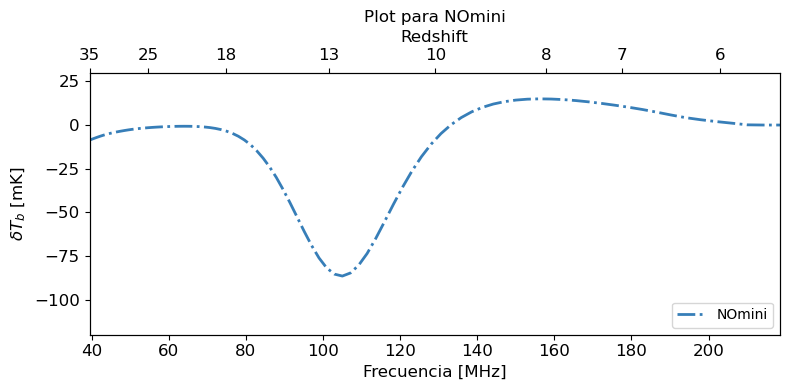

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

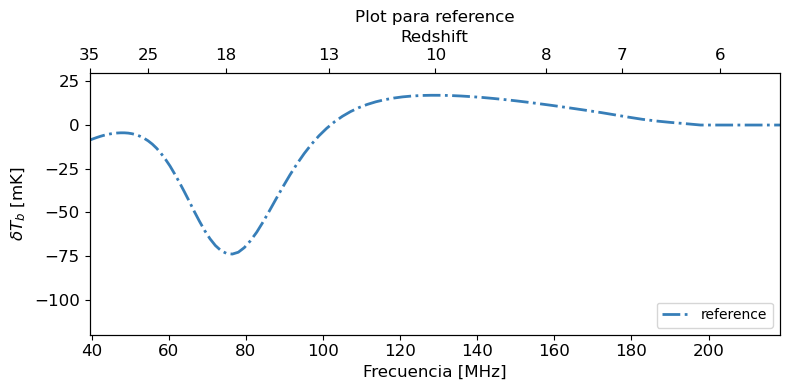

Valores de la función para reference:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.36 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.71 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.08 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.48 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.94 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.47 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.07 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.77 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.56 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -4.46 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -4.47 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -4.62 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -4.98 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -5.54 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -7.53 mK
Frecuencia: 54.64 MHz, Temp

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

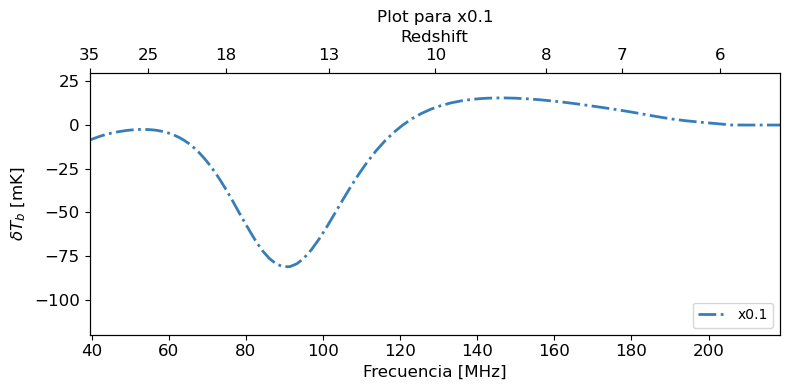

Valores de la función para x0.1:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.68 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.03 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.39 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.81 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.27 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.78 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.35 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.61 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.29 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.01 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.62 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -2.53 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -2.51 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

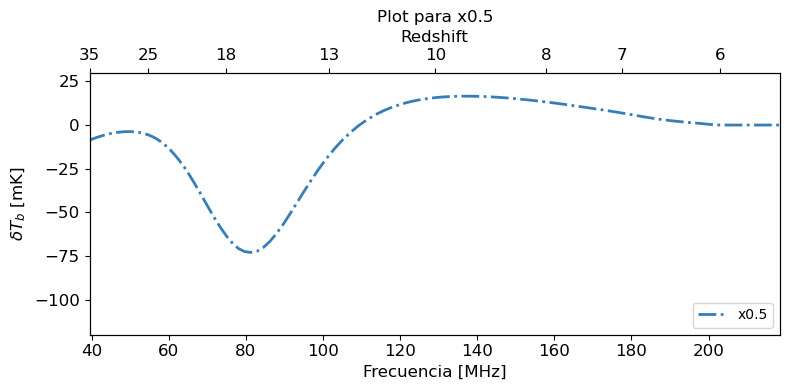

Valores de la función para x0.5:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.34 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.69 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.05 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.43 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.86 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.91 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.54 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -4.23 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.99 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.82 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -3.74 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -3.78 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -3.96 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -4.83 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

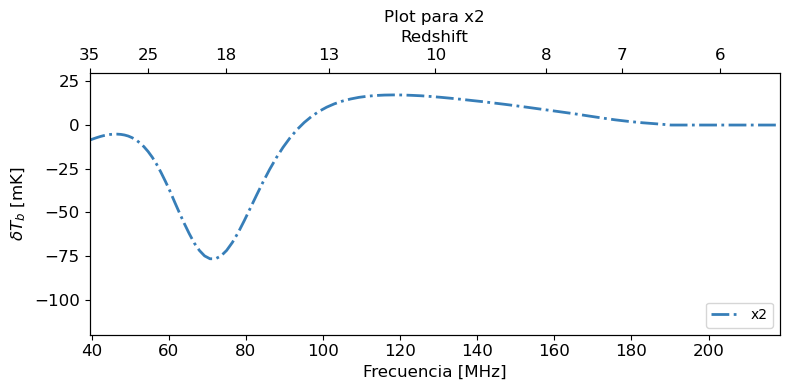

Valores de la función para x2:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.38 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.75 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.14 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.58 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -6.08 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.68 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -5.39 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -5.23 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -5.21 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -5.36 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -5.71 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -6.30 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -7.23 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -8.51 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -10.24 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -12.43 mK
Frecuencia: 54.64 MHz, Temperatu

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWa

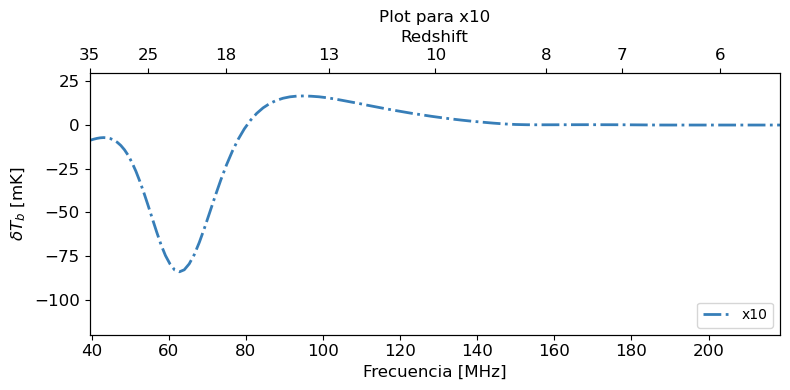

Valores de la función para x10:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -8.07 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.63 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -7.32 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -7.18 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -7.31 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -7.73 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -8.58 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -9.86 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -11.69 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -14.17 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -17.40 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -21.56 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -26.48 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -32.33 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -38.88 mK
Frecuencia: 54.64 MHz, Tem

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c

# Definir los parámetros globales, ajustes de estilo, etc.

for kk, labels in enumerate(labelss):
    factors = factorss[kk]
    astro_params = astro_params_fid.copy()

    for label, factor in zip(labels, factors):
        fig, ax = plt.subplots(figsize=(8, 4))

        if label == 'NOmini':
            flag_options = flag_options_without_minihalos
        else:
            flag_options = flag_options_with_minihalos
            if pp == 0:
                astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})
            elif pp == 1:
                astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI'] + np.log10(factor)})
            elif pp == 2:
                astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI'] + np.log10(factor)})
            else:
                if factor > 1:
                    continue
                astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})

        lightcone = p21c.run_lightcone(
            redshift=5.5,
            init_box=initial_conditions,
            flag_options=flag_options,
            astro_params=astro_params,
            global_quantities=global_quantities,
            random_seed=random_seed,
            direc=output_dir
        )

        freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
        ax.plot(freqs, getattr(lightcone, 'global_brightness_temp'),
                color=colors[kk], linestyle=linestyles[kk], label=label, lw=lws[kk])

        ax.set_xlabel('Frecuencia [MHz]', fontsize=12)
        ax.set_ylabel('$\delta T_{b} $ [mK]', fontsize=12)
        ax.set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
        ax.set_ylim(ymins[0], ymaxs[0])  # Ajusta según el índice correspondiente
        ax.xaxis.set_tick_params(labelsize=12)
        ax.yaxis.set_tick_params(labelsize=12)

        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(1420.4 / (zlabels + 1.))
        ax2.set_xticklabels([str(label) for label in zlabels])
        ax2.set_xlabel("Redshift", fontsize=12)
        ax2.xaxis.set_tick_params(labelsize=12)
        ax2.grid(False)

        ax.legend(loc='lower right', fontsize=10)

        ax.set_title(f'Plot para {label}')  # Nombre del plot

        plt.tight_layout()

        # Guardar cada figura con un nombre de archivo único
        filename = f'Temperatura_de_brillo_{label}_con_ajustes.jpg'
        plt.savefig(filename, dpi=300, bbox_inches='tight')

        # Mostrar la figura
        plt.show()

        # Imprimir los valores de las funciones
        print(f'Valores de la función para {label}:')
        for f, tb in zip(freqs, getattr(lightcone, 'global_brightness_temp')):
            print(f'Frecuencia: {f:.2f} MHz, Temperatura de brillo: {tb:.2f} mK')

        print()  # Agrega una línea en blanco entre cada iteración del bucle externo


/tmp/ipykernel_168657/3157914492.py:24: RuntimeWarning: divide by zero encountered in log10
  astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})


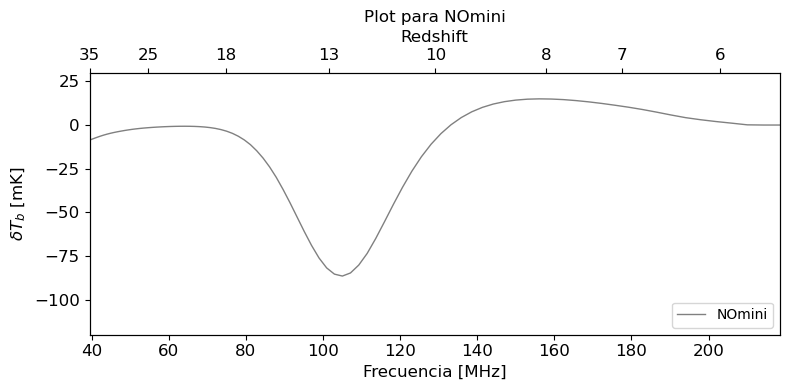

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/tmp/ipykernel_168657/3157914492.py:24: RuntimeWarning: divide by zero encountered in log10
  astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet cre

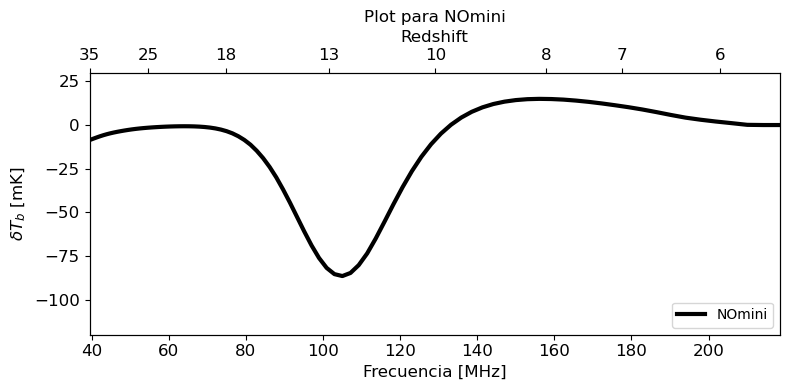

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/tmp/ipykernel_168657/3157914492.py:24: RuntimeWarning: divide by zero encountered in log10
  astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet cre

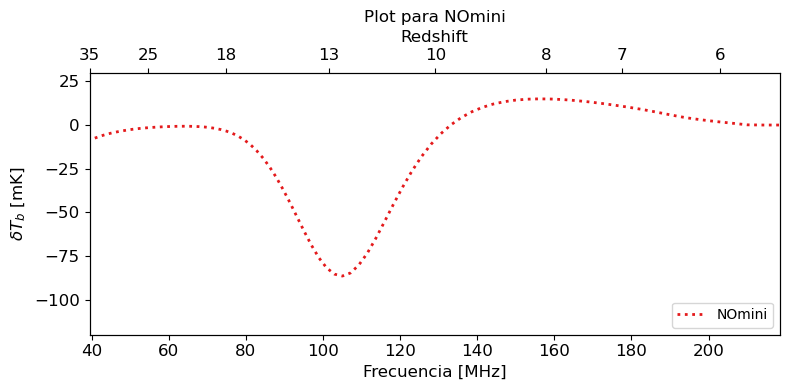

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

/tmp/ipykernel_168657/3157914492.py:24: RuntimeWarning: divide by zero encountered in log10
  astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:811: UserWarning: Trying to remove array that isn't yet cre

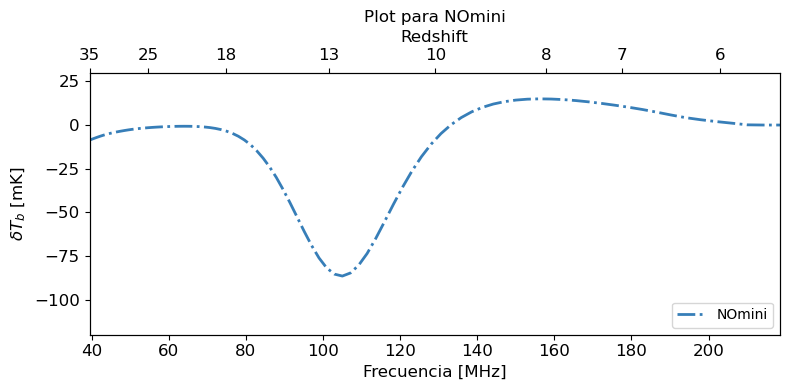

Valores de la función para NOmini:
Frecuencia: 39.02 MHz, Temperatura de brillo: -8.92 mK
Frecuencia: 39.80 MHz, Temperatura de brillo: -8.33 mK
Frecuencia: 40.60 MHz, Temperatura de brillo: -7.67 mK
Frecuencia: 41.41 MHz, Temperatura de brillo: -7.02 mK
Frecuencia: 42.24 MHz, Temperatura de brillo: -6.38 mK
Frecuencia: 43.08 MHz, Temperatura de brillo: -5.79 mK
Frecuencia: 43.94 MHz, Temperatura de brillo: -5.25 mK
Frecuencia: 44.82 MHz, Temperatura de brillo: -4.75 mK
Frecuencia: 45.72 MHz, Temperatura de brillo: -4.30 mK
Frecuencia: 46.63 MHz, Temperatura de brillo: -3.88 mK
Frecuencia: 47.56 MHz, Temperatura de brillo: -3.50 mK
Frecuencia: 48.52 MHz, Temperatura de brillo: -3.13 mK
Frecuencia: 49.49 MHz, Temperatura de brillo: -2.79 mK
Frecuencia: 50.48 MHz, Temperatura de brillo: -2.48 mK
Frecuencia: 51.49 MHz, Temperatura de brillo: -2.20 mK
Frecuencia: 52.52 MHz, Temperatura de brillo: -1.95 mK
Frecuencia: 53.57 MHz, Temperatura de brillo: -1.72 mK
Frecuencia: 54.64 MHz, Tempera

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c

# Definir los parámetros globales, ajustes de estilo, etc.

# Lista para almacenar los datos de temperatura de brillo de 'NOmini'
temperaturas_brillo_nominis = []

for kk, labels in enumerate(labelss):
    factors = factorss[kk]
    astro_params = astro_params_fid.copy()

    for label, factor in zip(labels, factors):
        if label != 'NOmini':
            continue  # Saltar iteraciones que no correspondan a 'NOmini'

        fig, ax = plt.subplots(figsize=(8, 4))

        flag_options = flag_options_without_minihalos  # Usar opciones sin mini-halos

        # Actualizar parámetros astrofísicos según el caso específico
        if pp == 0:
            astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI'] + np.log10(factor)})
        elif pp == 1:
            astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI'] + np.log10(factor)})
        elif pp == 2:
            astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI'] + np.log10(factor)})
        else:
            if factor > 1:
                continue
            astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})

        # Ejecutar el cálculo del cono de luz
        lightcone = p21c.run_lightcone(
            redshift=5.5,
            init_box=initial_conditions,
            flag_options=flag_options,
            astro_params=astro_params,
            global_quantities=global_quantities,
            random_seed=random_seed,
            direc=output_dir
        )

        # Obtener frecuencias y temperatura de brillo global
        freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
        ax.plot(freqs, getattr(lightcone, 'global_brightness_temp'),
                color=colors[kk], linestyle=linestyles[kk], label=label, lw=lws[kk])

        # Configurar etiquetas y límites de los ejes
        ax.set_xlabel('Frecuencia [MHz]', fontsize=12)
        ax.set_ylabel('$\delta T_{b} $ [mK]', fontsize=12)
        ax.set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
        ax.set_ylim(ymins[0], ymaxs[0])  # Ajustar según el índice correspondiente
        ax.xaxis.set_tick_params(labelsize=12)
        ax.yaxis.set_tick_params(labelsize=12)

        # Configurar eje adicional para el redshift
        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(1420.4 / (zlabels + 1.))
        ax2.set_xticklabels([str(label) for label in zlabels])
        ax2.set_xlabel("Redshift", fontsize=12)
        ax2.xaxis.set_tick_params(labelsize=12)
        ax2.grid(False)

        ax.legend(loc='lower right', fontsize=10)

        ax.set_title(f'Plot para {label}')  # Título del plot

        plt.tight_layout()

        # Guardar cada figura con un nombre de archivo único
        filename = f'Temperatura_de_brillo_{label}_con_ajustes.jpg'
        plt.savefig(filename, dpi=300, bbox_inches='tight')

        # Mostrar la figura
        plt.show()

        # Imprimir los valores de la función para 'NOmini'
        print(f'Valores de la función para {label}:')
        for f, tb in zip(freqs, getattr(lightcone, 'global_brightness_temp')):
            print(f'Frecuencia: {f:.2f} MHz, Temperatura de brillo: {tb:.2f} mK')

        print()  # Agregar una línea en blanco entre cada iteración del bucle externo

        # Guardar los datos de temperatura de brillo para 'NOmini'
        datos_plot = [(f, tb) for f, tb in zip(freqs, getattr(lightcone, 'global_brightness_temp'))]
        temperaturas_brillo_nominis.append((label, datos_plot))

# Imprimir los datos de temperatura de brillo solo para 'NOmini'
for label, datos in temperaturas_brillo_nominis:
    print(f'Valores de la función para {label}:')
    for f, tb in datos:
        print(f'Frecuencia: {f:.2f} MHz, Temperatura de brillo: {tb:.2f} mK')
    print()


## PARTE III

In [40]:
coeval10, coeval18, coeval22 = p21c.run_coeval(
    redshift = [10.0, 18.0, 22.0],
    user_params = user_params,
    cosmo_params = p21c.CosmoParams(SIGMA_8=0.8),
    astro_params = astro_params_fid ,
    random_seed= random_seed
)



In [41]:
print("Random Seed: ", coeval22.random_seed)
print("Redshift: ", coeval22.redshift)
print(coeval25.user_params)

Random Seed:  1993
Redshift:  22.0
UserParams:
    BOX_LEN                 : 150
    DIM                     : 256
    FAST_FCOLL_TABLES       : True
    HII_DIM                 : 64
    HMF                     : 1
    MINIMIZE_MEMORY         : False
    NON_CUBIC_FACTOR        : 1.0
    NO_RNG                  : False
    N_THREADS               : 4
    PERTURB_ON_HIGH_RES     : True
    POWER_SPECTRUM          : 5
    USE_2LPT                : True
    USE_FFTW_WISDOM         : True
    USE_INTERPOLATION_TABLES: True
    USE_RELATIVE_VELOCITIES : True
    


In [42]:
print(coeval22.hires_density.shape)
print(coeval22.brightness_temp.shape)



(256, 256, 256)
(64, 64, 64)


In [43]:
coeval10.brightness_temp_struct.global_Tb

23.417347

In [46]:
filename = coeval22.save(direc='_cache')

In [47]:
print(os.path.basename(filename))

Coeval_z22.0_6bf6a49960cbd6cf71799f5394052a51_r1993.h5


## III-1  Temperatura de Brillo

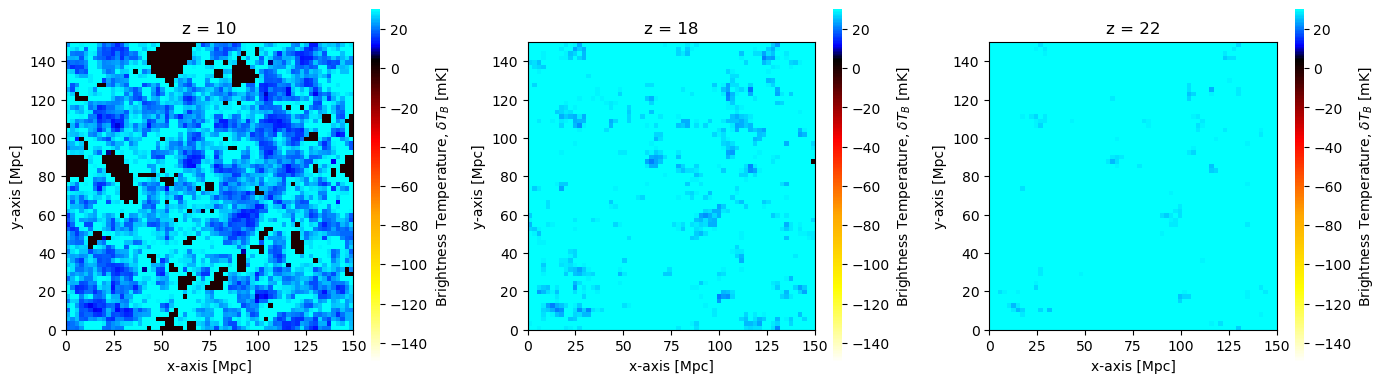

In [48]:
fig, ax = plt.subplots(1,3, figsize=(14,4))
for i, (coeval, redshift) in enumerate(zip([coeval10, coeval18, coeval22], [10,18,22])):
    plotting.coeval_sliceplot(coeval, ax=ax[i], fig=fig);
    plt.title("z = %s"%redshift)
plt.tight_layout()

## III-2 Campo de densidad

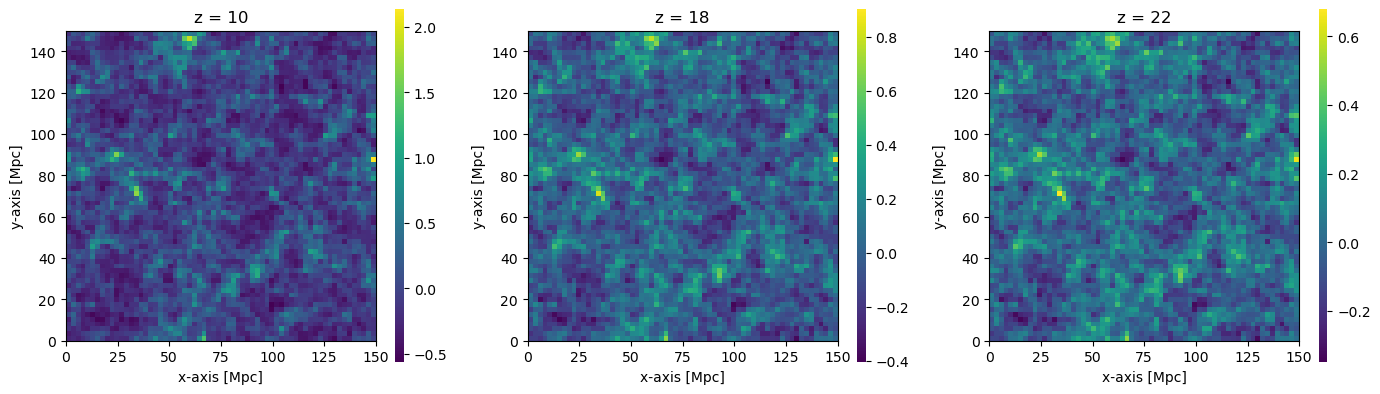

In [51]:
fig, ax = plt.subplots(1,3, figsize=(14,4))
for i, (coeval, redshift) in enumerate(zip([coeval10, coeval18, coeval22], [10,18,22])):
    plotting.coeval_sliceplot(coeval, kind='density', ax=ax[i], fig=fig);
    plt.title("z = %s"%redshift)
plt.tight_layout()



## III- 3 Campo Ionizante

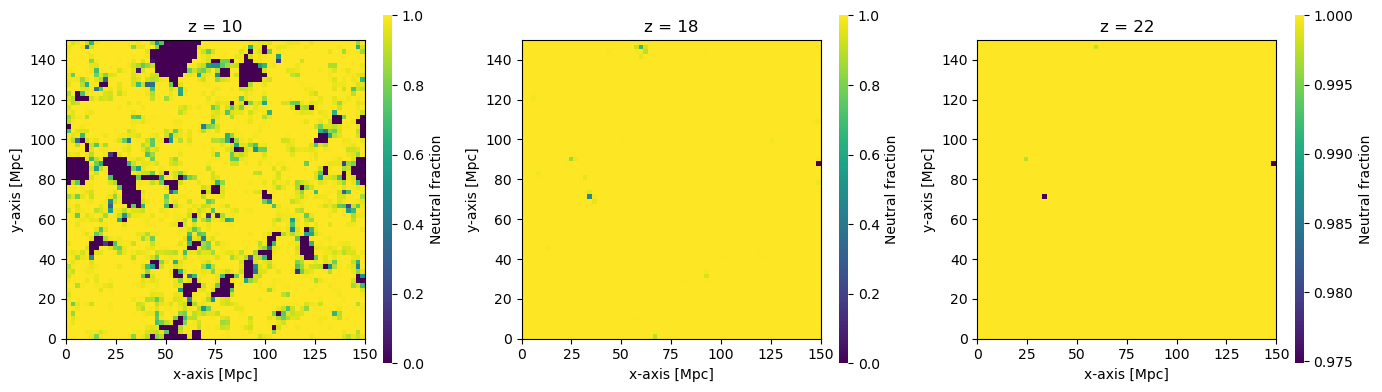

In [52]:
fig, ax = plt.subplots(1,3, figsize=(14,4))
for i, (coeval, redshift) in enumerate(zip([coeval10, coeval18, coeval22], [10,18,22])):
    plotting.coeval_sliceplot(coeval, kind='xH_box', ax=ax[i], fig=fig);
    plt.title("z = %s"%redshift)
plt.tight_layout()

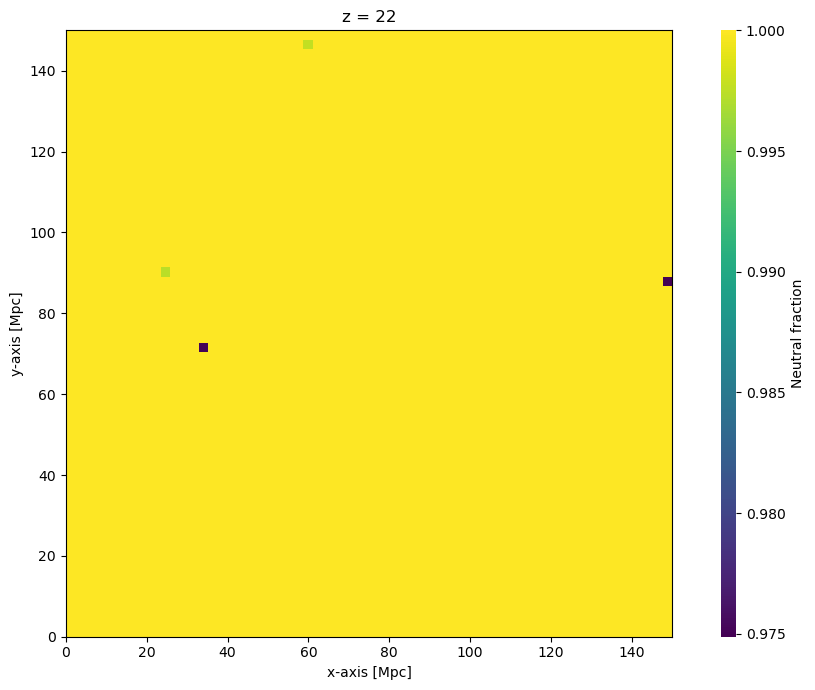

In [61]:
import matplotlib.pyplot as plt

# Supongamos que ya has cargado el coeval22 y la librería 'plotting' está disponible
fig, ax = plt.subplots(figsize=(10, 7))  # Ajusta el tamaño según sea necesario

# Realiza el plotting para el coeval22
plotting.coeval_sliceplot(coeval22, kind='xH_box', ax=ax, fig=fig)

# Añade el título
ax.set_title("z = 22")

plt.tight_layout()
plt.show()


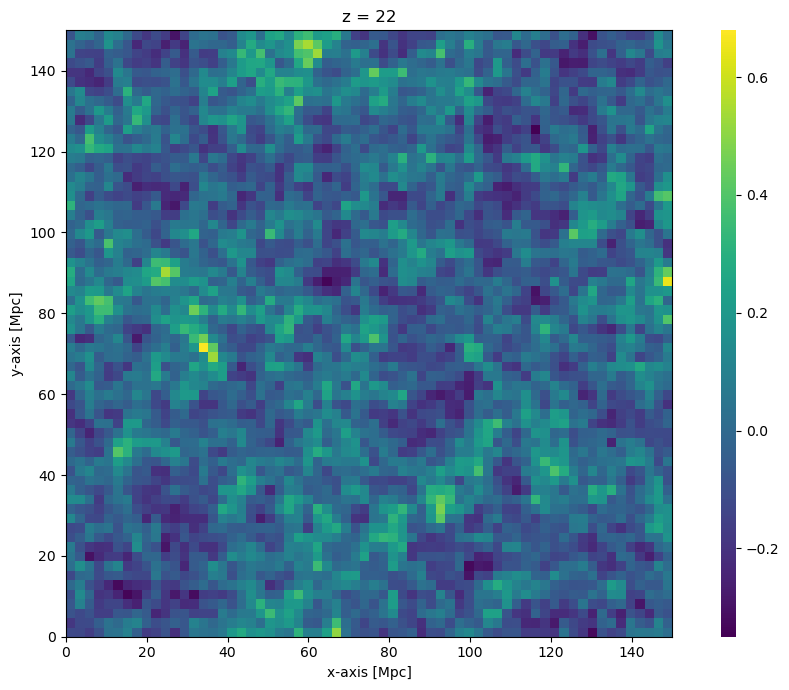

In [63]:
import matplotlib.pyplot as plt

# Supongamos que ya has cargado el coeval22 y la librería 'plotting' está disponible
fig, ax = plt.subplots(figsize=(10, 7))  # Ajusta el tamaño según sea necesario

# Realiza el plotting para el coeval22
plotting.coeval_sliceplot(coeval22, kind='density', ax=ax, fig=fig)

# Añade el título
ax.set_title("z = 22")

plt.tight_layout()
plt.show()


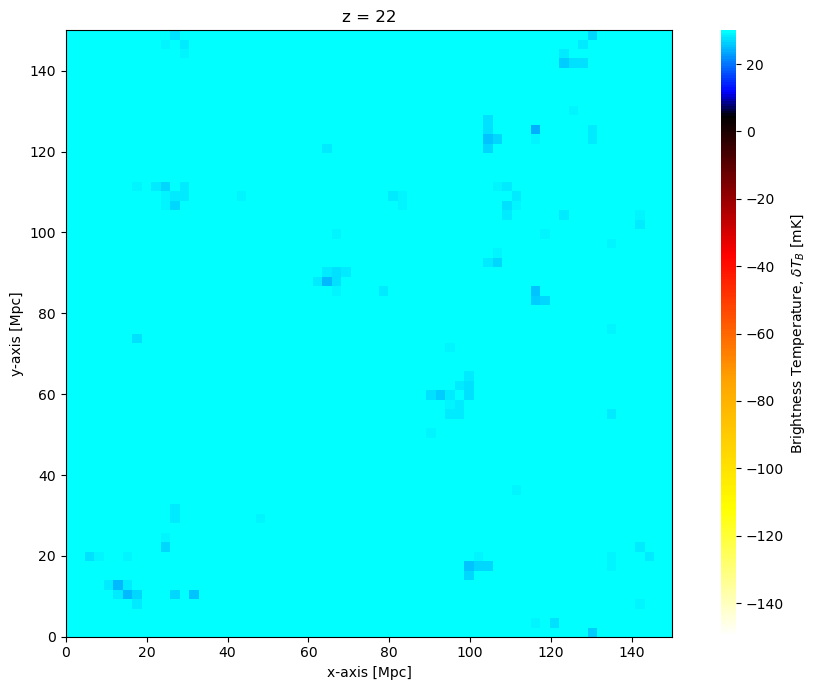

In [64]:
import matplotlib.pyplot as plt

# Supongamos que ya has cargado el coeval22 y la librería 'plotting' está disponible
fig, ax = plt.subplots(figsize=(10, 7))  # Ajusta el tamaño según sea necesario

# Realiza el plotting para el coeval22
plotting.coeval_sliceplot(coeval22, kind='brightness_temp', ax=ax, fig=fig)

# Añade el título
ax.set_title("z = 22")

plt.tight_layout()
plt.show()
